In [1]:
from datetime import datetime
from dateutil.parser import parse
import pandas as pd
import spacy, glob, os
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2, whiten
from sklearn.cluster import KMeans


In [2]:
nlp = spacy.load('en_core_web_sm', disable=['parser'])
nlp.remove_pipe('ner')
# nlp.remove_pipe('parser')

('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x7faa26451768>)

In [3]:
f = open('dataset.tsv', 'r')
# docs = pd.DataFrame(f.read())

df1 = pd.DataFrame.from_csv(f, sep='\t', index_col=None)
df1.head()


/home/michael/anaconda3/envs/anlp/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.
/home/michael/anaconda3/envs/anlp/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,sight_year,report_year
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,1949,2004
1,10/10/1955 17:00,chester (uk/england),nu,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667,1955,2008
2,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,1956,2004
3,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,1960,2004
4,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889,1961,2007


In [4]:
df1_us = df1[df1["country"]=="us"]
df1_us.count()


datetime                65101
city                    65101
state                   65101
country                 65101
shape                   65101
duration (seconds)      65101
duration (hours/min)    65101
comments                65101
date posted             65101
latitude                65101
longitude               65101
sight_year              65101
report_year             65101
dtype: int64

In [5]:
# USED TO FIND BEST K, DO NOT RUN. TAKES AN HOUR

Sum_of_squared_distances = []
K = range(50, 500, 5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(coordinates)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

print(coordinates)


/home/michael/anaconda3/envs/anlp/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


KeyboardInterrupt: 

/home/michael/anaconda3/envs/anlp/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/michael/anaconda3/envs/anlp/lib/python3.7/site-packages/scipy/cluster/vq.py:525: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


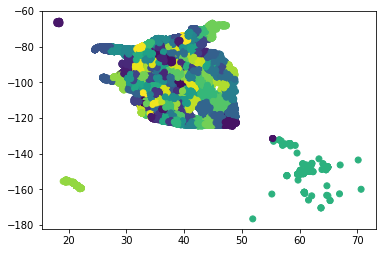

[ 29.8830556 -97.9411111] 78
[ 28.9783333 -96.6458333] 124
[  21.4180556 -157.8036111] 125
[ 36.595     -82.1888889] 79
[ 41.1175    -73.4083333] 72
[ 33.5861111 -86.2861111] 68
[ 30.2947222 -82.9841667] 69
[  33.9163889 -118.3516667] 145
[ 35.2333333 -82.7344444] 6
[ 40.6686111 -73.5275   ] 72
[ 37.1536111 -83.7619444] 79
[ 35.8238889 -80.2536111] 19
[ 36.8430556 -83.3219444] 79
[ 42.5377778 -83.2330556] 28
[ 41.3252778 -72.1936111] 39
[ 42.3916667 -71.5666667] 39
[ 38.1055556 -98.6597222] 52
[ 32.8544444 -79.975    ] 147
[  45.5827778 -122.3522222] 44
[ 29.4238889 -98.4933333] 124
[ 38.2541667 -85.7594444] 50
[ 40.7008333 -73.7133333] 72
[ 41.7002778 -73.9213889] 67
[  32.7152778 -117.1563889] 128
[  38.7583333 -104.7425   ] 20
[ 29.7630556 -95.3630556] 12
[ 32.7833333 -96.8      ] 118
[ 42.9955556 -71.4552778] 101
[ 29.7630556 -95.3630556] 12
[ 44.7630556 -85.6205556] 45
[ 41.0338889 -73.7633333] 72
[ 43.0388889 -87.9063889] 136
[ 43.9627778 -70.2830556] 116
[  40.015 -105.27 ] 122


[ 28.0611111 -82.3025   ] 74
[  33.7091667 -117.9527778] 106
[  40.5763889 -124.2627778] 66
[ 35.9983333 -76.9463889] 71
[ 31.0944444 -92.4002778] 144
[ 40.9852778 -86.8794444] 132
[  33.7922222 -118.3141667] 106
[ 39.2402778 -76.8397222] 11
[ 42.8863889 -78.8786111] 31
[  47.0380556 -122.8994444] 7
[ 40.4405556 -79.9961111] 76
[ 40.3161111 -74.5141667] 148
[  37.5483333 -121.9875   ] 24
[ 34.1469444 -86.1305556] 85
[ 40.2977778 -77.8744444] 76
[ 40.7280556 -74.0780556] 72
[ 43.5688889 -86.0394444] 15
[ 42.9572222 -83.8305556] 15
[ 42.5611111 -71.5902778] 101
[ 35.8966667 -77.5361111] 19
[  44.4269444 -124.0675   ] 117
[  34.2572222 -118.6002778] 145
[ 43.5341667 -70.9102778] 101
[ 27.9375    -82.2861111] 74
[ 43.4133333 -86.0794444] 15
[ 34.9852778 -80.5497222] 13
[ 41.7386111 -80.77     ] 84
[ 38.9716667 -95.235    ] 111
[  42.225     -121.7805556] 105
[ 40.0638889 -80.7211111] 76
[ 26.7052778 -80.0366667] 38
[  43.2166667 -123.3405556] 105
[ 43.1488889 -72.3611111] 101
[ 36.0988889 

[ 33.5861111 -86.2861111] 68
[ 41.7       -71.4166667] 39
[ 33.5772222 -96.1780556] 33
[  33.9175    -116.7863889] 106
[  42.8613889 -105.8716667] 99
[  48.0519444 -122.1758333] 7
[ 29.3836111 -94.9025   ] 12
[ 35.7211111 -77.9158333] 70
[  43.4666667 -112.0333333] 48
[  47.5963889 -120.6602778] 7
[  47.4830556 -122.2158333] 7
[ 33.8225    -85.8927778] 68
[  47.0344444 -122.8219444] 7
[ 41.3494444 -85.1355556] 132
[ 32.7355556 -97.1077778] 118
[  37.3688889 -122.0352778] 24
[ 36.5483333 -82.5619444] 79
[ 33.1730556 -84.915    ] 85
[ 41.8786111 -71.3830556] 39
[ 42.3086111 -83.4822222] 28
[ 35.2525    -95.2372222] 57
[ 35.1494444 -90.0488889] 142
[ 41.8238889 -71.4133333] 39
[ 39.0305556 -82.8244444] 141
[ 34.5097222 -88.2091667] 142
[ 29.055  -82.0625] 74
[ 41.1411111 -73.2641667] 72
[ 26.4611111 -80.0730556] 38
[ 28.4319444 -82.6644444] 74
[ 43.0972222 -89.5041667] 136
[ 38.2008333 -77.5894444] 59
[ 32.3863889 -96.8480556] 118
[ 32.7833333 -96.8      ] 118
[ 38.9886111 -78.3588889] 11

[ 41.5580556 -73.0519444] 39
[ 29.7630556 -95.3630556] 12
[ 39.9402778 -82.0133333] 53
[ 24.6652778 -81.4425   ] 38
[ 29.3011111 -94.7975   ] 12
[ 41.3080556 -72.9286111] 72
[ 41.6269444 -79.6738889] 84
[  45.4611111 -123.9666667] 44
[ 34.5861111 -94.2394444] 36
[  42.5630556 -114.46     ] 48
[ 39.2666667 -81.5616667] 141
[ 32.7630556 -80.2502778] 147
[ 40.9113889 -73.7827778] 72
[ 34.2738889 -92.0908333] 36
[ 36.1880556 -94.5402778] 16
[ 26.9338889 -80.0944444] 38
[  43.6136111 -116.2025   ] 48
[  42.5630556 -114.46     ] 48
[ 36.1880556 -96.49     ] 16
[ 36.1880556 -96.49     ] 16
[  33.4222222 -111.8219444] 115
[ 25.7738889 -80.1938889] 38
[ 32.4797222 -86.3619444] 92
[  37.6819444 -121.7669444] 24
[ 44.4583333 -93.1613889] 58
[  37.6688889 -122.0797222] 24
[ 33.1136111 -94.1641667] 130
[ 26.2125 -80.25  ] 38
[ 44.7966667 -68.7619444] 116
[  34.7083333 -120.4666667] 10
[  45.9975    -121.5269444] 44
[  32.7677778 -117.0222222] 128
[ 39.9522222 -75.1641667] 148
[  41.7911111 -107.238

[  61.4580556 -149.3622222] 95
[ 37.7741667 -87.1133333] 5
[ 39.2902778 -76.6125   ] 11
[  46.2858333 -119.2833333] 44
[ 30.2033333 -93.8661111] 12
[ 30.0977778 -98.4211111] 78
[ 44.2444444 -86.3241667] 45
[ 41.9266667 -73.9130556] 67
[ 40.7141667 -74.0063889] 72
[ 29.7630556 -95.3630556] 12
[  39.8083333 -104.9333333] 122
[  48.0519444 -122.1758333] 7
[ 28.0891667 -80.5658333] 74
[ 41.85 -87.65] 132
[ 39.9611111 -82.9988889] 53
[ 40.9113889 -73.7827778] 72
[ 40.8983333 -95.6711111] 63
[ 26.3583333 -80.0833333] 38
[ 39.4277778 -86.4283333] 113
[  34.2077778 -117.1083333] 145
[  45.1341667 -118.9313889] 44
[ 43.1008333 -75.2330556] 31
[ 33.5205556 -86.8025   ] 68
[ 34.3675    -77.7108333] 100
[  34.1722222 -118.3780556] 145
[  34.4113889 -118.5391667] 10
[ 44.7433333 -92.8522222] 58
[ 42.2411111 -88.3161111] 139
[ 44.3097222 -89.5136111] 88
[ 41.8791667 -73.4772222] 39
[ 32.2744444 -90.1319444] 144
[ 39.7458333 -75.5469444] 148
[ 32.8233333 -97.1702778] 118
[ 25.7738889 -80.1938889] 38


[  35.7069444 -118.4552778] 22
[ 39.3994444 -84.5613889] 53
[  33.4222222 -111.8219444] 115
[ 43.1963889 -75.7308333] 31
[ 41.76      -70.0833333] 39
[ 40.3461111 -94.8722222] 123
[  37.9608333 -120.2363889] 62
[ 40.2986111 -83.0680556] 53
[ 29.6513889 -82.325    ] 69
[  34.8697222 -111.7602778] 146
[ 41.8358333 -96.4666667] 63
[  32.6788889 -115.4980556] 137
[ 29.9480556 -93.9169444] 12
[ 42.3316667 -71.1216667] 39
[ 26.9294444 -82.0455556] 38
[  34.4113889 -118.5391667] 10
[ 41.6469444 -73.5686111] 67
[  47.5002778 -111.3      ] 109
[  44.1752778 -122.1627778] 117
[ 40.2169444 -74.7433333] 148
[ 38.9716667 -95.235    ] 111
[ 33.8905556 -78.5686111] 100
[  33.5091667 -111.8983333] 115
[ 39.2902778 -76.6125   ] 11
[ 40.7391667 -89.0163889] 94
[ 34.9247222 -81.0252778] 13
[ 44.98      -93.2636111] 58
[ 44.9444444 -93.0930556] 58
[  33.4483333 -112.0733333] 115
[ 30.155     -95.2111111] 12
[ 43.8013889 -91.2394444] 88
[ 32.7355556 -97.1077778] 118
[  43.4697222 -111.9658333] 48
[ 29.7630

[  40.1525    -106.9080556] 83
[ 26.1719444 -80.1322222] 38
[  40.8022222 -124.1625   ] 66
[  32.2216667 -110.9258333] 29
[ 40.1536111 -82.6852778] 53
[  39.7391667 -104.9841667] 122
[  36.175     -115.1363889] 8
[ 26.3394444 -81.7788889] 38
[  45.7811111 -122.5322222] 44
[ 30.3319444 -81.6558333] 69
[ 42.35      -71.1569444] 39
[  47.4830556 -122.2158333] 7
[  47.6063889 -122.3308333] 7
[ 39.9611111 -82.9988889] 53
[ 32.7833333 -96.8      ] 118
[ 34.7463889 -92.2894444] 36
[ 33.9525 -84.55  ] 85
[  34.2308333 -111.3244444] 65
[  40.5  -111.95] 82
[ 32.9480556 -96.7294444] 118
[ 27.0994444 -82.4544444] 38
[ 31.2825    -86.2555556] 92
[  46.8722222 -113.9930556] 109
[ 37.7597222 -78.8711111] 126
[ 40.7933333 -77.8602778] 76
[  41.1238889 -100.765    ] 143
[  36.175     -115.1363889] 8
[ 41.3280556 -73.6861111] 72
[  37.9872222 -122.5877778] 24
[ 35.7719444 -78.6388889] 19
[ 40.5775    -85.8733333] 113
[ 29.4238889 -98.4933333] 124
[ 41.7886111 -89.6961111] 27
[ 28.2916667 -81.4077778] 7

[  37.8216667 -121.9988889] 24
[  48.2325    -101.2958333] 64
[  35.0844444 -106.6505556] 23
[ 37.1297222 -80.4091667] 126
[ 25.7738889 -80.1938889] 38
[ 38.05      -85.5458333] 50
[ 38.7955556 -77.6141667] 11
[  35.1980556 -111.6505556] 146
[  19.7297222 -155.09     ] 125
[ 38.2680556 -77.1847222] 59
[ 42.2119444 -88.2380556] 139
[ 32.7561111 -91.8722222] 144
[  32.2216667 -110.9258333] 29
[ 29.7027778 -96.7802778] 12
[ 34.1347222 -79.94     ] 100
[ 42.7008333 -73.1091667] 101
[ 40.31      -75.1302778] 148
[ 37.5536111 -77.4605556] 59
[ 31.6938889 -89.1305556] 144
[ 39.9338889 -74.8913889] 148
[ 39.7588889 -84.1916667] 53
[ 41.9994444 -88.145    ] 139
[ 42.3313889 -83.0458333] 28
[ 41.7352778 -70.1944444] 39
[ 31.9491667 -98.7369444] 30
[  41.5922222 -119.8594444] 32
[ 40.9311111 -73.8991667] 72
[  47.6063889 -122.3308333] 7
[  47.6816667 -122.2075   ] 7
[  47.2530556 -122.4430556] 7
[  41.1769444 -112.0030556] 135
[ 35.7719444 -78.6388889] 19
[  42.0527778 -124.2827778] 105
[ 29.2855

[  21.3069444 -157.8583333] 125
[ 29.4238889 -98.4933333] 124
[ 39.1141667 -94.6272222] 111
[ 41.8558333 -75.2241667] 67
[ 33.6488889 -85.5875   ] 85
[  42.9275 -123.28  ] 105
[ 41.55      -71.4666667] 39
[  22.1452778 -159.3155556] 125
[  47.6063889 -122.3308333] 7
[  46.2469444 -114.1594444] 109
[  39.5297222 -119.8127778] 108
[  42.0527778 -124.2827778] 105
[  45.4944444 -122.8658333] 44
[  32.2216667 -110.9258333] 29
[ 45.1077778 -93.2377778] 58
[ 38.6411111 -83.7444444] 50
[ 35.5847222 -80.8102778] 19
[ 42.6583333 -83.15     ] 28
[ 30.5041667 -90.6691667] 17
[ 44.8113889 -91.4983333] 58
[  38.4088889 -121.3705556] 97
[ 34.4211111 -84.1191667] 85
[ 40.4777778 -74.2911111] 72
[ 36.5483333 -82.5619444] 79
[ 42.6288889 -78.0547222] 31
[ 44.5736111 -68.7961111] 116
[ 41.85 -87.65] 132
[ 39.6416667 -77.7202778] 11
[ 34.875     -84.2555556] 6
[  43.0202778 -123.2919444] 105
[  42.0527778 -124.2827778] 105
[ 35.0525    -78.8786111] 70
[ 39.3761111 -77.155    ] 11
[ 31.7244444 -96.165    ]

[ 42.9763889 -88.1083333] 136
[  48.0519444 -122.1758333] 7
[  47.6063889 -122.3308333] 7
[  45.6388889 -122.6602778] 44
[ 40.8588889 -93.4972222] 63
[ 31.3111111 -92.445    ] 144
[  38.7908333 -121.2347222] 97
[  40.0502778 -105.0494444] 122
[  37.6688889 -122.0797222] 24
[  37.6688889 -122.0797222] 24
[ 39.8916667 -75.3      ] 148
[ 45.0847222 -93.0097222] 58
[ 41.4813889 -73.2136111] 39
[  38.5816667 -121.4933333] 97
[ 40.7280556 -74.0780556] 72
[ 35.9522222 -86.6694444] 14
[  46.2272222 -116.0283333] 109
[ 36.3352778 -92.385    ] 86
[  47.6063889 -122.3308333] 7
[  47.6063889 -122.3308333] 7
[  47.6063889 -122.3308333] 7
[ 42.6525    -73.7566667] 101
[ 28.3644444 -82.1961111] 74
[  35.2827778 -120.6586111] 22
[  40.7608333 -111.8902778] 135
[ 29.7630556 -95.3630556] 12
[  38.2544444 -104.6086111] 40
[  47.6063889 -122.3308333] 7
[  47.6063889 -122.3308333] 7
[  45.6388889 -122.6602778] 44
[  47.6063889 -122.3308333] 7
[  47.6063889 -122.3308333] 7
[ 30.4211111 -87.2169444] 17
[ 34.

[ 40.1163889 -88.2433333] 94
[ 40.7472222 -88.5147222] 94
[  46.8266667 -100.8891667] 131
[ 26.0569444 -80.2719444] 38
[ 29.8944444 -81.3147222] 69
[ 27.4463889 -80.3258333] 74
[ 28.5380556 -81.3794444] 74
[  32.5838889 -117.1122222] 128
[  38.4736111 -122.8891667] 97
[  38.4736111 -122.8891667] 97
[ 41.7       -71.4166667] 39
[ 41.2844444 -84.3558333] 84
[  44.0522222 -123.0855556] 117
[ 39.9522222 -75.1641667] 148
[ 32.7355556 -97.1077778] 118
[  39.7391667 -104.9841667] 122
[  42.6386111 -100.2377778] 107
[ 42.3211111 -85.1797222] 28
[  36.6002778 -121.8936111] 90
[ 42.0341667 -91.5975   ] 49
[ 43.9627778 -70.2830556] 116
[ 43.9627778 -70.2830556] 116
[  47.6063889 -122.3308333] 7
[  38.545     -121.7394444] 97
[  38.545     -121.7394444] 97
[ 41.6027778 -87.7438889] 132
[ 37.2152778 -93.2980556] 110
[  38.5472222 -122.8152778] 97
[  41.5875    -109.2022222] 135
[ 39.7683333 -86.1580556] 113
[ 30.4055556 -86.6188889] 17
[ 40.5886111 -83.1286111] 84
[ 42.0083333 -91.6438889] 49
[ 41.

[ 37.8805556 -84.5730556] 50
[ 32.7666667 -96.5988889] 118
[ 38.5130556 -90.4358333] 138
[  33.1580556 -117.3497222] 128
[ 39.2461111 -94.4188889] 111
[ 38.9822222 -94.6705556] 111
[ 38.9822222 -94.6705556] 111
[  34.0522222 -118.2427778] 145
[ 35.4633333 -89.91     ] 86
[ 43.8844444 -91.235    ] 88
[  33.8675    -117.9972222] 106
[ 29.4238889 -98.4933333] 124
[ 37.3386111 -92.9069444] 110
[ 32.3663889 -96.1005556] 118
[  39.0091667 -123.365    ] 97
[  34.8697222 -111.7602778] 146
[  34.1975    -119.1761111] 145
[ 37.5058333 -77.6494444] 59
[ 38.9822222 -94.6705556] 111
[  36.175     -115.1363889] 8
[ 41.7075 -86.895 ] 132
[  48.2555556 -121.6002778] 7
[ 40.7141667 -74.0063889] 72
[  47.6105556 -122.1994444] 7
[ 36.3047222 -86.62     ] 14
[ 41.6986111 -88.0683333] 132
[ 39.9202778 -80.7433333] 76
[  47.2530556 -122.4430556] 7
[ 40.6013889 -79.76     ] 76
[ 31.6033333 -94.6552778] 30
[ 42.1486111 -74.6486111] 67
[ 32.895     -97.5455556] 118
[  33.1191667 -117.0855556] 128
[ 31.7091667 

[  43.4919444 -116.4191667] 48
[ 41.0816667 -74.5927778] 72
[ 41.4088889 -75.6627778] 67
[ 35.8422222 -90.7041667] 86
[ 30.3672222 -89.0927778] 17
[ 37.6086111 -77.3736111] 59
[ 35.9216667 -81.1766667] 19
[ 28.5491667 -81.7730556] 74
[  37.4419444 -122.1419444] 24
[  37.6391667 -120.9958333] 62
[ 40.5697222 -79.765    ] 76
[  33.1283333 -107.2522222] 149
[ 29.9544444 -90.075    ] 17
[  31.9972222 -102.0775   ] 89
[ 34.7744444 -96.6780556] 33
[ 43.3227778 -76.4175   ] 31
[ 34.1619444 -97.4255556] 33
[ 42.2711111 -89.0938889] 139
[ 41.85 -87.65] 132
[  34.0522222 -118.2427778] 145
[ 32.9125    -96.6386111] 118
[  41.4227778 -122.385    ] 66
[ 46.8766667 -96.7030556] 54
[ 43.3044444 -70.9761111] 101
[ 40.7141667 -74.0063889] 72
[ 33.5725    -84.4133333] 85
[ 36.4522222 -93.1883333] 16
[  47.2530556 -122.4430556] 7
[ 35.8697222 -96.9636111] 75
[  39.395     -107.0897222] 121
[ 38.7366667 -76.5897222] 11
[  40.015 -105.27 ] 122
[ 40.1438889 -75.1161111] 148
[ 41.6283333 -70.3875   ] 39
[ 42

[  39.3722222 -104.8555556] 122
[ 42.4169444 -88.0738889] 139
[ 44.4758333 -73.2125   ] 116
[  41.2230556 -111.9730556] 135
[ 39.9347222 -75.0311111] 148
[ 37.9444444 -87.4052778] 5
[ 42.2222222 -71.       ] 39
[ 43.0388889 -87.9063889] 136
[ 43.1008333 -75.2330556] 31
[  33.1958333 -117.3786111] 128
[  39.4055556 -105.4727778] 122
[ 32.525 -93.75 ] 144
[  46.4083333 -105.84     ] 131
[ 36.4483333 -93.9738889] 16
[ 34.2366667 -84.4908333] 85
[  45.4533333 -121.1294444] 44
[ 41.1575    -81.2422222] 84
[  33.8536111 -118.1330556] 106
[  35.6869444 -105.9372222] 23
[  33.7877778 -117.8522222] 106
[  45.5236111 -122.675    ] 44
[ 35.9555556 -80.0055556] 19
[ 29.8266667 -82.5969444] 69
[ 36.3119444 -87.7733333] 14
[ 45.8769444 -93.2936111] 34
[ 41.0113889 -95.8819444] 63
[ 32.7355556 -97.1077778] 118
[ 44.7677778 -93.2775   ] 58
[ 39.6761111 -89.7044444] 18
[ 38.9516667 -92.3338889] 138
[ 41.85 -87.65] 132
[ 40.7425    -84.1052778] 113
[ 35.9488889 -85.0269444] 14
[ 42.8141667 -73.94     ] 

[ 40.6975    -74.2636111] 72
[  36.4072222 -105.5725   ] 140
[  40.015 -105.27 ] 122
[  36.1988889 -115.1166667] 8
[ 38.2775 -90.35  ] 138
[  40.2338889 -111.6577778] 82
[  42.8330556 -108.73     ] 99
[ 45.0952778 -93.5472222] 58
[ 28.5555556 -82.4505556] 74
[ 42.7875    -86.1088889] 15
[ 36.6322222 -93.6341667] 16
[ 29.1458333 -82.4994444] 74
[ 39.055     -78.3683333] 11
[ 38.9783333 -76.4925   ] 11
[  39.5186111 -104.7608333] 122
[ 39.0997222 -94.5783333] 111
[ 41.1838889 -96.0308333] 63
[ 36.2080556 -86.2911111] 14
[ 39.0044444 -76.8758333] 11
[ 41.7108333 -87.7580556] 132
[  38.7297222 -120.7975   ] 97
[ 40.5141667 -88.9905556] 94
[ 39.6288889 -75.1597222] 148
[  37.7652778 -122.2405556] 24
[ 42.2866667 -85.5133333] 28
[  37.8044444 -122.2697222] 24
[ 40.0569444 -76.5525   ] 148
[  43.5408333 -116.5625   ] 48
[ 42.9633333 -85.6680556] 15
[  38.7297222 -120.7975   ] 97
[  31.6277778 -110.3333333] 29
[ 43.1536111 -93.2008333] 119
[ 41.4913889 -87.6744444] 132
[ 42.5277778 -92.4452778

[  33.8675    -117.9972222] 106
[  48.0633333 -114.0716667] 47
[  37.6819444 -121.7669444] 24
[ 33.9133333 -78.3041667] 100
[ 43.4261111 -73.7127778] 101
[  61.2180556 -149.9002778] 95
[ 43.5780556 -70.3222222] 101
[  44.0522222 -123.0855556] 117
[  38.4022222 -122.8227778] 97
[ 42.4436111 -82.9069444] 28
[ 40.6805556 -73.4747222] 72
[ 35.4675    -97.5161111] 75
[ 39.8005556 -76.9833333] 148
[ 38.3802778 -78.2577778] 59
[ 34.7863889 -76.8594444] 70
[  36.175     -115.1363889] 8
[  37.78      -121.9769444] 24
[  48.4758333 -122.3241667] 7
[ 38.8105556 -90.6997222] 138
[ 41.4372222 -71.5019444] 39
[ 30.6741667 -96.3697222] 78
[  38.97 -109.32] 73
[ 35.1494444 -90.0488889] 142
[ 36.1538889 -95.9925   ] 16
[ 39.2019444 -96.3047222] 112
[ 38.5161111 -90.2102778] 138
[ 41.9541667 -72.3027778] 39
[ 30.4505556 -91.1544444] 17
[  39.1502778 -123.2066667] 77
[  33.7447222 -117.9883333] 106
[  47.6588889 -117.425    ] 47
[ 40.9252778 -73.0477778] 72
[ 27.4986111 -82.575    ] 74
[ 33.2775    -85.0

[ 45.0105556 -93.4552778] 58
[ 42.0897222 -76.8080556] 67
[ 39.2038889 -94.5544444] 111
[ 35.3394444 -97.4863889] 75
[ 29.7855556 -95.8241667] 12
[ 40.6547222 -76.1011111] 148
[  33.0369444 -117.2911111] 128
[ 28.2916667 -81.4077778] 74
[ 43.9552778 -86.4525   ] 88
[ 40.7141667 -74.0063889] 72
[ 36.2613889 -90.9711111] 86
[ 41.8775    -88.0669444] 132
[ 33.5161111 -90.1794444] 68
[ 35.0461111 -83.8180556] 6
[ 30.3319444 -81.6558333] 69
[ 42.1180556 -88.0961111] 139
[ 41.2619444 -95.8608333] 63
[ 38.7208333 -82.9583333] 141
[ 41.2619444 -95.8608333] 63
[ 39.9536111 -74.1983333] 148
[ 27.9769444 -82.8280556] 74
[ 35.2244444 -96.6702778] 75
[ 38.2541667 -85.7594444] 50
[ 40.6866667 -73.3738889] 72
[ 26.0625    -80.2333333] 38
[ 27.3361111 -82.5308333] 74
[  36.175     -115.1363889] 8
[ 41.7002778 -73.9213889] 67
[  33.5225    -117.7066667] 106
[ 39.0991667 -76.8486111] 11
[ 28.6986111 -81.3083333] 74
[ 39.515     -84.3983333] 53
[  34.1063889 -117.5922222] 145
[ 28.3858333 -80.7422222] 74

[ 28.0219444 -81.7330556] 74
[  33.7591667 -118.0058333] 106
[ 39.0169444 -94.2813889] 111
[ 35.2619444 -81.1875   ] 19
[ 39.9416667 -94.83     ] 123
[  48.1172222 -122.7591667] 7
[ 36.5963889 -82.1886111] 79
[  47.6777778 -116.7794444] 47
[ 39.7683333 -86.1580556] 113
[  33.4222222 -111.8219444] 115
[ 26.4611111 -80.0730556] 38
[  33.5805556 -112.2366667] 115
[ 26.6155556 -80.0572222] 38
[ 28.2438889 -82.7194444] 74
[ 42.7852778 -88.405    ] 136
[ 43.0055556 -88.8072222] 136
[  39.7391667 -104.9841667] 122
[ 30.5083333 -86.5027778] 17
[ 42.5583333 -71.2694444] 101
[ 36.3955556 -97.8780556] 16
[  33.5016667 -117.6616667] 106
[  64.8377778 -147.7163889] 95
[ 43.1547222 -77.6158333] 31
[  41.0594444 -124.1419444] 66
[  41.7561111 -124.2005556] 66
[ 34.9491667 -83.7575   ] 6
[ 40.8680556 -73.4261111] 72
[ 36.1658333 -86.7844444] 14
[  30.3583333 -103.6605556] 46
[ 41.5236111 -90.5775   ] 27
[ 41.4338889 -79.7066667] 84
[ 31.5602778 -91.4030556] 144
[ 34.3983333 -82.2469444] 13
[ 39.745833

[  37.4419444 -122.1419444] 24
[ 40.7141667 -74.0063889] 72
[ 26.0625    -80.2333333] 38
[ 37.6658333 -77.5066667] 59
[ 30.3319444 -81.6558333] 69
[ 41.85 -87.65] 132
[  34.0625    -118.1219444] 145
[ 35.8966667 -77.5361111] 19
[ 39.7155556 -75.6411111] 148
[ 28.555     -82.3880556] 74
[ 34.8733333 -87.6233333] 142
[  36.175     -115.1363889] 8
[  41.1616667 -112.0255556] 135
[  44.7316667 -116.08     ] 48
[ 43.2377778 -77.0616667] 31
[  38.9419444 -105.1566667] 20
[  47.6063889 -122.3308333] 7
[  44.0583333 -121.3141667] 117
[  42.8666667 -106.3125   ] 99
[  44.4161111 -118.9519444] 117
[  48.9938889 -122.7458333] 7
[ 41.7675    -76.4430556] 67
[ 40.9175    -96.5280556] 63
[  39.7047222 -105.0808333] 122
[ 34.6086111 -98.39     ] 33
[ 38.2541667 -85.7594444] 50
[  39.7391667 -104.9841667] 122
[ 42.2141667 -83.15     ] 28
[ 36.4197222 -82.4766667] 79
[ 32.2986111 -90.1847222] 144
[ 37.0561111 -85.0886111] 5
[  33.5386111 -112.1852778] 115
[ 35.6144444 -88.8138889] 86
[ 28.5380556 -81.3

[  34.1722222 -118.3780556] 145
[  38.2325    -122.6355556] 97
[  33.8702778 -117.9244444] 106
[ 33.9525 -84.55  ] 85
[ 42.3583333 -71.0602778] 39
[  33.0580556 -112.0469444] 0
[ 30.3580556 -90.0655556] 17
[  47.7675    -117.3538889] 47
[  47.4019444 -122.3230556] 7
[ 27.5872222 -82.4252778] 74
[  33.4483333 -112.0733333] 115
[  33.8566667 -112.6225   ] 21
[  61.2180556 -149.9002778] 95
[ 42.225 -73.735] 39
[ 30.3672222 -89.0927778] 17
[  32.7152778 -117.1563889] 128
[  32.7152778 -117.1563889] 128
[ 30.3958333 -88.8852778] 17
[  36.6002778 -121.8936111] 90
[ 32.0833333 -81.1      ] 147
[  34.2241667 -118.2391667] 145
[ 37.6922222 -97.3372222] 52
[ 37.0833333 -88.6      ] 5
[  38.2769444 -112.6402778] 127
[  31.7586111 -106.4863889] 46
[  34.1577778 -118.6375   ] 145
[  34.0522222 -118.2427778] 145
[ 42.7675    -78.7441667] 31
[ 27.9655556 -82.8002778] 74
[  33.8352778 -117.9136111] 106
[ 48.76      -98.3677778] 54
[  37.775     -122.4183333] 24
[  40.7608333 -111.8902778] 135
[ 37.229

[ 43.2363889 -87.9844444] 136
[ 39.1697222 -91.8827778] 138
[ 39.2072222 -86.2511111] 113
[ 36.1658333 -86.7844444] 14
[ 40.5141667 -88.9905556] 94
[ 38.5363889 -84.8419444] 50
[ 38.6272222 -90.1977778] 138
[ 39.8905556 -84.1988889] 53
[ 44.6338889 -91.8727778] 58
[ 41.4755556 -93.6786111] 49
[ 42.5775 -88.105 ] 139
[ 44.2619444 -88.4152778] 88
[ 44.7319444 -93.2175   ] 58
[ 41.7605556 -88.32     ] 132
[ 42.1538889 -88.1361111] 139
[ 41.85 -87.65] 132
[ 36.1627778 -85.5016667] 14
[ 41.8088889 -88.0111111] 132
[ 41.5997222 -90.9105556] 27
[ 41.0086111 -91.9625   ] 27
[ 40.2433333 -88.6425   ] 94
[ 36.4275    -84.9319444] 14
[ 36.4275    -84.9319444] 14
[ 43.0388889 -87.9063889] 136
[ 42.2630556 -88.0038889] 139
[ 43.8844444 -91.235    ] 88
[ 42.7261111 -87.7827778] 136
[ 44.7822222 -88.6088889] 88
[ 38.6272222 -90.1977778] 138
[ 38.6272222 -90.1977778] 138
[ 38.8002778 -90.6263889] 138
[ 37.555     -87.4369444] 5
[ 42.3147222 -88.4486111] 139
[ 41.3186111 -87.2002778] 132
[ 38.6272222 -

[ 35.9605556 -83.9208333] 6
[  33.4483333 -112.0733333] 115
[ 37.3211111 -82.8030556] 79
[ 41.3  -80.85] 84
[ 41.3  -80.85] 84
[ 37.9291667 -86.1794444] 50
[  34.4838889 -114.3216667] 51
[ 35.2605556 -97.1194444] 75
[ 38.8588889 -85.1405556] 50
[  38.9330556 -104.6080556] 20
[  45.8152778 -122.7413889] 44
[ 41.42      -87.7416667] 132
[ 29.7630556 -95.3630556] 12
[  45.6797222 -111.0377778] 109
[ 39.6416667 -77.7202778] 11
[ 38.7933333 -77.2719444] 11
[ 40.7683333 -73.5255556] 72
[ 43.1530556 -70.8005556] 101
[ 40.9494444 -72.5819444] 72
[ 26.525     -80.0666667] 38
[ 41.6388889 -70.9708333] 39
[ 40.7280556 -74.0780556] 72
[ 35.9605556 -83.9208333] 6
[  36.9741667 -122.0297222] 90
[ 38.6272222 -90.1977778] 138
[ 43.3044444 -70.9761111] 101
[ 42.375     -70.9833333] 39
[ 38.4219444 -77.4086111] 59
[ 38.4219444 -77.4086111] 59
[ 38.4219444 -77.4086111] 59
[ 38.4219444 -77.4086111] 59
[ 37.2152778 -93.2980556] 110
[ 37.2152778 -93.2980556] 110
[ 38.9516667 -92.3338889] 138
[ 43.2966667 -8

[ 43.3138889 -89.5263889] 136
[ 40.4405556 -79.9961111] 76
[ 31.1369444 -83.4236111] 69
[ 36.4991667 -80.6075   ] 79
[ 35.5641667 -89.6463889] 86
[ 38.2775    -85.7372222] 50
[  32.7152778 -117.1563889] 128
[  35.6869444 -105.9372222] 23
[ 34.185     -83.9252778] 85
[ 35.0766667 -80.6694444] 13
[  33.5225    -117.7066667] 106
[  35.0844444 -106.6505556] 23
[ 39.0997222 -94.5783333] 111
[ 39.0875    -81.9227778] 141
[ 38.545     -75.0894444] 35
[ 39.0255556 -77.0766667] 11
[ 30.7108333 -94.9327778] 12
[  32.7152778 -117.1563889] 128
[ 40.4188889 -80.5897222] 76
[ 32.7833333 -96.8      ] 118
[  33.8161111 -102.5577778] 81
[  37.3541667 -121.9541667] 24
[ 41.4413889 -85.265    ] 132
[ 24.5552778 -81.7827778] 38
[  46.5927778 -112.0352778] 109
[ 41.5261111 -87.8891667] 132
[ 35.0886111 -92.4419444] 36
[ 43.3783333 -92.9186111] 119
[  35.1980556 -111.6505556] 146
[ 40.0711111 -74.8652778] 148
[  33.8872222 -118.3516667] 145
[ 32.5091667 -92.1191667] 144
[ 39.0397222 -77.0555556] 11
[ 32.773

[  37.4716667 -121.1286111] 62
[  43.6136111 -116.2025   ] 48
[  34.1808333 -118.3080556] 145
[  33.8752778 -117.5655556] 106
[ 39.785     -85.7694444] 113
[ 26.1719444 -80.1322222] 38
[  44.9430556 -123.0338889] 117
[  40.115     -111.6541667] 82
[ 28.2394444 -82.3280556] 74
[ 38.7744444 -75.1397222] 35
[ 33.9980556 -85.8663889] 85
[ 37.2708333 -79.9416667] 126
[  37.3541667 -121.9541667] 24
[  33.4352778 -112.3575   ] 115
[ 28.5555556 -82.4505556] 74
[ 27.4986111 -82.575    ] 74
[ 38.8461111 -77.3066667] 11
[ 29.1869444 -82.1402778] 74
[  34.0519444 -118.0458333] 145
[ 32.7252778 -97.3205556] 118
[  36.7341667 -108.3591667] 80
[  34.2011111 -118.5355556] 145
[  35.0844444 -106.6505556] 23
[  40.3769444 -111.795    ] 82
[ 26.3583333 -80.0833333] 38
[  33.3061111 -111.8405556] 115
[ 40.6408333 -74.3838889] 72
[ 26.625 -81.625] 38
[ 32.7938889 -79.8627778] 147
[  32.2216667 -110.9258333] 29
[  33.6680556 -117.3263889] 106
[ 27.4986111 -82.575    ] 74
[  32.7677778 -117.0222222] 128
[  3

[ 41.6       -76.4422222] 67
[ 29.7630556 -95.3630556] 12
[  40.2247222 -105.2708333] 83
[ 44.5191667 -88.0197222] 88
[  45.7833333 -108.5      ] 109
[ 42.9633333 -85.6680556] 15
[ 32.7833333 -96.8      ] 118
[ 32.7833333 -96.8      ] 118
[  47.3811111 -122.2336111] 7
[ 40.665  -78.7125] 76
[ 30.4505556 -91.1544444] 17
[ 34.5022222 -97.9575   ] 33
[  34.1161111 -118.1494444] 145
[ 42.2613889 -94.0683333] 49
[  34.0522222 -118.2427778] 145
[ 45.1386111 -90.34     ] 58
[  47.9130556 -122.0969444] 7
[  33.4669444 -117.6972222] 106
[ 40.8066667 -74.1858333] 72
[ 40.9413889 -73.9597222] 72
[  38.2325    -122.6355556] 97
[  46.2113889 -119.1361111] 44
[ 32.7252778 -97.3205556] 118
[  34.1808333 -118.3080556] 145
[  36.175     -115.1363889] 8
[ 35.1494444 -90.0488889] 142
[ 34.7463889 -92.2894444] 36
[  38.7522222 -121.2869444] 97
[ 39.7136111 -82.5994444] 53
[ 37.7933333 -79.9941667] 126
[ 40.7141667 -74.0063889] 72
[  48.0841667 -121.9675   ] 7
[  48.0841667 -121.9675   ] 7
[ 40.7841667 -74

[ 33.7488889 -84.3880556] 85
[  39.6133333 -105.0161111] 122
[  34.0555556 -117.1816667] 145
[ 45.3055556 -93.7938889] 58
[ 42.9786111 -93.3166667] 119
[ 36.3883333 -86.4466667] 14
[ 36.3883333 -86.4466667] 14
[ 41.9983333 -92.1972222] 49
[ 42.35      -71.1569444] 39
[ 39.0483333 -95.6777778] 112
[ 39.7075 -90.8475] 18
[ 34.9744444 -92.0163889] 36
[ 41.8083333 -71.3375   ] 39
[  37.8716667 -122.2716667] 24
[ 35.7477778 -95.3694444] 16
[ 40.4991667 -74.3994444] 72
[ 42.1155556 -75.9591667] 67
[  32.7152778 -117.1563889] 128
[  38.2972222 -122.2844444] 97
[  47.6063889 -122.3308333] 7
[ 36.7069444 -97.0852778] 16
[  34.9530556 -120.4347222] 10
[ 43.9144444 -69.9658333] 116
[ 29.5633333 -95.2858333] 12
[ 36.1658333 -86.7844444] 14
[  45.1438889 -122.8541667] 44
[ 28.3644444 -82.1961111] 74
[  37.0194444 -110.7905556] 80
[ 32.7833333 -96.8      ] 118
[ 42.0833333 -71.3972222] 39
[ 38.2027778 -75.6927778] 59
[  37.9575    -119.1208333] 62
[ 32.0808333 -89.7758333] 144
[  34.9191667 -115.061

[ 31.6038889 -89.1955556] 144
[ 39.1752778 -84.2944444] 53
[  36.7477778 -119.7713889] 90
[  37.6391667 -120.9958333] 62
[  37.8044444 -122.2697222] 24
[  37.5586111 -122.27     ] 24
[ 40.0394444 -84.2033333] 53
[ 43.5780556 -70.3222222] 101
[ 43.3177778 -88.3788889] 136
[ 43.6613889 -70.2558333] 101
[ 34.0005556 -81.035    ] 13
[ 39.7683333 -86.1580556] 113
[ 36.7983333 -81.6825   ] 79
[  45.5236111 -122.675    ] 44
[ 45.3552778 -84.3005556] 45
[ 38.3855556 -81.8363889] 141
[ 33.7488889 -84.3880556] 85
[ 44.0886111 -87.6575   ] 88
[  38.5816667 -121.4933333] 97
[ 41.0041667 -92.3736111] 27
[ 35.3858333 -94.3983333] 57
[ 41.9438889 -85.6325   ] 132
[ 35.4675    -97.5161111] 75
[ 29.7630556 -95.3630556] 12
[  33.1433333 -117.1652778] 128
[ 41.8994444 -87.9402778] 132
[ 35.2269444 -80.8433333] 19
[ 39.1652778 -86.5263889] 113
[ 37.3280556 -87.4988889] 5
[ 37.3280556 -87.4988889] 5
[ 27.9472222 -82.4586111] 74
[ 26.625 -81.625] 38
[ 40.5791667 -74.4119444] 72
[ 41.1147222 -74.15     ] 72


[ 44.8897222 -93.3497222] 58
[  38.7297222 -120.7975   ] 97
[  45.4463889 -122.6380556] 44
[  33.8816667 -118.1161111] 106
[ 32.7833333 -96.8      ] 118
[  37.4852778 -122.2352778] 24
[  33.8352778 -117.9136111] 106
[ 27.3361111 -82.5308333] 74
[  33.8536111 -118.1330556] 106
[ 42.045     -71.9305556] 39
[ 42.1166667 -71.8652778] 39
[ 45.12   -93.2875] 58
[ 41.9666667 -71.4333333] 39
[  48.7597222 -122.4869444] 7
[  47.2044444 -121.9902778] 7
[  47.6741667 -122.1202778] 7
[  47.4830556 -122.2158333] 7
[  45.6388889 -122.6602778] 44
[  47.5730556 -117.6811111] 47
[  44.9111111 -116.0977778] 48
[ 45.5608333 -94.1622222] 58
[  38.8338889 -104.8208333] 20
[  41.14      -104.8197222] 83
[  36.9741667 -122.0297222] 90
[  39.7294444 -104.8313889] 122
[ 42.9386111 -74.1886111] 101
[  38.3641667 -122.5230556] 97
[ 42.4602778 -71.3494444] 39
[ 40.8       -96.6666667] 63
[ 35.2922222 -81.5358333] 19
[  37.6688889 -122.0797222] 24
[ 36.3019444 -88.3266667] 14
[  37.9063889 -122.0638889] 24
[  37.4

[ 36.5958333 -91.6455556] 86
[ 39.3372222 -85.4836111] 53
[ 42.8711111 -97.3969444] 107
[ 36.0305556 -75.6763889] 71
[ 41.9505556 -93.665    ] 49
[ 42.1102778 -88.0341667] 139
[ 41.7588889 -70.4944444] 39
[ 34.5025    -84.9511111] 85
[  37.5958333 -122.0180556] 24
[ 44.2022222 -88.4463889] 88
[ 42.8141667 -73.94     ] 101
[ 31.0833333 -97.6594444] 30
[  47.9447222 -122.3033333] 7
[  34.4838889 -114.3216667] 51
[ 28.0194444 -82.7719444] 74
[ 44.28      -88.3183333] 88
[ 37.5311111 -84.6619444] 50
[ 42.3636111 -87.8447222] 139
[ 33.9525 -84.55  ] 85
[ 42.8744444 -71.1816667] 101
[  44.9430556 -123.0338889] 117
[ 35.9516667 -95.6505556] 16
[  37.9975    -121.7113889] 24
[  37.9975    -121.7113889] 24
[ 33.7513889 -84.7477778] 85
[ 39.4452778 -83.8286111] 53
[ 42.7491667 -91.6711111] 49
[ 26.9338889 -80.0944444] 38
[  32.2216667 -110.9258333] 29
[  45.4463889 -122.6380556] 44
[ 27.8425    -82.6997222] 74
[ 35.3394444 -97.4863889] 75
[ 35.4675    -97.5161111] 75
[ 40.0377778 -76.3058333] 14

[ 36.9902778 -86.4436111] 5
[  40.3977778 -105.0744444] 83
[ 38.8858333 -94.5327778] 111
[  47.6063889 -122.3308333] 7
[ 38.8019444 -94.4525   ] 111
[ 43.0672222 -98.5316667] 107
[ 39.0997222 -94.5783333] 111
[ 30.6277778 -96.3341667] 78
[ 42.5047222 -71.1961111] 101
[  33.6411111 -117.9177778] 106
[  35.5780556 -108.3213889] 134
[  43.2166667 -123.3405556] 105
[ 25.9869444 -80.2325   ] 38
[ 43.5377778 -89.3      ] 136
[ 41.5627778 -83.6538889] 84
[ 40.4863889 -86.1336111] 113
[ 41.2888889 -72.6822222] 72
[ 38.6702778 -89.9844444] 138
[ 41.7955556 -86.0808333] 132
[ 39.2086111 -81.1575   ] 141
[ 41.3366667 -75.5188889] 67
[ 40.7583333 -82.5155556] 84
[ 41.9902778 -70.9755556] 39
[ 40.7536111 -86.0688889] 113
[ 35.2472222 -97.5994444] 75
[ 37.9886111 -84.4777778] 50
[  47.2530556 -122.4430556] 7
[ 29.7027778 -98.1241667] 78
[ 40.9502778 -72.8430556] 72
[  46.5927778 -112.0352778] 109
[  36.8252778 -119.7019444] 90
[  36.3008333 -119.7819444] 90
[  39.8680556 -104.9713889] 122
[ 31.96166

[ 38.525     -89.1333333] 138
[ 28.5491667 -81.7730556] 74
[ 43.3227778 -76.4175   ] 31
[ 30.5402778 -88.6875   ] 17
[ 35.4494444 -97.3963889] 75
[  37.7058333 -122.4608333] 24
[ 34.6833333 -82.8375   ] 13
[ 41.5844444 -84.6055556] 132
[ 36.1075    -87.2208333] 14
[  36.1875    -106.5558333] 140
[  36.9613889 -120.0597222] 90
[  38.8916667 -121.2919444] 97
[ 35.2225    -97.4391667] 75
[  37.3636111 -118.3941667] 62
[ 28.9486111 -81.2988889] 74
[ 39.1141667 -94.6272222] 111
[ 41.8097222 -87.9005556] 132
[ 35.4736111 -81.2547222] 19
[  45.4872222 -122.8025   ] 44
[ 42.0494444 -92.9077778] 49
[ 47.7086111 -91.9444444] 129
[ 40.5694444 -77.4030556] 76
[ 35.0525    -78.8786111] 70
[  48.4213889 -122.3327778] 7
[  39.8366667 -105.0366667] 122
[ 39.8016667 -89.6436111] 18
[ 34.1780556 -82.3791667] 13
[  61.2180556 -149.9002778] 95
[ 30.3319444 -81.6558333] 69
[  38.0672222 -117.2291667] 62
[  38.8338889 -104.8208333] 20
[ 39.2461111 -94.4188889] 111
[ 32.0833333 -81.1      ] 147
[ 38.8047222 

[  42.5630556 -114.46     ] 48
[ 40.3355556 -75.9272222] 148
[ 35.3394444 -97.4863889] 75
[ 38.7291667 -89.8830556] 138
[  33.9791667 -118.0319444] 145
[  34.0522222 -118.2427778] 145
[  32.9777778 -111.5169444] 0
[ 29.8944444 -81.3147222] 69
[  33.2888889 -117.2247222] 128
[ 38.9011111 -77.2655556] 11
[ 31.2230556 -85.3905556] 92
[  33.7358333 -118.2913889] 106
[ 33.1213889 -85.5663889] 68
[  32.7152778 -117.1563889] 128
[  33.7125    -115.4013889] 21
[  47.0980556 -122.2030556] 7
[  31.4636111 -100.4366667] 89
[ 40.8041667 -74.0125   ] 72
[ 38.9980556 -77.2886111] 11
[ 26.6402778 -81.8725   ] 38
[  34.4208333 -119.6972222] 10
[ 26.9338889 -80.0944444] 38
[ 33.0197222 -96.6986111] 118
[  46.1880556 -123.83     ] 44
[  47.7558333 -122.3402778] 7
[  45.7761111 -111.1761111] 109
[  38.4       -105.2166667] 40
[ 26.2030556 -98.2297222] 41
[ 33.5205556 -86.8025   ] 68
[ 35.7913889 -78.7813889] 19
[ 43.2444444 -73.8327778] 101
[ 36.685     -93.1197222] 16
[ 35.9552778 -96.0086111] 16
[ 33.5

[  33.9163889 -118.3516667] 145
[ 43.2122222 -77.4302778] 31
[  37.9716667 -100.8722222] 52
[ 39.6836111 -75.75     ] 148
[ 42.1538889 -88.1361111] 139
[  37.9480556 -122.0597222] 24
[  37.9480556 -122.0597222] 24
[  33.3416667 -111.9833333] 115
[  38.005     -121.8047222] 24
[  39.7391667 -104.9841667] 122
[ 33.9136111 -98.4930556] 33
[ 31.7605556 -93.0861111] 144
[  32.2216667 -110.9258333] 29
[  32.2216667 -110.9258333] 29
[  32.2216667 -110.9258333] 29
[  33.7591667 -118.0058333] 106
[ 26.8230556 -80.1388889] 38
[  40.1786111 -122.2347222] 77
[ 38.9783333 -76.4925   ] 11
[ 32.2094444 -99.7963889] 89
[  32.7152778 -117.1563889] 128
[  36.6002778 -121.8936111] 90
[ 39.9322222 -85.8480556] 113
[  33.9375    -117.2297222] 106
[  31.8455556 -102.3672222] 89
[  31.8455556 -102.3672222] 89
[  39.3508333 -101.7097222] 4
[ 29.7027778 -98.1241667] 78
[ 26.0108333 -80.1497222] 38
[  39.7391667 -104.9841667] 122
[ 42.0147222 -89.3322222] 139
[ 40.7141667 -74.0063889] 72
[ 43.1547222 -77.615833

[  45.2847222 -111.3675   ] 109
[ 38.8575    -76.8897222] 11
[ 35.0525    -78.8786111] 70
[ 30.4111111 -88.8277778] 17
[  33.2486111 -111.6336111] 115
[ 43.3788889 -84.6597222] 15
[ 42.7325    -84.5555556] 28
[  47.4219444 -121.9716667] 7
[ 40.5172222 -75.7777778] 148
[  33.8694444 -101.5969444] 81
[ 37.2152778 -93.2980556] 110
[  33.1958333 -117.3786111] 128
[ 37.5419444 -77.9191667] 59
[  32.7252778 -114.6236111] 137
[ 35.8275    -83.9408333] 6
[ 31.4722222 -90.8966667] 144
[ 33.9561111 -83.9880556] 85
[ 36.8663889 -83.8888889] 79
[  35.3733333 -119.0177778] 22
[ 39.2738889 -81.5730556] 141
[ 36.82      -79.5869444] 126
[  34.4838889 -114.3216667] 51
[ 32.8405556 -83.6325   ] 147
[ 28.5380556 -81.3794444] 74
[ 40.2413889 -75.2841667] 148
[ 43.6241667 -72.5188889] 101
[ 37.1297222 -80.4091667] 126
[  35.3733333 -119.0177778] 22
[ 28.5997222 -81.3394444] 74
[ 28.0611111 -82.3025   ] 74
[ 28.0891667 -80.5658333] 74
[ 26.5625    -81.9497222] 38
[ 26.2708333 -80.2708333] 38
[ 28.6986111 -

[  38.8338889 -104.8208333] 20
[ 36.8188889 -76.2752778] 71
[ 42.8475    -90.7105556] 136
[ 33.6355556 -96.6086111] 33
[ 42.32      -89.0580556] 139
[  34.1477778 -118.1436111] 145
[ 29.7630556 -95.3630556] 12
[ 29.7630556 -95.3630556] 12
[  38.9458333 -105.2888889] 20
[  34.0522222 -118.2427778] 145
[ 33.1841667 -90.4891667] 130
[  37.7797222 -119.0744444] 62
[ 42.4894444 -83.1447222] 28
[ 29.7630556 -95.3630556] 12
[ 26.2513889 -80.1791667] 38
[ 40.3302778 -73.9819444] 72
[ 39.6416667 -77.7202778] 11
[ 39.1433333 -77.2016667] 11
[ 38.7508333 -77.4755556] 11
[ 39.2902778 -76.6125   ] 11
[ 38.9805556 -76.9372222] 11
[ 33.2147222 -97.1327778] 118
[ 39.6005556 -77.8208333] 11
[ 32.7252778 -97.3205556] 118
[ 33.4213889 -96.5769444] 118
[ 33.4213889 -96.5769444] 118
[ 33.1383333 -96.1105556] 118
[ 36.2805556 -80.3594444] 19
[ 41.85 -87.65] 132
[  37.775     -122.4183333] 24
[  38.0280556 -121.8836111] 24
[ 41.8091667 -83.825    ] 28
[ 39.9611111 -82.9988889] 53
[  32.7252778 -114.6236111] 

[ 36.3319444 -94.1183333] 16
[ 33.6888889 -78.8869444] 100
[ 38.7508333 -77.4755556] 11
[  33.8302778 -116.5444444] 106
[ 38.7933333 -77.2719444] 11
[ 40.7141667 -74.0063889] 72
[  33.7669444 -118.1883333] 106
[  37.2752778 -107.8794444] 80
[  47.6063889 -122.3308333] 7
[ 41.9902778 -70.9755556] 39
[ 39.7588889 -84.1916667] 53
[ 39.7588889 -84.1916667] 53
[  37.775     -122.4183333] 24
[ 39.1580556 -75.5247222] 35
[ 28.5555556 -82.4505556] 74
[ 35.1494444 -90.0488889] 142
[ 36.8466667 -76.2855556] 71
[ 28.0833333 -80.6083333] 74
[  32.7558333 -111.5541667] 0
[ 42.9955556 -71.4552778] 101
[  47.8411111 -120.0152778] 7
[ 30.3319444 -81.6558333] 69
[ 27.9833333 -82.2758333] 74
[  47.1555556 -122.4327778] 7
[ 41.7636111 -72.6855556] 39
[ 42.8141667 -73.94     ] 101
[ 39.0319444 -76.5030556] 11
[ 37.6922222 -97.3372222] 52
[ 33.7488889 -84.3880556] 85
[ 34.5369444 -86.3944444] 142
[ 37.5058333 -77.6494444] 59
[ 41.4538889 -75.3830556] 67
[  34.1511111 -118.4483333] 145
[ 39.7683333 -86.1580

[  34.0522222 -118.2427778] 145
[  44.2911111 -105.5016667] 99
[  32.2216667 -110.9258333] 29
[ 35.1405556 -85.2327778] 6
[ 31.8911111 -85.1455556] 92
[  33.5016667 -117.6616667] 106
[  45.2630556 -122.6913889] 44
[ 44.98      -93.2636111] 58
[ 40.0580556 -82.4013889] 53
[ 37.0236111 -94.7352778] 110
[ 31.8466667 -81.5961111] 147
[ 39.7491667 -77.3833333] 148
[ 27.9472222 -82.4586111] 74
[ 40.1205556 -75.1183333] 148
[ 39.9777778 -85.6147222] 113
[ 38.2541667 -85.7594444] 50
[ 39.4013889 -76.6022222] 11
[ 37.7477778 -84.2947222] 50
[  45.2944444 -123.1752778] 44
[ 30.4525    -94.7686111] 12
[ 30.4111111 -88.8277778] 17
[ 41.85      -71.4666667] 39
[ 27.8394444 -82.7913889] 74
[ 42.0333333 -87.7333333] 139
[ 43.3872222 -87.8755556] 136
[  37.4947222 -120.8455556] 62
[ 35.3858333 -94.3983333] 57
[  38.35      -104.7222222] 40
[ 33.4716667 -86.8008333] 68
[ 34.8238889 -89.9936111] 142
[ 43.9786111 -90.5038889] 88
[  33.4483333 -112.0733333] 115
[  45.7544444 -122.8763889] 44
[ 42.3369444 

[ 40.4680556 -76.9322222] 148
[ 42.32      -89.0580556] 139
[ 41.2458333 -75.8816667] 67
[  37.9158333 -122.3105556] 24
[  37.2752778 -107.8794444] 80
[ 39.6836111 -75.75     ] 148
[ 27.9011111 -81.5861111] 74
[ 40.2652778 -76.7086111] 148
[  36.1288889 -121.0194444] 90
[  40.015 -105.27 ] 122
[  40.015 -105.27 ] 122
[ 30.6236111 -84.4147222] 69
[ 38.9430556 -84.5441667] 53
[  34.0522222 -118.2427778] 145
[  35.265     -116.0736111] 51
[  39.6477778 -104.9872222] 122
[ 42.7022222 -83.4027778] 28
[ 39.0483333 -95.6777778] 112
[ 43.5391667 -89.4625   ] 136
[ 40.8861111 -73.2577778] 72
[ 38.5322222 -93.5219444] 111
[  36.7202778 -116.6716667] 8
[ 38.9822222 -94.6705556] 111
[ 32.8158333 -97.2277778] 118
[ 38.8105556 -90.6997222] 138
[  33.6602778 -117.9983333] 106
[ 38.7125    -75.9102778] 35
[ 43.7275    -69.9955556] 116
[  33.8302778 -116.5444444] 106
[ 40.7141667 -74.0063889] 72
[ 30.5333333 -92.0813889] 17
[ 41.3952778 -85.5483333] 132
[  37.2872222 -121.9488889] 24
[  47.6588889 -117

[ 38.5366667 -82.6830556] 141
[  48.1183333 -123.4294444] 7
[ 43.1008333 -75.2330556] 31
[ 40.2141667 -77.0088889] 148
[ 26.7486111 -82.2622222] 38
[  46.2858333 -119.2833333] 44
[  47.6588889 -117.425    ] 47
[ 37.4108333 -94.7047222] 110
[  34.2541667 -110.0291667] 65
[ 39.1269 -92.4399] 111
[  33.2       -117.2416667] 128
[ 31.6313889 -93.6438889] 144
[  47.3811111 -122.2336111] 7
[ 36.1538889 -95.9925   ] 16
[  44.9194444 -123.3158333] 117
[ 32.3536111 -89.6544444] 144
[  37.2861111 -108.0388889] 80
[  48.0841667 -121.9675   ] 7
[ 38.0291667 -78.4769444] 59
[  47.6063889 -122.3308333] 7
[  40.8022222 -124.1625   ] 66
[ 34.1013889 -84.5194444] 85
[ 40.8       -96.6666667] 63
[  37.775     -122.4183333] 24
[  34.1705556 -118.8366667] 145
[ 33.425  -94.0475] 130
[ 38.2722222 -92.7194444] 138
[  34.0194444 -118.4902778] 145
[  47.6741667 -122.1202778] 7
[ 39.7625    -87.2291667] 113
[  47.2530556 -122.4430556] 7
[  32.6858333 -117.1822222] 128
[  34.1866667 -118.4480556] 145
[ 41.29583

[  20.785     -156.4655556] 125
[ 32.2958333 -81.2355556] 147
[ 40.0175    -90.4241667] 18
[ 42.0986111 -75.9183333] 67
[  48.0402778 -122.405    ] 7
[  47.6063889 -122.3308333] 7
[ 39.0166667 -84.6008333] 53
[ 40.7469444 -73.8605556] 72
[ 41.7758333 -72.5219444] 39
[  39.5297222 -119.8127778] 108
[  39.7286111 -121.8363889] 77
[  47.3075    -122.2272222] 7
[  34.1733333 -118.5530556] 145
[  33.9533333 -117.3952778] 106
[ 30.2669444 -97.7427778] 78
[  32.2216667 -110.9258333] 29
[ 27.0994444 -82.4544444] 38
[ 41.6005556 -93.6088889] 49
[ 31.7711111 -84.7894444] 92
[ 42.8711111 -97.3969444] 107
[ 26.5625    -81.9497222] 38
[ 30.2669444 -97.7427778] 78
[  37.8716667 -122.2716667] 24
[ 40.3791667 -87.6686111] 94
[  34.0522222 -118.2427778] 145
[  58.3019444 -134.4197222] 95
[  58.3019444 -134.4197222] 95
[ 41.5380556 -72.8075   ] 39
[  37.3688889 -122.0352778] 24
[  33.9816667 -118.2241667] 145
[  47.6063889 -122.3308333] 7
[ 40.3766667 -74.425    ] 72
[ 46.1261111 -67.8408333] 116
[ 39.8

[ 35.7063889 -81.2188889] 19
[ 32.7866667 -79.795    ] 147
[  32.2216667 -110.9258333] 29
[ 40.0322222 -74.9577778] 148
[ 33.7369444 -85.0325   ] 85
[  43.6136111 -116.2025   ] 48
[  35.0844444 -106.6505556] 23
[ 33.7369444 -85.0325   ] 85
[ 40.8       -96.6666667] 63
[ 39.1141667 -94.6272222] 111
[  35.6225 -117.67  ] 22
[ 38.9905556 -77.0263889] 11
[  34.0583333 -106.8908333] 149
[ 44.2722222 -71.5394444] 116
[ 38.9905556 -77.0263889] 11
[  29.3625    -100.8963889] 124
[ 39.9       -79.7166667] 76
[ 42.075     -72.0338889] 39
[ 30.0797222 -95.4169444] 12
[ 41.29      -73.9208333] 72
[ 40.8175    -73.0005556] 72
[ 37.5552778 -86.0322222] 5
[  45.5236111 -122.675    ] 44
[ 35.2269444 -80.8433333] 19
[ 32.4608333 -84.9877778] 92
[  46.6022222 -120.5047222] 44
[ 39.5358333 -76.3486111] 11
[ 39.9555556 -86.0138889] 113
[  40.5866667 -122.3905556] 32
[ 35.4086111 -80.5797222] 19
[ 29.9688889 -95.6969444] 12
[ 41.1013889 -81.4419444] 84
[ 39.7136111 -82.5994444] 53
[ 35.6708333 -80.4744444]

[ 43.6727778 -84.3805556] 15
[  38.6786111 -121.7722222] 97
[ 39.7683333 -86.1580556] 113
[ 40.0377778 -76.3058333] 148
[ 25.9013889 -97.4972222] 41
[  34.1866667 -118.4480556] 145
[  34.1222222 -117.5972222] 145
[ 40.7141667 -74.0063889] 72
[ 41.5008333 -90.4441667] 27
[ 37.1811111 -79.6175   ] 126
[ 28.4952778 -81.535    ] 74
[  39.7047222 -105.0808333] 122
[  40.1672222 -105.1013889] 83
[ 35.1494444 -90.0488889] 142
[  37.8044444 -122.2697222] 24
[ 44.98      -93.2636111] 58
[  33.9533333 -117.3952778] 106
[ 28.8355556 -82.3305556] 74
[ 39.3541667 -85.9666667] 113
[ 35.4675    -97.5161111] 75
[ 43.1547222 -77.6158333] 31
[ 42.6875    -83.2341667] 28
[ 38.8461111 -77.3066667] 11
[  47.9130556 -122.0969444] 7
[  33.8352778 -117.9136111] 106
[ 42.2208333 -70.9402778] 39
[ 42.3916667 -71.0333333] 39
[ 38.7955556 -77.6141667] 11
[  39.5297222 -119.8127778] 108
[ 38.8875    -83.6144444] 141
[ 40.0336111 -76.5047222] 148
[ 42.3086111 -83.4822222] 28
[ 26.4611111 -80.0730556] 38
[ 40.529166

[ 25.8572222 -80.2783333] 38
[  39.5297222 -119.8127778] 108
[  44.9430556 -123.0338889] 117
[  34.3541667 -119.0583333] 10
[ 43.5008333 -70.4433333] 101
[ 44.7736111 -85.4038889] 45
[ 44.9741667 -93.5063889] 58
[ 29.1894444 -98.8622222] 124
[ 38.6411111 -75.6113889] 35
[  33.4483333 -112.0733333] 115
[ 37.5155556 -92.1388889] 110
[ 43.1863889 -77.8041667] 31
[ 33.6888889 -78.8869444] 100
[ 34.3697222 -83.2352778] 13
[  34.1283333 -117.2077778] 145
[ 40.31      -75.1302778] 148
[ 34.0027778 -84.1447222] 85
[ 36.2063889 -81.0038889] 19
[ 42.1816667 -88.3302778] 139
[ 42.5277778 -70.9291667] 101
[  21.3069444 -157.8583333] 125
[ 38.8794444 -82.9969444] 141
[ 38.8794444 -82.9969444] 141
[ 40.9252778 -74.2769444] 72
[  44.0583333 -121.3141667] 117
[ 38.6591667 -87.1727778] 50
[ 27.4952778 -81.4411111] 74
[  47.4236111 -120.3091667] 7
[  38.5816667 -121.4933333] 97
[ 38.8461111 -77.3066667] 11
[ 39.2402778 -76.8397222] 11
[ 34.8897222 -82.9766667] 13
[ 41.88      -88.0077778] 132
[ 42.30416

[ 28.325     -81.5333333] 74
[ 41.5380556 -72.8075   ] 39
[ 40.9027778 -74.7094444] 72
[  43.6136111 -116.2025   ] 48
[  38.2972222 -122.2844444] 97
[ 33.7488889 -84.3880556] 85
[  35.4427778 -120.8911111] 22
[ 35.7325    -78.8505556] 19
[ 38.2119444 -86.1219444] 50
[  64.7511111 -147.3494444] 95
[ 30.6483333 -91.1563889] 17
[ 41.1288889 -74.7286111] 72
[ 28.5380556 -81.3794444] 74
[  34.0469444 -116.58     ] 106
[ 42.8711111 -97.3969444] 107
[ 35.0525    -78.8786111] 70
[  37.775     -122.4183333] 24
[ 37.7477778 -84.2947222] 50
[  44.0583333 -121.3141667] 117
[ 44.8816667 -72.9433333] 116
[  33.6694444 -117.8222222] 106
[ 43.2344444 -70.81     ] 101
[  34.0038889 -117.0611111] 106
[ 38.8138889 -76.9458333] 11
[  36.7080556 -105.4055556] 140
[ 39.2902778 -76.6125   ] 11
[  36.6844444 -121.8011111] 90
[ 27.3361111 -82.5308333] 74
[  37.3394444 -121.8938889] 24
[  39.0638889 -108.55     ] 73
[  47.7544444 -122.1622222] 7
[  42.0527778 -124.2827778] 105
[  32.7152778 -117.1563889] 128
[ 

[ 41.9902778 -70.9755556] 39
[ 34.1347222 -79.94     ] 100
[ 32.9411111 -97.1338889] 118
[  38.3433333 -120.5111111] 97
[ 42.4394444 -83.7438889] 28
[ 25.7738889 -80.1938889] 38
[  33.3527778 -111.7883333] 115
[ 39.6416667 -77.7202778] 11
[ 29.1894444 -98.8622222] 124
[ 33.6888889 -78.8869444] 100
[  38.2972222 -122.2844444] 97
[  48.62 -122.34] 7
[ 39.9625    -76.7280556] 148
[ 40.2113889 -76.1236111] 148
[ 32.9311111 -96.4594444] 118
[ 41.0338889 -73.7633333] 72
[ 37.9886111 -84.4777778] 50
[ 41.4819444 -81.7983333] 84
[ 32.9341667 -97.0777778] 118
[ 33.4966667 -81.2794444] 147
[  34.0522222 -118.2427778] 145
[  38.4405556 -122.7133333] 97
[  33.9022222 -118.0808333] 106
[  41.1586111 -101.0022222] 143
[  40.9730556 -117.7347222] 32
[ 42.0969444 -79.2355556] 84
[  38.5816667 -121.4933333] 97
[  32.7961111 -108.1497222] 149
[ 33.9561111 -83.9880556] 85
[ 41.85 -87.65] 132
[ 40.4416667 -74.1302778] 72
[ 42.4405556 -76.4969444] 31
[  37.775     -122.4183333] 24
[ 27.0438889 -82.2361111]

[ 30.3319444 -81.6558333] 69
[  33.7475    -116.9711111] 106
[ 30.3319444 -81.6558333] 69
[ 31.4675    -97.1144444] 30
[  32.2216667 -110.9258333] 29
[ 40.5530556 -79.7575   ] 76
[ 36.3133333 -82.3536111] 79
[ 41.3358333 -71.9063889] 39
[ 26.6402778 -81.8725   ] 38
[ 33.9411111 -84.2136111] 85
[  46.1880556 -123.83     ] 44
[  43.4152778 -118.5772222] 48
[ 41.0338889 -73.7633333] 72
[ 41.5833333 -87.5      ] 132
[  37.6688889 -122.0797222] 24
[ 28.8525    -81.6855556] 74
[ 41.5833333 -87.5      ] 132
[ 32.8186111 -85.1794444] 92
[ 44.8644444 -75.2044444] 116
[ 32.5402778 -82.9038889] 147
[ 33.8594444 -84.6838889] 85
[ 40.2988889 -75.1813889] 148
[  36.175     -115.1363889] 8
[ 36.9786111 -76.4283333] 71
[ 42.9033333 -78.755    ] 31
[  48.0519444 -122.1758333] 7
[ 30.3880556 -95.6961111] 12
[ 41.8427778 -87.8230556] 132
[ 34.7997222 -87.6772222] 142
[ 40.2680556 -96.7466667] 123
[ 37.9916667 -92.0936111] 110
[ 37.9916667 -92.0936111] 110
[ 44.4591667 -69.6780556] 116
[ 38.9594444 -84.38

[  47.5277778 -113.7097222] 47
[  45.6388889 -122.6602778] 44
[ 26.6833333 -80.28     ] 38
[ 42.3211111 -85.1797222] 28
[  33.8936111 -117.7263889] 106
[ 25.7738889 -80.1938889] 38
[  47.4830556 -122.2158333] 7
[  47.6116667 -122.7091667] 7
[ 36.8288889 -83.7702778] 79
[  32.9477778 -112.7161111] 0
[ 40.7141667 -74.0063889] 72
[  34.1425    -118.2541667] 145
[  34.2011111 -118.5355556] 145
[  40.8022222 -124.1625   ] 66
[ 42.7325    -84.5555556] 28
[  40.3916667 -111.85     ] 82
[  40.3769444 -111.795    ] 82
[  40.3769444 -111.795    ] 82
[  36.7477778 -119.7713889] 90
[  37.775     -122.4183333] 24
[ 35.7913889 -78.7813889] 19
[ 34.1205556 -84.0044444] 85
[ 39.9522222 -75.1641667] 148
[  33.3527778 -111.7883333] 115
[  36.6061111 -118.0619444] 90
[  33.9830556 -118.0958333] 145
[  36.0397222 -114.9811111] 8
[ 43.4366667 -71.1727778] 101
[ 42.9055556 -74.5722222] 101
[ 39.2775 -74.575 ] 35
[ 33.2147222 -97.1327778] 118
[ 36.9911111 -91.4925   ] 110
[ 40.5580556 -90.035    ] 94
[ 40.04

[ 30.3319444 -81.6558333] 69
[ 35.6980556 -92.7383333] 57
[  47.5675    -122.6313889] 7
[ 39.4005556 -81.4483333] 141
[  44.0583333 -121.3141667] 117
[ 39.4194444 -76.7805556] 11
[ 30.3319444 -81.6558333] 69
[  47.1855556 -122.2916667] 7
[  32.6780556 -117.0983333] 128
[ 35.7325    -78.8505556] 19
[ 33.6888889 -78.8869444] 100
[ 28.1758333 -80.5902778] 74
[ 41.4644444 -81.5088889] 84
[  45.4872222 -122.8025   ] 44
[  34.4716667 -120.2138889] 10
[ 33.6888889 -78.8869444] 100
[ 40.3547222 -98.1383333] 63
[ 33.7122222 -84.1052778] 85
[ 29.9544444 -90.075    ] 17
[ 41.2225    -74.2947222] 72
[  36.175     -115.1363889] 8
[ 38.9488889 -83.4058333] 141
[ 29.9544444 -90.075    ] 17
[ 33.6058333 -78.9733333] 100
[  33.4222222 -111.8219444] 115
[ 42.5758333 -73.9644444] 101
[ 42.5758333 -73.9644444] 101
[ 40.7141667 -74.0063889] 72
[  33.4483333 -112.0733333] 115
[  37.6391667 -120.9958333] 62
[ 40.7797222 -97.8119444] 63
[ 37.1861111 -87.5558333] 5
[ 44.1916667 -88.6238889] 88
[  46.6622222 -1

[ 40.3355556 -75.9272222] 148
[ 40.155     -74.8291667] 148
[ 29.5072222 -95.0947222] 12
[ 33.6888889 -78.8869444] 100
[ 39.9561111 -75.0583333] 148
[ 36.595     -82.1888889] 79
[ 42.4791667 -71.1527778] 39
[  33.8313889 -118.2811111] 106
[ 35.6233333 -95.9602778] 75
[  34.0522222 -118.2427778] 145
[  38.6786111 -121.2247222] 97
[ 45.1719444 -93.8744444] 58
[ 36.8297222 -84.8491667] 79
[  32.7252778 -114.6236111] 137
[ 30.4380556 -84.2808333] 69
[ 35.4991667 -80.8488889] 19
[  33.3333333 -111.845    ] 115
[  31.7586111 -106.4863889] 46
[ 35.4105556 -80.8430556] 19
[ 33.9213889 -78.0205556] 100
[ 37.7975    -79.7913889] 126
[  34.5577778 -115.7436111] 51
[ 30.1125    -85.2005556] 69
[  32.7558333 -111.5541667] 0
[ 44.9444444 -93.0930556] 58
[ 36.0725    -79.7922222] 19
[ 41.1219444 -75.365    ] 72
[ 31.2133333 -82.3541667] 69
[ 41.5244444 -90.5155556] 27
[ 42.5377778 -83.2330556] 28
[  36.3302778 -119.2911111] 90
[ 40.6913889 -73.8061111] 72
[  39.1502778 -123.2066667] 77
[ 42.2416667 -

[ 37.8405556 -88.6091667] 5
[  44.0522222 -123.0855556] 117
[  44.9430556 -123.0338889] 117
[  44.9430556 -123.0338889] 117
[ 33.7747222 -84.2963889] 85
[ 35.7452778 -81.685    ] 19
[ 38.8047222 -77.0472222] 11
[ 25.4683333 -80.4777778] 38
[ 39.7458333 -75.5469444] 148
[ 26.0625    -80.2333333] 38
[ 40.7933333 -77.8602778] 76
[  39.535     -119.7516667] 108
[ 39.1855556 -78.1636111] 11
[  61.2180556 -149.9002778] 95
[ 39.9405556 -76.3466667] 148
[ 30.4866667 -90.9561111] 17
[ 39.3772222 -76.54     ] 11
[  38.0672222 -117.2291667] 62
[ 39.1855556 -78.1636111] 11
[ 35.0525    -78.8786111] 70
[ 41.9291667 -72.9144444] 39
[  35.0844444 -106.6505556] 23
[  48.0519444 -122.1758333] 7
[  47.6741667 -122.1202778] 7
[  47.6063889 -122.3308333] 7
[  36.6777778 -121.6544444] 90
[  37.6688889 -122.0797222] 24
[  47.6105556 -122.1994444] 7
[  32.7919444 -115.5622222] 137
[ 36.4241667 -89.0569444] 86
[ 38.6880556 -83.6094444] 141
[  39.5297222 -119.8127778] 108
[  38.2494444 -122.0388889] 97
[  33.4

[ 44.9444444 -93.0930556] 58
[ 38.4166667 -95.8527778] 112
[ 40.7141667 -74.0063889] 72
[  34.4208333 -119.6972222] 10
[ 39.2902778 -76.6125   ] 11
[ 32.905     -93.6966667] 130
[  45.5236111 -122.675    ] 44
[ 43.8194444 -84.7686111] 15
[  47.7544444 -122.1622222] 7
[  35.3255556 -112.8766667] 146
[  35.3255556 -112.8766667] 146
[  31.5747222 -111.3316667] 29
[ 38.9822222 -94.6705556] 111
[ 41.0747222 -73.7755556] 72
[  47.4830556 -122.2158333] 7
[ 34.1747222 -86.8436111] 68
[ 26.6583333 -80.2416667] 38
[  44.9194444 -123.3158333] 117
[  34.0522222 -118.2427778] 145
[  33.7877778 -117.8522222] 106
[ 36.0969444 -80.4194444] 19
[ 42.8863889 -78.8786111] 31
[  33.6188889 -117.9280556] 106
[  33.7455556 -117.8669444] 106
[ 36.0927778 -88.0055556] 14
[  40.2338889 -111.6577778] 82
[  33.3941667 -104.5225   ] 81
[  32.9627778 -117.035    ] 128
[ 39.0997222 -94.5783333] 111
[ 42.6433333 -86.2005556] 15
[ 42.1102778 -88.0341667] 139
[ 31.3058333 -82.2422222] 69
[  34.1083333 -117.2888889] 145

[ 33.6144444 -93.8133333] 130
[ 44.8175    -73.2897222] 116
[  36.175     -115.1363889] 8
[ 34.2477778 -88.9986111] 142
[ 37.5058333 -77.6494444] 59
[ 34.2477778 -88.9986111] 142
[  40.2969444 -111.6938889] 82
[  40.2338889 -111.6577778] 82
[ 39.1619444 -84.4569444] 53
[  34.4208333 -119.6972222] 10
[ 41.9125    -88.1347222] 139
[ 43.0494444 -88.0075   ] 136
[ 30.4752778 -98.1561111] 78
[ 39.0541667 -84.0530556] 53
[  47.7883333 -122.3075   ] 7
[  41.5875    -109.2022222] 135
[ 37.6922222 -97.3372222] 52
[  37.5958333 -122.0180556] 24
[  33.9533333 -117.3952778] 106
[  36.0397222 -114.9811111] 8
[  39.6402778 -106.3736111] 122
[ 41.9666667 -71.4333333] 39
[ 41.85 -87.65] 132
[  37.6941667 -122.0852778] 24
[ 32.7833333 -96.8      ] 118
[  39.7294444 -104.8313889] 122
[  48.0797222 -123.1005556] 7
[ 28.5380556 -81.3794444] 74
[ 26.0027778 -80.2241667] 38
[  33.8302778 -116.5444444] 106
[ 30.1763889 -85.8055556] 17
[  47.2344444 -119.8513889] 7
[ 41.4588889 -93.0355556] 49
[ 27.8002778 -9

[  33.9166667 -117.8991667] 106
[  33.4933333 -112.3572222] 115
[ 41.6827778 -88.3513889] 132
[  31.9972222 -102.0775   ] 89
[  32.7152778 -117.1563889] 128
[ 42.1211111 -88.2577778] 139
[  64.8377778 -147.7163889] 95
[ 36.8466667 -88.2391667] 5
[ 27.2541667 -80.23     ] 38
[ 43.3044444 -70.9761111] 101
[ 43.0716667 -70.7630556] 101
[ 41.2863889 -96.2341667] 63
[ 35.6752778 -83.7558333] 6
[ 41.0858333 -79.8336111] 76
[  38.2972222 -122.2844444] 97
[ 40.5430556 -74.3636111] 72
[ 34.7369444 -82.2544444] 13
[ 43.4925    -70.4538889] 101
[  32.2686111 -107.7580556] 46
[ 38.6272222 -90.1977778] 138
[ 36.0102778 -84.2697222] 6
[  43.4697222 -111.9658333] 48
[ 42.8666667 -88.3333333] 136
[ 33.0197222 -96.6986111] 118
[ 37.9747222 -87.5558333] 5
[ 39.3622222 -86.0847222] 113
[  37.6775    -113.0611111] 103
[  37.3022222 -120.4819444] 62
[  64.8377778 -147.7163889] 95
[ 44.9444444 -93.0930556] 58
[ 34.3527778 -82.9322222] 13
[ 41.0327778 -81.2486111] 84
[ 32.6833333 -84.7383333] 92
[ 44.3877778

[ 46.1530556 -95.3286111] 34
[ 39.5922222 -74.4513889] 148
[ 46.0441667 -95.2911111] 34
[  36.175     -115.1363889] 8
[ 29.2855556 -81.0561111] 69
[  33.1958333 -117.3786111] 128
[ 39.1625 -76.625 ] 11
[ 41.0997222 -80.6497222] 84
[ 44.4258333 -69.0069444] 116
[ 42.2458333 -84.4013889] 28
[ 33.4463889 -92.1738889] 130
[ 30.2669444 -97.7427778] 78
[ 40.9113889 -73.7827778] 72
[ 36.8255556 -79.3983333] 126
[ 40.9586111 -74.0372222] 72
[  40.5983333 -124.1561111] 66
[  32.9786111 -115.5294444] 137
[ 34.175     -82.0241667] 13
[ 30.6236111 -84.4147222] 69
[ 40.5594444 -83.8352778] 113
[  42.5175    -123.4186111] 105
[  42.5175    -123.4186111] 105
[ 40.805     -81.9352778] 84
[  33.4483333 -112.0733333] 115
[  34.1975    -119.1761111] 145
[ 35.4797222 -79.1805556] 19
[  34.1808333 -118.3080556] 145
[ 39.2902778 -76.6125   ] 11
[ 27.9375    -82.2861111] 74
[ 25.7738889 -80.1938889] 38
[ 40.77      -85.4533333] 113
[ 40.7141667 -74.0063889] 72
[ 42.2661111 -89.2411111] 139
[ 40.7141667 -74.0

[  44.6366667 -123.1047222] 117
[ 36.1658333 -86.7844444] 14
[  37.1752778 -113.2891667] 103
[ 37.2705556 -76.7077778] 71
[  38.5816667 -121.4933333] 97
[ 35.5977778 -82.4      ] 6
[  47.3811111 -122.2336111] 7
[ 38.9822222 -94.6705556] 111
[ 41.4538889 -75.3830556] 67
[ 30.5041667 -90.4611111] 17
[ 41.1844444 -73.1336111] 72
[ 35.9605556 -83.9208333] 6
[ 31.2230556 -85.3905556] 92
[ 42.4461111 -73.7888889] 39
[  36.3302778 -119.2911111] 90
[  34.1458333 -116.9816667] 145
[ 43.0044444 -71.3488889] 101
[ 42.0472222 -71.0819444] 39
[  34.0922222 -117.4341667] 145
[  39.7391667 -104.9841667] 122
[ 30.2669444 -97.7427778] 78
[ 32.7666667 -96.5988889] 118
[ 29.82      -94.3838889] 12
[ 29.82      -94.3838889] 12
[ 40.0180556 -80.7344444] 76
[ 35.3858333 -94.3983333] 57
[  34.9530556 -120.4347222] 10
[  31.4611111 -103.3933333] 89
[ 36.1344444 -80.6597222] 19
[ 25.4683333 -80.4777778] 38
[ 26.0391667 -97.5561111] 41
[ 29.6513889 -82.325    ] 69
[ 25.7738889 -80.1938889] 38
[ 30.1586111 -85.6

[ 43.1338889 -70.9269444] 101
[  32.2216667 -110.9258333] 29
[ 43.3991667 -84.9055556] 15
[ 26.0108333 -80.1497222] 38
[ 42.3583333 -71.0602778] 39
[ 32.5158333 -93.7319444] 144
[ 32.5797222 -84.5508333] 92
[ 32.3480556 -93.5525   ] 144
[ 46.6694444 -96.81     ] 54
[ 41.8661111 -88.1069444] 132
[  37.775     -122.4183333] 24
[  33.8702778 -117.9244444] 106
[  33.5386111 -112.1852778] 115
[  32.7152778 -117.1563889] 128
[ 38.9988889 -84.6266667] 53
[ 33.9236111 -84.8408333] 85
[ 40.8255556 -73.2030556] 72
[  40.5308333 -112.2975   ] 82
[  33.4483333 -112.0733333] 115
[ 42.5 -96.4] 107
[ 30.5452778 -87.7516667] 17
[  33.4483333 -112.0733333] 115
[ 33.0461111 -96.9938889] 118
[ 38.8813889 -94.8188889] 111
[ 36.9902778 -86.4436111] 5
[ 38.8461111 -77.3066667] 11
[  43.2166667 -123.3405556] 105
[ 40.7683333 -73.5255556] 72
[ 28.2916667 -81.4077778] 74
[ 38.8461111 -77.3066667] 11
[ 33.5508333 -79.0416667] 100
[ 41.6833333 -86.25     ] 132
[  36.175     -115.1363889] 8
[ 42.1933333 -84.39111

[ 41.6005556 -93.6088889] 49
[ 43.1338889 -70.9269444] 101
[ 36.1961111 -86.6225   ] 14
[ 34.8525    -82.3941667] 13
[  48.1988889 -122.1238889] 7
[ 42.0883333 -87.9805556] 139
[ 43.4055556 -88.705    ] 136
[ 32.4608333 -84.9877778] 92
[ 26.1219444 -80.1436111] 38
[ 38.4191667 -82.4452778] 141
[ 36.4202778 -81.4736111] 79
[ 33.6888889 -78.8869444] 100
[ 40.1527778 -81.5722222] 76
[ 41.9433333 -75.6      ] 67
[ 25.7738889 -80.1938889] 38
[  33.5538889 -117.2130556] 106
[  35.6869444 -105.9372222] 23
[  33.6602778 -117.9983333] 106
[  37.6941667 -122.0852778] 24
[ 39.1619444 -84.4569444] 53
[ 32.3511111 -95.3008333] 118
[  33.8491667 -118.3875   ] 106
[ 30.4866667 -90.9561111] 17
[ 33.8544444 -84.2172222] 85
[ 36.235     -87.4438889] 14
[ 38.316  -88.9106] 138
[ 39.1580556 -75.5247222] 35
[ 30.6277778 -96.3341667] 78
[ 40.7141667 -74.0063889] 72
[ 39.9019444 -75.3502778] 148
[ 39.1730556 -77.2719444] 11
[ 34.3077778 -83.6336111] 85
[ 41.3025    -73.3838889] 72
[ 33.0197222 -96.6986111] 1

[ 32.7555556 -98.9019444] 118
[  36.8588889 -120.455    ] 90
[  33.4483333 -112.0733333] 115
[ 39.4141667 -77.4108333] 11
[ 40.7141667 -74.0063889] 72
[ 30.6941667 -88.0430556] 17
[ 43.2208333 -77.2833333] 31
[  38.8338889 -104.8208333] 20
[ 30.4380556 -84.2808333] 69
[  37.0058333 -121.5672222] 90
[ 41.4169444 -87.3652778] 132
[  47.5675    -122.6313889] 7
[ 39.2902778 -76.6125   ] 11
[ 39.8905556 -84.1988889] 53
[ 43.0202778 -78.8805556] 31
[ 35.9938889 -78.8988889] 19
[  38.1375 -102.85  ] 40
[ 41.5822222 -85.8344444] 132
[ 35.2269444 -80.8433333] 19
[  44.5647222 -123.2608333] 117
[  45.5236111 -122.675    ] 44
[  33.5975    -112.2711111] 115
[ 41.0255556 -81.73     ] 84
[ 40.155     -74.8291667] 148
[ 35.9605556 -83.9208333] 6
[ 42.2305556 -97.0175   ] 107
[ 39.41  -74.365] 35
[  34.1083333 -117.2888889] 145
[  38.005     -121.8047222] 24
[ 41.2008333 -73.3811111] 72
[  47.5675    -122.6313889] 7
[ 32.6958333 -97.6019444] 118
[ 41.965  -80.4075] 84
[ 35.8422222 -90.7041667] 86
[  

[ 37.4994444 -91.8569444] 110
[  42.3266667 -122.8744444] 105
[ 36.7280556 -76.5838889] 71
[ 43.0630556 -86.2283333] 15
[ 35.6708333 -80.4744444] 19
[ 40.0427778 -86.1275   ] 113
[  36.5455556 -119.3391667] 90
[  33.5091667 -111.8983333] 115
[ 33.6888889 -78.8869444] 100
[ 36.1525    -83.4152778] 79
[  32.2216667 -110.9258333] 29
[  33.4483333 -112.0733333] 115
[  40.5852778 -105.0838889] 83
[  38.8338889 -104.8208333] 20
[  36.175     -115.1363889] 8
[ 39.9522222 -75.1641667] 148
[ 30.4866667 -90.9561111] 17
[ 28.2486111 -81.2813889] 74
[ 39.4861111 -75.0261111] 35
[  34.0552778 -117.7513889] 145
[ 39.9611111 -82.9988889] 53
[  34.5361111 -117.2902778] 145
[  46.5747222 -122.9069444] 44
[  45.7833333 -108.5      ] 109
[ 36.2561111 -86.7138889] 14
[ 31.0452778 -83.3922222] 69
[  39.5538889 -104.9688889] 122
[  39.8680556 -104.9713889] 122
[ 32.5419444 -97.3205556] 118
[ 32.5419444 -97.3205556] 118
[ 34.4372222 -94.5572222] 36
[ 26.6155556 -80.0572222] 38
[  33.7222222 -116.3736111] 106

[ 28.2486111 -81.2813889] 74
[  33.7444444 -113.7513889] 21
[ 42.3944444 -77.6969444] 31
[  45.5236111 -122.675    ] 44
[ 25.7738889 -80.1938889] 38
[  34.1808333 -118.3080556] 145
[ 39.5363889 -83.4391667] 53
[  34.5958333 -120.1366667] 10
[ 28.5380556 -81.3794444] 74
[ 40.1997222 -76.7313889] 148
[  38.5816667 -121.4933333] 97
[  47.6588889 -117.425    ] 47
[  38.2972222 -122.2844444] 97
[  44.9194444 -123.3158333] 117
[ 39.2333333 -84.1613889] 53
[  33.3316667 -105.6725   ] 149
[  37.5958333 -122.0180556] 24
[  46.2752778 -122.9063889] 44
[ 42.2136111 -74.2191667] 67
[  64.8377778 -147.7163889] 95
[ 45.1602778 -93.0886111] 58
[ 28.5380556 -81.3794444] 74
[ 26.4611111 -80.0730556] 38
[  32.2216667 -110.9258333] 29
[  33.6863889 -117.66     ] 106
[  33.6863889 -117.66     ] 106
[  33.3702778 -112.5830556] 115
[  32.8794444 -111.7566667] 0
[ 43.5277778 -71.4708333] 101
[  33.5091667 -111.8983333] 115
[  33.3061111 -111.8405556] 115
[  32.2216667 -110.9258333] 29
[  32.7558333 -111.6702

[  34.3916667 -118.5416667] 10
[ 42.7022222 -83.4027778] 28
[ 41.0533333 -73.5391667] 72
[  45.3247222 -118.0866667] 44
[  45.9266667 -116.1213889] 109
[ 39.0236111 -94.6933333] 111
[ 43.3197222 -94.7925   ] 119
[  44.9583333 -124.0166667] 117
[ 40.5583333 -85.6591667] 113
[ 40.0483333 -86.4691667] 113
[  33.1191667 -117.0855556] 128
[ 33.6675    -84.0177778] 85
[  45.5236111 -122.675    ] 44
[  32.7152778 -117.1563889] 128
[ 40.7141667 -74.0063889] 72
[  34.1363889 -118.7736111] 145
[ 42.3583333 -71.0602778] 39
[  38.0280556 -121.8836111] 24
[ 38.5722222 -94.8788889] 111
[ 44.2169444 -85.9577778] 45
[  47.3225    -122.3113889] 7
[  33.7738889 -117.9405556] 106
[  33.7591667 -118.0058333] 106
[  47.6777778 -116.7794444] 47
[ 38.2538 -94.3356] 111
[  38.2494444 -122.0388889] 97
[  38.8966667 -121.0758333] 97
[ 38.5888889 -89.9902778] 138
[ 41.1305556 -85.1288889] 132
[  40.5852778 -105.0838889] 83
[ 32.905     -93.6966667] 130
[  34.09      -117.8894444] 145
[  39.1502778 -123.2066667] 

[ 41.1175    -73.4083333] 72
[ 41.1219444 -74.5808333] 72
[  40.1794444 -118.4725   ] 108
[  35.7113889 -109.5413889] 134
[  33.4222222 -111.8219444] 115
[  34.54      -112.4677778] 146
[ 35.0455556 -85.3097222] 6
[ 34.8525    -82.3941667] 13
[  33.7283333 -117.1455556] 106
[ 38.8922222 -89.4130556] 138
[ 38.7044444 -93.2280556] 111
[ 35.2225    -97.4391667] 75
[ 43.0797222 -78.0641667] 31
[  47.5302778 -122.0313889] 7
[  47.6063889 -122.3308333] 7
[  47.6741667 -122.1202778] 7
[  47.7625    -122.2041667] 7
[  47.4538889 -122.3205556] 7
[ 40.1933333 -90.1408333] 94
[  41.1397222 -112.0497222] 135
[  39.8083333 -104.9333333] 122
[  33.9533333 -117.3952778] 106
[ 38.2541667 -85.7594444] 50
[ 43.3138889 -89.5263889] 136
[ 31.7319444 -84.1708333] 92
[ 42.3072222 -74.2525   ] 67
[ 38.2855556 -85.8241667] 50
[ 41.85 -87.65] 132
[ 36.015     -84.5583333] 6
[ 31.0011111 -89.4522222] 17
[  46.0038889 -112.5338889] 109
[ 32.8933333 -97.4441667] 118
[  38.5247222 -118.6236111] 108
[ 37.5830556 -8

[  35.0844444 -106.6505556] 23
[  47.0533333 -123.2641667] 7
[  47.0075    -122.9080556] 7
[  38.9330556 -104.6080556] 20
[ 42.7875    -86.1088889] 15
[  47.0344444 -122.8219444] 7
[ 29.9838889 -90.1527778] 17
[  35.9786111 -114.8316667] 8
[  46.2858333 -119.2833333] 44
[ 38.7838889 -90.4811111] 138
[ 39.8308333 -77.2313889] 148
[ 41.7797222 -71.4377778] 39
[  47.7575    -122.2427778] 7
[ 47.1013889 -94.5869444] 54
[  32.7152778 -117.1563889] 128
[ 26.6841667 -80.6677778] 38
[ 26.6636111 -80.7163889] 38
[ 44.98      -93.2636111] 58
[  33.6633333 -116.3091667] 106
[ 41.4994444 -81.6955556] 84
[  47.9791667 -122.2008333] 7
[ 37.6902778 -96.7819444] 52
[  37.0583333 -120.8488889] 90
[  45.5236111 -122.675    ] 44
[ 44.98      -93.2636111] 58
[ 40.7141667 -74.0063889] 72
[ 32.5158333 -93.7319444] 144
[ 34.9633333 -85.4111111] 6
[ 43.6105556 -72.9730556] 101
[  36.175     -115.1363889] 8
[  37.8858333 -122.1169444] 24
[  37.3394444 -121.8938889] 24
[ 39.9522222 -75.1641667] 148
[  34.269444

[  44.0805556 -103.2305556] 99
[ 35.4675    -97.5161111] 75
[ 42.1013889 -72.5902778] 39
[ 39.6619444 -75.5666667] 148
[ 41.7       -71.4166667] 39
[ 41.9655556 -71.675    ] 39
[ 40.0377778 -76.3058333] 148
[ 39.7763889 -74.8627778] 148
[ 40.8577778 -74.4263889] 72
[  38.2972222 -122.2844444] 97
[ 44.6683333 -67.4644444] 116
[ 37.2152778 -93.2980556] 110
[ 43.1044444 -74.2652778] 101
[ 40.4947222 -81.2430556] 76
[  33.7738889 -117.9405556] 106
[ 29.8830556 -97.9411111] 78
[  39.7597222 -121.6208333] 77
[  39.0638889 -108.55     ] 73
[  34.1141667 -116.4313889] 106
[ 34.0605556 -86.7675   ] 68
[  36.175     -115.1363889] 8
[ 43.4577778 -88.8372222] 136
[ 40.3777778 -76.6466667] 148
[ 40.6588889 -74.3477778] 72
[ 34.9702778 -78.9455556] 70
[ 42.7533333 -84.7463889] 15
[  45.5236111 -122.675    ] 44
[  45.5236111 -122.675    ] 44
[  40.5866667 -122.3905556] 32
[ 41.0130556 -74.2647222] 72
[  47.8108333 -122.3761111] 7
[ 38.5705556 -88.4655556] 138
[ 41.6611111 -72.78     ] 39
[ 40.5141667

[  33.6602778 -117.9983333] 106
[ 39.7763889 -74.8627778] 148
[  44.2194444 -123.2044444] 117
[ 33.6888889 -78.8869444] 100
[  33.7669444 -118.1883333] 106
[ 44.9033333 -93.5661111] 58
[ 39.9522222 -75.1641667] 148
[ 42.2630556 -88.0038889] 139
[  46.8261111 -119.1741667] 7
[ 41.1844444 -73.1336111] 72
[  33.9311111 -117.5477778] 106
[  34.0975 -117.6475] 145
[ 40.7683333 -74.1458333] 72
[ 38.9783333 -76.4925   ] 11
[ 37.7644444 -89.335    ] 5
[ 41.7352778 -70.1944444] 39
[ 41.2372222 -82.12     ] 84
[ 39.9536111 -74.1983333] 148
[ 43.0466667 -90.3797222] 136
[ 42.7955556 -74.7536111] 31
[ 33.2333333 -82.5955556] 147
[ 37.8455556 -83.8583333] 50
[  34.1083333 -117.2888889] 145
[ 42.4694444 -93.8158333] 49
[ 44.8113889 -91.4983333] 58
[ 35.8238889 -80.2536111] 19
[ 41.0127778 -81.6052778] 84
[ 41.85 -87.65] 132
[ 41.865 -80.79 ] 84
[ 40.2013889 -77.1891667] 148
[ 40.4797222 -85.6277778] 113
[ 40.6297222 -91.315    ] 94
[  43.6122222 -116.3905556] 48
[  40.8022222 -124.1625   ] 66
[ 30.8

[ 34.1013889 -84.5194444] 85
[  37.5483333 -121.9875   ] 24
[ 39.2902778 -76.6125   ] 11
[  39.5297222 -119.8127778] 108
[  32.7152778 -117.1563889] 128
[ 32.4608333 -84.9877778] 92
[ 40.0580556 -82.4013889] 53
[ 40.77      -85.4533333] 113
[  35.3733333 -119.0177778] 22
[ 40.2777778 -80.0841667] 76
[  32.7152778 -117.1563889] 128
[  40.5219444 -111.9383333] 82
[  40.5219444 -111.9383333] 82
[  44.8086111 -124.0619444] 117
[  47.5302778 -122.0313889] 7
[  47.5302778 -122.0313889] 7
[  37.9577778 -121.2897222] 62
[ 41.6005556 -93.6088889] 49
[ 27.3361111 -82.5308333] 74
[ 27.6383333 -80.3975   ] 74
[ 44.6994444 -73.4533333] 116
[  33.4483333 -112.0733333] 115
[ 43.1219444 -75.2919444] 31
[ 41.4516667 -82.0355556] 84
[  33.5805556 -112.2366667] 115
[  33.6305556 -112.3325   ] 115
[ 39.2141667 -74.9502778] 35
[  34.1347222 -116.3122222] 106
[ 44.4988889 -75.3430556] 116
[ 40.3013889 -79.5391667] 76
[ 40.0427778 -86.1275   ] 113
[ 34.7302778 -86.5861111] 142
[  38.8338889 -104.8208333] 20


[ 30.2669444 -97.7427778] 78
[ 40.6083333 -75.4905556] 72
[ 38.7508333 -77.4755556] 11
[ 41.1363889 -73.2838889] 72
[ 27.2927778 -81.3630556] 74
[ 31.6269444 -96.2836111] 30
[ 40.8       -96.6666667] 63
[ 38.9822222 -94.6705556] 111
[  45.2025    -123.9616667] 44
[  40.1672222 -105.1013889] 83
[ 36.2177778 -84.1547222] 79
[ 43.0480556 -76.1477778] 31
[  45.4872222 -122.8025   ] 44
[ 42.9872222 -85.0711111] 15
[ 33.9213889 -78.0205556] 100
[ 43.4194444 -83.9508333] 15
[ 40.8255556 -73.4680556] 72
[  38.7633333 -121.1627778] 97
[ 29.6513889 -82.325    ] 69
[  40.5852778 -105.0838889] 83
[  34.2855556 -118.8811111] 145
[ 36.5483333 -82.5619444] 79
[ 28.2438889 -82.7194444] 74
[ 40.2344444 -84.4094444] 113
[  34.4838889 -114.3216667] 51
[ 35.0644444 -88.8908333] 142
[ 35.9411111 -80.4094444] 19
[ 41.6736111 -88.0016667] 132
[  38.2972222 -122.2844444] 97
[  34.5361111 -117.2902778] 145
[ 42.3583333 -71.0602778] 39
[  39.6172222 -104.9502778] 122
[  33.5777778 -101.8547222] 81
[  47.2530556

[  46.6022222 -120.5047222] 44
[ 39.9525    -74.9927778] 148
[  31.5544444 -110.3030556] 29
[  36.175     -115.1363889] 8
[ 47.4580556 -96.8180556] 54
[  34.4436111 -118.6086111] 10
[ 37.9883333 -85.7158333] 50
[  35.3733333 -119.0177778] 22
[  21.3155556 -158.0072222] 125
[ 27.9472222 -82.4586111] 74
[  34.0522222 -118.2427778] 145
[ 37.4152778 -93.8408333] 110
[ 30.3025    -93.1905556] 12
[ 42.2708333 -83.7263889] 28
[ 39.0911111 -94.4152778] 111
[ 42.7008333 -82.9591667] 28
[ 38.9783333 -76.4925   ] 11
[ 42.9269444 -70.9444444] 101
[ 41.5033333 -74.0108333] 67
[ 39.2672222 -76.7986111] 11
[ 41.4686111 -75.5625   ] 67
[ 40.5725    -74.4930556] 72
[ 35.8483333 -81.4961111] 19
[ 30.4455556 -86.5791667] 17
[ 38.9516667 -92.3338889] 138
[ 40.3355556 -75.9272222] 148
[ 34.2083333 -77.7966667] 100
[ 35.3991667 -78.8161111] 70
[  45.6797222 -111.0377778] 109
[  45.2847222 -111.3675   ] 109
[  45.6797222 -111.0377778] 109
[ 41.6672222 -87.8302778] 132
[ 41.5963889 -72.8780556] 39
[ 42.631944

[ 35.0875    -84.0347222] 6
[  40.4483333 -122.2966667] 32
[ 41.4513889 -75.6122222] 67
[  47.3075    -122.2272222] 7
[ 42.6777778 -74.4858333] 101
[ 33.9730556 -78.3861111] 100
[  37.3861111 -122.0827778] 24
[ 39.5358333 -76.3486111] 11
[ 33.7488889 -84.3880556] 85
[ 40.4405556 -79.9961111] 76
[ 40.4405556 -79.9961111] 76
[ 41.5963889 -72.8780556] 39
[  33.4483333 -112.0733333] 115
[  33.4483333 -112.0733333] 115
[  33.3527778 -111.7883333] 115
[ 42.3369444 -71.2097222] 39
[ 42.3066667 -78.0161111] 31
[ 40.2330556 -76.1375   ] 148
[ 32.7252778 -97.3205556] 118
[  33.4483333 -112.0733333] 115
[ 37.1241667 -77.2261111] 71
[ 43.0730556 -89.4011111] 136
[  61.5997222 -149.1127778] 95
[  46.4794444 -116.2541667] 109
[ 30.3319444 -81.6558333] 69
[ 33.425  -94.0475] 130
[  33.7811111 -113.6138889] 21
[  34.1083333 -117.2888889] 145
[  45.4983333 -122.4302778] 44
[ 32.7833333 -96.8      ] 118
[  48.2413889 -122.3694444] 7
[  34.1808333 -118.3080556] 145
[  34.1808333 -118.3080556] 145
[ 41.82

[ 36.1866667 -94.1286111] 16
[  33.9191667 -118.4155556] 145
[  35.0844444 -106.6505556] 23
[ 25.7902778 -80.1302778] 38
[  47.4236111 -120.3091667] 7
[ 41.3711111 -73.4144444] 72
[  34.1425    -118.2541667] 145
[ 41.1338889 -81.4847222] 84
[ 42.09      -78.4944444] 31
[  38.6105556 -122.8680556] 97
[ 36.8527778 -75.9783333] 71
[  47.8555556 -121.9697222] 7
[  37.6688889 -122.0797222] 24
[ 36.6102778 -88.3147222] 14
[ 28.065     -81.7888889] 74
[  32.8475    -115.5686111] 137
[  33.4483333 -112.0733333] 115
[ 42.7875    -86.1088889] 15
[  33.4483333 -112.0733333] 115
[ 38.6272222 -90.1977778] 138
[ 41.4047222 -81.7230556] 84
[  43.6136111 -116.2025   ] 48
[ 45.3180556 -85.2583333] 45
[ 36.0625    -94.1572222] 16
[ 38.7216667 -76.6608333] 11
[ 35.6833333 -85.77     ] 14
[ 30.6166667 -89.6525   ] 17
[ 41.4644444 -81.5088889] 84
[ 37.5972222 -90.6272222] 110
[  33.9791667 -118.0319444] 145
[ 39.0997222 -94.5783333] 111
[ 41.2222222 -73.0569444] 72
[  43.1886111 -102.7391667] 99
[  37.3022

[ 27.3361111 -82.5308333] 74
[  33.5805556 -112.2366667] 115
[ 26.1219444 -80.1436111] 38
[ 42.7647222 -71.4402778] 101
[ 38.6630556 -90.5769444] 138
[ 36.5483333 -82.5619444] 79
[  45.8641667 -122.8052778] 44
[  37.4947222 -120.8455556] 62
[ 42.4183333 -71.1066667] 39
[ 42.4183333 -71.1066667] 39
[ 35.4208333 -81.3055556] 19
[  37.9063889 -122.0638889] 24
[  37.5736111 -113.7183333] 103
[  46.67      -120.7111111] 44
[  35.1552778 -120.6713889] 22
[ 41.5119444 -87.9655556] 132
[ 40.4405556 -79.9961111] 76
[ 39.9611111 -82.9988889] 53
[ 39.8244444 -75.0677778] 148
[ 36.4744444 -81.805    ] 79
[  47.4180556 -122.6297222] 7
[  32.8572222 -116.9213889] 128
[  38.3397222 -122.7      ] 97
[ 36.8527778 -75.9783333] 71
[  36.175     -115.1363889] 8
[  40.7608333 -111.8902778] 135
[  46.9738889 -124.155    ] 7
[  33.6694444 -117.8222222] 106
[ 38.9905556 -77.0263889] 11
[ 35.4211111 -94.5144444] 57
[ 45.16      -92.9930556] 58
[ 40.0322222 -75.5563889] 148
[ 29.5375    -95.1180556] 12
[  44.25

[  34.2783333 -119.2922222] 10
[  33.8313889 -118.2811111] 106
[ 39.1752778 -84.2944444] 53
[  34.0555556 -117.1816667] 145
[  34.1083333 -117.2888889] 145
[  34.0552778 -117.7513889] 145
[ 26.0625    -80.2333333] 38
[ 35.6225    -79.0786111] 19
[ 30.3319444 -81.6558333] 69
[ 34.2072222 -84.1402778] 85
[  32.7252778 -114.6236111] 137
[ 27.9472222 -82.4586111] 74
[ 43.7980556 -73.0880556] 101
[ 42.3086111 -83.4822222] 28
[ 28.0183333 -82.1130556] 74
[  43.6136111 -116.2025   ] 48
[ 40.7966667 -74.4819444] 72
[  32.2216667 -110.9258333] 29
[  36.3208333 -121.2427778] 90
[  47.6063889 -122.3308333] 7
[ 35.3858333 -94.3983333] 57
[  33.3763889 -117.2502778] 106
[ 43.6613889 -70.2558333] 101
[ 37.5419444 -77.9191667] 59
[ 26.6402778 -81.8725   ] 38
[ 44.4591667 -69.6780556] 116
[ 37.6459 -93.0942] 110
[ 36.4011111 -93.7377778] 16
[ 35.0886111 -92.4419444] 36
[ 29.7630556 -95.3630556] 12
[ 35.8708333 -92.3169444] 86
[ 35.8708333 -92.3169444] 86
[ 38.3030556 -77.4608333] 59
[ 34.9616667 -89.8

[ 34.2272222 -80.6894444] 13
[  43.6136111 -116.2025   ] 48
[  47.2530556 -122.4430556] 7
[  47.1041667 -122.4333333] 7
[ 44.7677778 -93.2775   ] 58
[ 36.1658333 -86.7844444] 14
[ 38.9905556 -77.0263889] 11
[  31.5941667 -102.8922222] 89
[ 34.035     -77.8938889] 100
[ 41.5833333 -87.5      ] 132
[ 31.7719444 -91.8213889] 144
[  36.9741667 -122.0297222] 90
[ 35.1494444 -90.0488889] 142
[ 29.5955556 -90.7194444] 17
[  34.1683333 -118.605    ] 145
[  32.7447222 -116.9980556] 128
[  36.9886111 -121.8052778] 90
[  33.6602778 -117.9983333] 106
[ 39.8813889 -83.0930556] 53
[ 28.5997222 -81.3394444] 74
[  48.7052778 -119.4383333] 47
[ 42.1741667 -83.1794444] 28
[ 38.9805556 -76.9372222] 11
[  34.0522222 -118.2427778] 145
[ 30.7741667 -85.2269444] 69
[  31.9972222 -102.0775   ] 89
[ 43.9747222 -75.9111111] 31
[ 36.6208333 -90.8233333] 86
[  19.7297222 -155.09     ] 125
[ 34.0513889 -84.0713889] 85
[  40.7091667 -112.1008333] 135
[ 35.2269444 -80.8433333] 19
[ 27.0591667 -80.1366667] 38
[  33.8

[  34.2308333 -111.3244444] 65
[  34.0522222 -118.2427778] 145
[  34.0194444 -118.4902778] 145
[  34.0522222 -118.2427778] 145
[  40.3977778 -105.0744444] 83
[  33.6469444 -117.6883333] 106
[ 40.0061111 -91.7136111] 18
[  34.0983333 -118.3258333] 145
[ 30.4211111 -87.2169444] 17
[  33.9816667 -118.2241667] 145
[  44.8008333 -122.7933333] 117
[  38.8338889 -104.8208333] 20
[ 29.8944444 -81.3147222] 69
[  37.6941667 -122.0852778] 24
[ 34.6991667 -86.7483333] 142
[ 38.7302778 -82.8555556] 141
[  47.5675    -122.6313889] 7
[ 38.2683333 -90.38     ] 138
[ 28.5380556 -81.3794444] 74
[ 30.3933333 -86.4958333] 17
[  37.9841667 -120.3811111] 62
[  39.0902778 -122.7952778] 77
[ 30.0797222 -95.4169444] 12
[ 40.8427778 -73.2933333] 72
[ 27.9472222 -82.4586111] 74
[  45.5236111 -122.675    ] 44
[ 42.7022222 -83.4027778] 28
[ 28.5380556 -81.3794444] 74
[  34.27515 -118.5498 ] 145
[  34.0522222 -118.2427778] 145
[  34.1397222 -118.0344444] 145
[ 43.0391667 -76.3044444] 31
[ 32.3863889 -96.8480556] 11

[  32.5838889 -117.1122222] 128
[ 41.6027778 -87.7438889] 132
[ 40.0811111 -75.09     ] 148
[ 40.1316667 -75.46     ] 148
[ 43.3005556 -73.5863889] 101
[ 39.5069444 -84.7452778] 53
[  38.8338889 -104.8208333] 20
[ 32.7355556 -97.1077778] 118
[ 40.2572222 -74.3961111] 148
[  36.175     -115.1363889] 8
[  34.0983333 -118.3258333] 145
[ 26.1272222 -80.2333333] 38
[  33.2111111 -111.8747222] 115
[ 33.8358333 -79.0480556] 100
[ 35.1111111 -81.2266667] 13
[  41.3005556 -111.8113889] 135
[ 39.3772222 -76.54     ] 11
[  61.5813889 -149.4394444] 95
[  48.4758333 -122.3241667] 7
[ 42.2438889 -71.9927778] 39
[  45.6388889 -122.6602778] 44
[  33.9255556 -116.8755556] 106
[ 25.7738889 -80.1938889] 38
[ 41.85 -87.65] 132
[ 33.1383333 -96.1105556] 118
[  34.0522222 -118.2427778] 145
[ 35.4494444 -97.3963889] 75
[ 40.7758333 -74.6011111] 72
[ 34.6380556 -99.3336111] 33
[ 38.1111111 -85.8702778] 50
[ 42.8786111 -84.0638889] 15
[  47.6063889 -122.3308333] 7
[  43.7269444 -101.9836111] 99
[ 42.2416667 -7

[ 40.0427778 -86.1275   ] 113
[ 33.4708333 -81.975    ] 147
[ 40.7933333 -77.8602778] 76
[ 41.2794444 -72.8155556] 72
[ 35.9938889 -78.8988889] 19
[ 39.3641667 -74.4233333] 35
[  32.7152778 -117.1563889] 128
[ 29.7630556 -95.3630556] 12
[  36.6002778 -121.8936111] 90
[ 44.98      -93.2636111] 58
[  33.2822222 -116.6327778] 128
[ 41.5627778 -83.6538889] 84
[ 42.2711111 -89.0938889] 139
[ 40.0455556 -86.0086111] 113
[ 40.4863889 -86.1336111] 113
[ 40.4863889 -86.1336111] 113
[ 40.4863889 -86.1336111] 113
[ 40.4863889 -86.1336111] 113
[  39.0638889 -108.55     ] 73
[ 41.1536111 -81.3580556] 84
[  37.3022222 -120.4819444] 62
[ 40.4863889 -86.1336111] 113
[ 40.4863889 -86.1336111] 113
[ 41.4297222 -84.8713889] 132
[  45.8405556 -119.2883333] 44
[ 42.7977778 -83.705    ] 28
[ 41.4886111 -75.7088889] 67
[ 38.2811111 -80.8527778] 141
[ 29.8944444 -81.3147222] 69
[ 41.0263889 -73.6288889] 72
[  36.175     -115.1363889] 8
[ 38.8938889 -82.5736111] 141
[ 41.6638889 -83.5552778] 84
[ 39.3330556 -8

[ 41.5119444 -87.9655556] 132
[ 43.8277778 -94.4369444] 119
[ 35.8455556 -86.3902778] 14
[  47.9791667 -122.2008333] 7
[ 36.8527778 -75.9783333] 71
[  46.6022222 -120.5047222] 44
[  48.7597222 -122.4869444] 7
[ 40.7141667 -74.0063889] 72
[ 30.4761111 -88.3422222] 17
[ 43.0944444 -79.0569444] 31
[ 39.7588889 -84.1916667] 53
[  33.1191667 -117.0855556] 128
[  35.4894444 -120.6697222] 22
[ 36.8527778 -75.9783333] 71
[ 35.0011111 -92.6297222] 36
[ 42.0775    -73.9533333] 67
[ 37.1575    -92.9405556] 110
[ 41.8263889 -72.7305556] 39
[ 41.9163889 -83.3977778] 28
[ 29.6816667 -96.9027778] 12
[  33.7427778 -116.2883333] 106
[  34.15      -114.2883333] 21
[  33.4933333 -112.3572222] 115
[ 41.5775    -71.5380556] 39
[ 42.6894444 -90.7119444] 136
[ 39.6761111 -89.7044444] 18
[ 38.2541667 -85.7594444] 50
[ 43.5977778 -84.7675   ] 15
[ 27.9472222 -82.4586111] 74
[ 36.5925    -78.6163889] 71
[  45.5236111 -122.675    ] 44
[ 39.7558333 -77.5780556] 11
[  47.2033333 -122.2391667] 7
[ 28.7027778 -81.33

[ 38.2541667 -85.7594444] 50
[ 40.7141667 -74.0063889] 72
[ 40.8997222 -83.7269444] 84
[ 37.9747222 -87.5558333] 5
[  39.2513889 -119.9719444] 108
[ 42.0883333 -87.9805556] 139
[ 40.7452778 -73.9058333] 72
[ 39.0519444 -82.6366667] 141
[ 29.7727778 -94.6825   ] 12
[ 42.2875    -73.3208333] 39
[  33.7455556 -117.8669444] 106
[ 36.3883333 -86.4466667] 14
[  45.6388889 -122.6602778] 44
[ 26.2125 -80.25  ] 38
[ 41.8711111 -71.5525   ] 39
[  33.6633333 -116.3091667] 106
[ 30.3580556 -90.0655556] 17
[ 42.6072222 -83.9294444] 28
[  38.8338889 -104.8208333] 20
[  33.1191667 -117.0855556] 128
[  34.8697222 -111.7602778] 146
[ 42.5083333 -78.6675   ] 31
[ 42.1711111 -87.8444444] 139
[ 38.2722222 -92.7194444] 138
[ 42.19      -87.9083333] 139
[ 33.9136111 -98.4930556] 33
[ 27.1188889 -82.4444444] 38
[ 40.8577778 -74.4263889] 72
[ 36.0688889 -79.4008333] 19
[  38.1302778 -121.2713889] 62
[ 40.7141667 -74.0063889] 72
[  47.3811111 -122.2336111] 7
[  21.5580556 -157.8791667] 125
[ 29.7352778 -94.977

[ 41.5733333 -87.7844444] 132
[ 41.5733333 -87.7844444] 132
[ 29.9544444 -90.075    ] 17
[  34.0961111 -118.105    ] 145
[ 33.9525 -84.55  ] 85
[  34.0522222 -118.2427778] 145
[  33.7125    -115.4013889] 21
[ 26.0625    -80.2333333] 38
[ 35.925     -86.8688889] 14
[  39.4097222 -123.3544444] 77
[ 41.7847222 -73.9336111] 67
[ 41.8786111 -71.3830556] 39
[ 40.9911111 -72.5347222] 72
[  44.6369444 -124.0522222] 117
[ 46.7208333 -92.1038889] 34
[ 41.2505556 -87.8313889] 132
[  45.6175    -121.1783333] 44
[ 42.5802778 -83.0302778] 28
[ 29.4238889 -98.4933333] 124
[ 48.5127778 -93.8027778] 129
[  46.6022222 -120.5047222] 44
[ 39.2688889 -84.2638889] 53
[  59.6425    -151.5483333] 95
[ 41.6       -76.4422222] 67
[ 40.5775    -85.8733333] 113
[  37.9319444 -121.6947222] 24
[ 42.8805556 -71.0819444] 101
[ 38.8755556 -84.6102778] 50
[  36.1397222 -120.3591667] 90
[  32.8794444 -111.7566667] 0
[ 41.8458333 -70.95     ] 39
[ 28.0833333 -80.6083333] 74
[  48.2413889 -122.3694444] 7
[ 30.3319444 -81.

[  33.3527778 -111.7883333] 115
[  47.6588889 -117.425    ] 47
[ 42.7166667 -70.9736111] 101
[  36.175     -115.1363889] 8
[  33.4147222 -111.9086111] 115
[  47.6063889 -122.3308333] 7
[  32.835     -116.7655556] 128
[ 42.1344444 -73.8922222] 67
[ 29.3011111 -94.7975   ] 12
[ 38.0072222 -89.6583333] 138
[ 34.2255556 -77.945    ] 100
[ 30.3319444 -81.6558333] 69
[  45.5236111 -122.675    ] 44
[ 30.2669444 -97.7427778] 78
[  33.4222222 -111.8219444] 115
[ 35.8166667 -85.5669444] 14
[  32.7152778 -117.1563889] 128
[  47.8211111 -122.3138889] 7
[ 33.7513889 -84.7477778] 85
[  40.7147222 -111.3      ] 82
[  33.5091667 -111.8983333] 115
[  32.3458333 -111.2455556] 29
[ 26.7052778 -80.0366667] 38
[  45.5236111 -122.675    ] 44
[ 26.1416667 -81.795    ] 38
[  45.5236111 -122.675    ] 44
[  34.9530556 -120.4347222] 10
[ 37.2705556 -76.7077778] 71
[ 30.4211111 -87.2169444] 17
[  21.4180556 -157.8036111] 125
[  47.2530556 -122.4430556] 7
[  33.7205556 -116.2147222] 106
[ 34.6991667 -86.7483333] 1

[ 36.5008333 -87.6936111] 14
[  41.14      -104.8197222] 83
[ 25.8572222 -80.2783333] 38
[ 38.4038889 -96.1813889] 112
[  37.3394444 -121.8938889] 24
[  37.3394444 -121.8938889] 24
[ 31.8055556 -81.4308333] 147
[ 30.7741667 -85.2269444] 69
[ 35.7847222 -89.1172222] 86
[ 28.6608333 -81.3658333] 74
[ 29.6513889 -82.325    ] 69
[ 32.0833333 -81.1      ] 147
[ 42.1427778 -77.055    ] 67
[ 33.4502778 -88.8183333] 68
[ 42.3369444 -83.2733333] 28
[ 40.7355556 -74.1727778] 72
[ 30.3319444 -81.6558333] 69
[  40.3491667 -111.9038889] 82
[ 35.7913889 -78.7813889] 19
[ 33.5205556 -86.8025   ] 68
[ 42.2286111 -71.5230556] 39
[  36.7280556 -108.2180556] 80
[ 28.5380556 -81.3794444] 74
[ 41.055     -73.8205556] 72
[ 43.3288889 -71.7183333] 101
[ 28.0833333 -80.6083333] 74
[  37.3688889 -122.0352778] 24
[  37.3688889 -122.0352778] 24
[  33.6694444 -117.8222222] 106
[ 45.3869444 -93.3591667] 58
[  35.6869444 -105.9372222] 23
[ 29.4238889 -98.4933333] 124
[ 28.1611111 -81.6019444] 74
[ 34.3663889 -89.51

[ 28.4652778 -98.8105556] 124
[ 37.6502778 -84.9516667] 50
[ 27.6383333 -80.3975   ] 74
[ 44.2066667 -69.4530556] 116
[ 44.2066667 -69.4530556] 116
[  32.7152778 -117.1563889] 128
[ 30.3319444 -81.6558333] 69
[  33.9533333 -117.3952778] 106
[ 30.1586111 -85.6602778] 17
[ 28.0391667 -81.95     ] 74
[ 39.4141667 -77.4108333] 11
[ 42.3241667 -83.4002778] 28
[ 28.5380556 -81.3794444] 74
[ 33.4358333 -86.1058333] 68
[ 29.7630556 -95.3630556] 12
[  47.6063889 -122.3308333] 7
[  21.2827778 -157.8294444] 125
[ 32.7355556 -97.1077778] 118
[ 18.3822222 -65.8316667] 9
[  35.3733333 -119.0177778] 22
[  33.4222222 -111.8219444] 115
[ 40.3336111 -75.6377778] 148
[  40.5866667 -122.3905556] 32
[  32.7152778 -117.1563889] 128
[  32.7152778 -117.1563889] 128
[  32.7152778 -117.1563889] 128
[  48.1988889 -122.1238889] 7
[ 30.5227778 -87.9033333] 17
[ 30.5227778 -87.9033333] 17
[  46.5352778 -121.9558333] 44
[ 44.5469444 -69.6216667] 116
[ 43.4711111 -89.7441667] 136
[  36.9880556 -121.9555556] 90
[ 41.4

[  36.175     -115.1363889] 8
[  33.0216667 -117.2802778] 128
[ 43.1352778 -87.9355556] 136
[  35.6225 -117.67  ] 22
[ 40.7977778 -73.7      ] 72
[ 38.7013889 -90.1486111] 138
[ 27.6383333 -80.3975   ] 74
[  47.6063889 -122.3308333] 7
[  47.6063889 -122.3308333] 7
[ 41.4819444 -74.9863889] 67
[ 41.5758333 -87.1761111] 132
[ 44.6722222 -88.2425   ] 88
[ 27.9472222 -82.4586111] 74
[ 39.515     -84.3983333] 53
[  42.7047222 -121.9947222] 105
[ 42.5005556 -90.6644444] 139
[ 42.5005556 -90.6644444] 139
[  33.4147222 -111.9086111] 115
[  47.8569444 -121.6958333] 7
[ 46.82      -67.9236111] 116
[ 35.2269444 -80.8433333] 19
[ 41.85 -87.65] 132
[ 35.9605556 -83.9208333] 6
[ 40.7544444 -86.3566667] 113
[  33.8702778 -117.9244444] 106
[ 43.2872222 -93.2019444] 119
[ 41.0647222 -86.2158333] 132
[ 41.0647222 -86.2158333] 132
[ 41.0513889 -86.6030556] 132
[ 41.0647222 -86.2158333] 132
[ 29.7630556 -95.3630556] 12
[ 35.9605556 -83.9208333] 6
[ 35.9605556 -83.9208333] 6
[ 36.0725    -79.7922222] 19
[ 

[  39.7391667 -104.9841667] 122
[  37.8044444 -122.2697222] 24
[ 39.0416667 -94.72     ] 111
[  40.015 -105.27 ] 122
[  34.09      -117.8894444] 145
[  32.2216667 -110.9258333] 29
[ 33.6597222 -85.8316667] 68
[  33.6305556 -112.3325   ] 115
[  33.5980556 -117.8722222] 106
[ 37.8172222 -96.8619444] 52
[ 39.3436111 -90.2125   ] 18
[ 35.72   -79.1775] 19
[  37.775     -122.4183333] 24
[ 39.9338889 -74.8913889] 148
[ 41.4047222 -81.7230556] 84
[ 41.85 -87.65] 132
[ 40.4655556 -80.0658333] 76
[ 34.6722222 -86.0341667] 142
[ 40.7438889 -74.0327778] 72
[ 38.6272222 -90.1977778] 138
[  34.1722222 -118.3780556] 145
[ 29.7955556 -90.8227778] 17
[  37.4283333 -121.9055556] 24
[ 29.4238889 -98.4933333] 124
[  39.9369444 -120.9461111] 77
[  37.3861111 -122.0827778] 24
[  47.6063889 -122.3308333] 7
[ 42.7069444 -71.1636111] 101
[ 37.2705556 -76.7077778] 71
[  33.7763889 -112.5277778] 115
[ 41.7108333 -87.7580556] 132
[ 40.9302778 -75.0283333] 72
[  41.0594444 -124.1419444] 66
[  48.55      -109.6833

[  43.5863889 -119.0530556] 48
[ 40.8611111 -79.8955556] 76
[  32.2686111 -112.7380556] 29
[  44.5263889 -109.0558333] 99
[ 32.0508333 -84.7991667] 92
[ 38.6411111 -83.7444444] 50
[ 42.0083333 -91.6438889] 49
[ 40.7933333 -77.8602778] 76
[ 27.7705556 -82.6794444] 74
[ 43.0480556 -76.1477778] 31
[ 36.7647222 -88.2952778] 5
[  32.7152778 -117.1563889] 128
[ 31.9633333 -83.7825   ] 92
[ 40.7141667 -74.0063889] 72
[ 41.4994444 -81.6955556] 84
[ 31.3380556 -94.7288889] 30
[ 46.2811111 -87.4408333] 55
[  34.1083333 -117.2888889] 145
[  47.9130556 -122.0969444] 7
[ 38.2541667 -85.7594444] 50
[  47.6063889 -122.3308333] 7
[ 39.4666667 -87.4138889] 113
[ 40.9644444 -76.8847222] 67
[ 40.9008333 -73.3436111] 72
[  34.1861111 -103.3338889] 81
[ 35.4366667 -94.3480556] 57
[ 28.4055556 -80.605    ] 74
[ 38.8922222 -89.4130556] 138
[ 29.7630556 -95.3630556] 12
[ 42.0013889 -85.2386111] 28
[ 26.0108333 -80.1497222] 38
[ 40.7141667 -74.0063889] 72
[  33.9375    -117.2297222] 106
[ 41.8875    -88.305277

[ 42.2788889 -87.8341667] 139
[ 47.4736111 -94.88     ] 54
[ 41.4802778 -71.5230556] 39
[ 29.1397222 -98.905    ] 124
[ 38.9011111 -77.2655556] 11
[ 41.9486111 -71.0736111] 39
[ 41.7672222 -71.3652778] 39
[ 41.4994444 -81.6955556] 84
[  33.8583333 -118.0638889] 106
[ 45.1608333 -93.2347222] 58
[ 39.7683333 -86.1580556] 113
[ 42.8077778 -87.9241667] 136
[ 41.2708333 -73.7780556] 72
[  45.7811111 -122.5322222] 44
[  46.8722222 -113.9930556] 109
[  33.7458333 -117.8252778] 106
[ 42.5272222 -96.4827778] 107
[ 44.8547222 -93.4705556] 58
[ 33.0916667 -97.0463889] 118
[ 40.3408333 -76.4116667] 148
[ 29.5633333 -95.2858333] 12
[ 30.3155556 -89.2475   ] 17
[ 43.55 -96.7 ] 119
[ 30.8827778 -87.7730556] 17
[ 35.6527778 -97.4777778] 75
[ 43.55 -96.7 ] 119
[ 42.6458333 -85.2908333] 15
[ 35.6527778 -97.4777778] 75
[ 36.0525    -95.7905556] 16
[ 40.7408333 -74.3841667] 72
[  32.7152778 -117.1563889] 128
[ 37.4152778 -88.8977778] 5
[  47.6588889 -117.425    ] 47
[ 41.525     -88.0816667] 132
[  37.775

[ 32.1533333 -90.1311111] 144
[ 41.2794444 -72.8155556] 72
[  33.9791667 -118.0319444] 145
[  45.5236111 -122.675    ] 44
[ 35.8241667 -78.315    ] 19
[ 41.6819444 -85.9766667] 132
[  32.7919444 -115.5622222] 137
[  39.4736111 -118.7763889] 108
[  34.9455556 -111.6394444] 146
[ 40.5141667 -88.9905556] 94
[  45.5236111 -122.675    ] 44
[ 42.225 -73.735] 39
[ 42.4005556 -76.0211111] 31
[ 36.1538889 -95.9925   ] 16
[ 30.3319444 -81.6558333] 69
[  33.8816667 -118.1161111] 106
[ 37.305     -93.4283333] 110
[  32.7152778 -117.1563889] 128
[ 42.865     -71.3744444] 101
[ 32.7666667 -96.5988889] 118
[ 30.6277778 -96.3341667] 78
[ 32.7666667 -96.5988889] 118
[ 26.8230556 -80.1388889] 38
[ 28.8075    -81.5638889] 74
[ 31.5491667 -97.1463889] 30
[ 35.6008333 -82.5541667] 6
[ 40.7211111 -73.1580556] 72
[ 41.6833333 -86.25     ] 132
[  33.9325 -114.005 ] 21
[ 34.0888889 -88.6222222] 68
[ 42.0333333 -87.8833333] 139
[ 40.7141667 -74.0063889] 72
[ 38.6772222 -87.5286111] 50
[ 32.5727778 -89.335    ] 

[  40.5852778 -105.0838889] 83
[  32.3122222 -106.7777778] 46
[  32.3122222 -106.7777778] 46
[  32.3122222 -106.7777778] 46
[  37.3247222 -119.5652778] 62
[ 41.6       -87.9380556] 132
[ 33.3805556 -84.7997222] 85
[ 34.3675    -77.7108333] 100
[  44.0805556 -103.2305556] 99
[ 34.5286111 -86.2533333] 142
[ 41.2586111 -95.9375   ] 63
[ 33.9966667 -77.9075   ] 100
[ 33.6597222 -85.8316667] 68
[ 42.1816667 -87.8002778] 139
[  48.6913889 -116.3152778] 47
[ 44.6497222 -93.2425   ] 58
[ 40.5002778 -79.7497222] 76
[  47.5302778 -122.0313889] 7
[ 35.5691667 -80.5819444] 19
[ 42.4330556 -82.9241667] 28
[ 43.8013889 -91.2394444] 88
[ 40.7666667 -72.8525   ] 72
[  45.2102778 -123.1975   ] 44
[ 40.6836111 -73.5105556] 72
[ 40.8622222 -73.6341667] 72
[ 36.9483333 -81.085    ] 79
[ 40.7569444 -72.9397222] 72
[ 36.3133333 -82.3536111] 79
[  38.8338889 -104.8208333] 20
[ 40.5555556 -75.9822222] 148
[ 44.1858333 -88.4625   ] 88
[ 27.9472222 -82.4586111] 74
[ 41.9558333 -78.6441667] 67
[  36.905     -119

[  37.9736111 -122.53     ] 24
[ 28.5380556 -81.3794444] 74
[  39.7391667 -104.9841667] 122
[ 42.2208333 -70.9402778] 39
[  35.6869444 -105.9372222] 23
[  32.2216667 -110.9258333] 29
[ 37.9513889 -91.7711111] 110
[ 41.9666667 -92.5766667] 49
[ 29.5686111 -97.9644444] 124
[ 43.1230556 -71.0119444] 101
[ 41.7486111 -77.3008333] 67
[ 43.0480556 -76.1477778] 31
[ 41.2330556 -80.4936111] 84
[  43.2363889 -120.6358333] 105
[ 40.7141667 -74.0063889] 72
[ 40.7141667 -74.0063889] 72
[ 35.6008333 -82.5541667] 6
[ 45.0655556 -93.2016667] 58
[ 35.7719444 -78.6388889] 19
[ 43.0730556 -89.4011111] 136
[ 41.5894444 -88.0577778] 132
[ 44.0313889 -70.105    ] 116
[ 42.4383333 -74.6877778] 67
[  34.0122222 -117.6880556] 145
[  33.4222222 -111.8219444] 115
[ 42.5238889 -83.2233333] 28
[ 27.9091667 -97.1497222] 124
[  44.0716667 -111.4475   ] 48
[ 41.8713889 -72.3691667] 39
[ 40.7230556 -74.3111111] 72
[ 39.5061111 -77.6527778] 11
[  47.6816667 -122.2075   ] 7
[ 32.5005556 -94.7402778] 118
[  38.8916667 -

[  33.5777778 -101.8547222] 81
[ 32.9341667 -97.0777778] 118
[ 41.4019444 -74.3247222] 67
[ 40.6936111 -89.5888889] 94
[ 29.4238889 -98.4933333] 124
[ 41.8127778 -74.2547222] 67
[ 34.7463889 -92.2894444] 36
[  44.0583333 -121.3141667] 117
[  32.9786111 -115.5294444] 137
[ 45.1569444 -67.4052778] 116
[  47.4522222 -117.1297222] 47
[ 27.2155556 -81.8586111] 38
[  38.5733333 -109.5491667] 73
[ 30.2669444 -97.7427778] 78
[  47.1041667 -122.4333333] 7
[  45.6961111 -121.285    ] 44
[ 36.1538889 -95.9925   ] 16
[ 43.1836111 -89.2136111] 136
[ 42.2575    -83.2111111] 28
[ 38.4783333 -82.6380556] 141
[ 36.8527778 -75.9783333] 71
[  47.2530556 -122.4430556] 7
[ 42.8125    -70.8777778] 101
[  38.5816667 -121.4933333] 97
[ 40.3161111 -74.5141667] 148
[ 33.8925    -80.5183333] 100
[  33.9547222 -118.2111111] 145
[ 42.4694444 -93.8158333] 49
[ 42.4694444 -93.8158333] 49
[  37.6688889 -122.0797222] 24
[  32.7152778 -117.1563889] 128
[  48.55      -109.6833333] 64
[  34.0194444 -118.4902778] 145
[  4

[  32.7252778 -114.6236111] 137
[  34.1808333 -118.3080556] 145
[  39.6133333 -105.0161111] 122
[ 40.7280556 -74.0780556] 72
[ 39.0061111 -94.0722222] 111
[  45.5230556 -122.9886111] 44
[  35.0844444 -106.6505556] 23
[ 28.3933333 -81.5388889] 74
[  32.2216667 -110.9258333] 29
[ 39.2666667 -81.5616667] 141
[  34.0583333 -106.8908333] 149
[  47.0380556 -122.8994444] 7
[  45.96      -108.1602778] 109
[  33.6633333 -116.3091667] 106
[ 39.6216667 -76.6288889] 11
[ 44.1597222 -75.0319444] 116
[ 42.7261111 -87.7827778] 136
[ 42.0983333 -76.0497222] 67
[ 29.9972222 -98.0983333] 78
[ 34.7463889 -92.2894444] 36
[ 35.0011111 -92.6297222] 36
[  34.2783333 -119.2922222] 10
[  33.6863889 -117.66     ] 106
[  37.3394444 -121.8938889] 24
[ 29.4238889 -98.4933333] 124
[ 26.6402778 -81.8725   ] 38
[  36.0397222 -114.9811111] 8
[  32.2216667 -110.9258333] 29
[ 37.9286111 -77.4561111] 59
[ 41.1305556 -85.1288889] 132
[  48.7597222 -122.4869444] 7
[  48.0111111 -122.7675   ] 7
[  45.6388889 -122.6602778] 4

[  34.1480556 -117.9980556] 145
[ 40.1841667 -75.5383333] 148
[ 42.9730556 -77.8530556] 31
[  45.6016667 -107.4605556] 109
[ 35.7719444 -78.6388889] 19
[ 46.7833333 -92.1063889] 34
[ 28.5380556 -81.3794444] 74
[ 33.2775    -85.0980556] 68
[  34.2855556 -118.8811111] 145
[ 33.4486111 -84.455    ] 85
[ 33.4486111 -84.455    ] 85
[ 41.9430556 -86.5569444] 132
[ 44.4583333 -87.5030556] 88
[ 36.1658333 -86.7844444] 14
[  31.7586111 -106.4863889] 46
[  38.9333333 -119.9833333] 108
[ 43.9747222 -75.9111111] 31
[ 39.9522222 -75.1641667] 148
[  46.0647222 -118.3419444] 44
[  38.2494444 -122.0388889] 97
[  37.9533333 -120.4216667] 62
[  47.3075    -122.2272222] 7
[  38.005     -121.8047222] 24
[  46.8205556 -100.5308333] 131
[ 43.3122222 -75.1222222] 31
[ 39.1525    -84.7480556] 53
[ 39.9525    -74.9927778] 148
[ 32.7833333 -96.8      ] 118
[  33.4483333 -112.0733333] 115
[  33.4483333 -112.0733333] 115
[  33.4483333 -112.0733333] 115
[  38.1069444 -103.5097222] 40
[  36.175     -115.1363889] 8


[ 40.8758333 -75.7327778] 72
[ 39.4152778 -81.455    ] 141
[  37.6688889 -122.0797222] 24
[ 32.2986111 -90.1847222] 144
[  44.9430556 -123.0338889] 117
[  34.0583333 -106.8908333] 149
[ 33.2961111 -86.8436111] 68
[ 43.0630556 -86.2283333] 15
[ 26.2030556 -98.2297222] 41
[  40.5852778 -105.0838889] 83
[ 41.3897222 -81.4413889] 84
[ 36.8466667 -76.2855556] 71
[  45.4222222 -116.3144444] 109
[  39.5505556 -107.3241667] 121
[  45.5236111 -122.675    ] 44
[ 26.6402778 -81.8725   ] 38
[ 26.0108333 -80.1497222] 38
[  34.8647222 -106.0511111] 23
[ 29.7630556 -95.3630556] 12
[ 39.4805556 -86.055    ] 113
[ 41.4513889 -75.6122222] 67
[ 44.3461111 -74.3180556] 116
[ 39.9302778 -77.2483333] 148
[ 39.9611111 -82.9988889] 53
[ 39.4622222 -76.2794444] 11
[ 39.4622222 -76.2794444] 11
[ 41.0005556 -85.7686111] 132
[ 44.8838889 -84.3055556] 45
[ 34.1761111 -85.1613889] 85
[ 42.8863889 -78.8786111] 31
[  34.0522222 -118.2427778] 145
[  39.6172222 -104.9502778] 122
[ 34.9958333 -79.2263889] 70
[  39.75555

[ 39.7530556 -74.2233333] 148
[ 45.3194444 -93.2022222] 58
[ 43.55 -96.7 ] 119
[ 33.6888889 -78.8869444] 100
[ 40.7763889 -73.4677778] 72
[ 44.0663889 -73.2161111] 116
[ 30.4941667 -92.4175   ] 12
[  37.8716667 -122.2716667] 24
[  32.2216667 -110.9258333] 29
[  38.8338889 -104.8208333] 20
[  33.3527778 -111.7883333] 115
[ 40.6233333 -79.73     ] 76
[  33.8358333 -118.3397222] 106
[ 42.7158333 -78.8297222] 31
[ 44.8352778 -69.2744444] 116
[  43.6136111 -116.2025   ] 48
[ 33.3869444 -84.2830556] 85
[ 33.3869444 -84.2830556] 85
[ 28.5380556 -81.3794444] 74
[ 34.2072222 -84.1402778] 85
[ 42.9033333 -78.755    ] 31
[  34.2647222 -118.5222222] 145
[ 39.5533333 -77.9952778] 11
[ 35.7972222 -82.6841667] 6
[  32.2216667 -110.9258333] 29
[  33.9802778 -118.4508333] 145
[  45.3808333 -122.5936111] 44
[ 41.6252778 -87.7175   ] 132
[  33.7225 -111.675 ] 115
[ 43.8013889 -91.2394444] 88
[  38.5816667 -121.4933333] 97
[ 42.45      -73.2458333] 39
[ 42.575     -70.9305556] 101
[ 25.7738889 -80.1938889

[ 45.4902778 -93.2475   ] 58
[  38.5458333 -106.9247222] 121
[ 29.2105556 -81.0230556] 74
[ 41.6986111 -88.0683333] 132
[  36.3302778 -119.2911111] 90
[ 27.7705556 -82.6794444] 74
[  39.5138889 -121.5552778] 77
[  35.0844444 -106.6505556] 23
[ 33.4502778 -88.8183333] 68
[ 39.9880556 -81.1766667] 76
[ 26.7052778 -80.0366667] 38
[ 41.6361111 -70.9347222] 39
[  37.2255556 -107.5975   ] 80
[  39.265 -123.59 ] 77
[  37.9063889 -122.0638889] 24
[ 41.5775    -71.5380556] 39
[  47.3075    -122.2272222] 7
[  44.0463889 -123.0208333] 117
[ 39.8005556 -76.9833333] 148
[ 45.5608333 -94.1622222] 58
[  33.4483333 -112.0733333] 115
[  36.8252778 -119.7019444] 90
[ 34.035     -77.8938889] 100
[  37.7652778 -122.2405556] 24
[ 27.3361111 -82.5308333] 74
[ 41.7108333 -87.7580556] 132
[ 43.1380556 -93.3791667] 119
[ 32.7252778 -97.3205556] 118
[ 39.8016667 -89.6436111] 18
[  40.015 -105.27 ] 122
[  33.5091667 -111.8983333] 115
[ 27.2927778 -81.3630556] 74
[ 45.3575    -84.2238889] 45
[  33.5777778 -101.85

[  33.4222222 -111.8219444] 115
[  33.4147222 -111.9086111] 115
[  47.6063889 -122.3308333] 7
[ 26.9294444 -82.0455556] 38
[ 31.3111111 -92.445    ] 144
[ 41.8177778 -88.1733333] 132
[ 39.9508333 -86.2619444] 113
[ 27.7705556 -82.6794444] 74
[ 41.0997222 -80.6497222] 84
[ 41.5244444 -90.5155556] 27
[ 42.9097222 -85.7630556] 15
[ 41.2586111 -95.9375   ] 63
[ 34.8072222 -82.8208333] 13
[  48.0152778 -122.0625   ] 7
[ 32.9480556 -96.7294444] 118
[  33.7358333 -118.2913889] 106
[  48.9461111 -119.0502778] 47
[  39.7391667 -104.9841667] 122
[ 41.3977778 -79.8316667] 84
[ 39.485     -80.1427778] 141
[ 39.4586111 -82.2319444] 53
[ 28.565     -81.5863889] 74
[ 42.5377778 -83.2330556] 28
[ 40.0638889 -80.7211111] 76
[  48.1958333 -114.3119444] 47
[ 37.8769444 -89.1144444] 5
[  37.8772222 -122.1786111] 24
[ 40.7141667 -74.0063889] 72
[  48.9391667 -119.4344444] 47
[  37.2622222 -119.7      ] 62
[  47.6091667 -114.6677778] 47
[ 44.9238889 -92.9591667] 58
[ 41.6005556 -93.6088889] 49
[ 43.0177778 

[  33.4222222 -111.8219444] 115
[ 38.3030556 -77.4608333] 59
[ 33.2466667 -84.2641667] 85
[ 35.9605556 -83.9208333] 6
[ 41.3630556 -79.7622222] 84
[ 42.0805556 -70.9361111] 39
[ 39.0708333 -89.8561111] 138
[  37.6941667 -122.0852778] 24
[ 42.9836111 -77.3261111] 31
[  36.8525    -121.4005556] 90
[ 40.5583333 -85.6591667] 113
[ 43.0302778 -83.1661111] 15
[ 32.2744444 -94.9783333] 118
[ 39.2666667 -81.5616667] 141
[  34.5361111 -117.2902778] 145
[ 28.035     -82.3894444] 74
[ 37.9747222 -87.5558333] 5
[ 32.3666667 -86.3      ] 92
[ 45.2333333 -93.2911111] 58
[ 39.0180556 -91.8969444] 138
[ 42.7158333 -78.8297222] 31
[ 41.3711111 -73.4144444] 72
[ 36.1630556 -82.8311111] 79
[ 38.6497222 -90.3805556] 138
[  39.5138889 -121.5552778] 77
[ 32.1488889 -81.1633333] 147
[ 33.5205556 -86.8025   ] 68
[ 33.0094444 -83.5338889] 147
[ 35.6047222 -91.2816667] 86
[ 38.8333333 -76.9519444] 11
[ 35.7452778 -81.685    ] 19
[ 41.0530556 -82.7263889] 84
[ 42.1655556 -88.2941667] 139
[ 40.2066667 -75.1      

[ 36.1658333 -86.7844444] 14
[ 41.1413889 -73.3583333] 72
[ 34.9919444 -86.8469444] 142
[ 32.1358333 -81.6222222] 147
[ 40.7683333 -73.7775   ] 72
[ 34.1747222 -86.8436111] 68
[ 34.1747222 -86.8436111] 68
[ 34.1747222 -86.8436111] 68
[ 38.8902778 -77.0844444] 11
[ 33.8311111 -87.2775   ] 68
[ 26.1416667 -81.795    ] 38
[ 37.4108333 -94.7047222] 110
[ 30.4380556 -84.2808333] 69
[ 41.85 -87.65] 132
[  37.5297222 -122.0391667] 24
[  38.0494444 -122.1575   ] 24
[  47.1041667 -122.4333333] 7
[ 42.7694444 -71.0763889] 101
[  34.1980556 -116.5536111] 145
[ 38.2119444 -86.1219444] 50
[ 28.1758333 -80.5902778] 74
[ 28.1758333 -80.5902778] 74
[  39.7286111 -121.8363889] 77
[ 38.8813889 -94.8188889] 111
[  35.0844444 -106.6505556] 23
[ 36.8655556 -87.4886111] 5
[ 40.7141667 -74.0063889] 72
[ 32.7763889 -79.9311111] 147
[  33.4483333 -112.0733333] 115
[ 32.9413889 -96.3811111] 118
[  33.4483333 -112.0733333] 115
[  37.5483333 -121.9875   ] 24
[ 33.9813889 -81.2363889] 13
[ 33.9813889 -81.2363889] 

[ 44.4669444 -70.7138889] 116
[ 36.7222222 -86.5772222] 14
[ 37.86      -77.4644444] 59
[ 41.2869444 -96.2852778] 63
[ 27.875     -82.8513889] 74
[ 27.875     -82.8513889] 74
[  44.0463889 -123.0208333] 117
[ 42.2486111 -88.6083333] 139
[ 30.2363889 -93.3772222] 12
[  33.4483333 -112.0733333] 115
[ 30.4188889 -97.0113889] 78
[  34.4263889 -117.3      ] 145
[ 42.3683333 -83.3527778] 28
[ 34.4777778 -83.7736111] 85
[ 42.3241667 -83.4002778] 28
[  33.5777778 -101.8547222] 81
[ 44.5191667 -88.0197222] 88
[ 43.5944444 -83.8888889] 15
[ 41.4427778 -73.0630556] 39
[ 38.9783333 -76.4925   ] 11
[ 36.7625 -80.735 ] 79
[  45.6188889 -123.1130556] 44
[ 38.9988889 -84.6266667] 53
[  47.7375    -120.3677778] 7
[  47.5963889 -120.6602778] 7
[ 36.0725    -79.7922222] 19
[  47.7375    -120.3677778] 7
[ 39.4141667 -77.4108333] 11
[ 29.5847222 -81.2080556] 69
[ 38.1666667 -80.9119444] 126
[ 30.2552778 -88.1097222] 17
[ 39.9611111 -82.9988889] 53
[ 33.4330556 -79.1216667] 100
[ 42.9955556 -71.4552778] 101

[ 42.0883333 -87.9805556] 139
[ 41.1383333 -81.8638889] 84
[  38.5816667 -121.4933333] 97
[ 35.6008333 -82.5541667] 6
[  38.8966667 -121.0758333] 97
[ 39.1433333 -77.2016667] 11
[ 43.1       -70.8341667] 101
[  44.6369444 -124.0522222] 117
[  32.7152778 -117.1563889] 128
[ 42.1930556 -73.0922222] 39
[ 39.0483333 -95.6777778] 112
[  45.8152778 -122.7413889] 44
[ 45.1969444 -96.0194444] 58
[ 42.3583333 -71.0602778] 39
[  41.0505556 -123.6730556] 66
[  33.7877778 -117.8522222] 106
[ 40.7258333 -73.5147222] 72
[ 37.4308333 -79.1233333] 126
[ 42.6333333 -71.3166667] 101
[ 44.9022222 -85.0608333] 45
[ 30.4505556 -91.1544444] 17
[ 35.0455556 -85.3097222] 6
[ 44.9022222 -85.0608333] 45
[  48.2413889 -122.3694444] 7
[ 44.9022222 -85.0608333] 45
[ 41.8072222 -77.0777778] 67
[  47.6063889 -122.3308333] 7
[ 40.8283333 -78.4352778] 76
[ 41.3263889 -76.9458333] 67
[ 41.3116667 -81.5683333] 84
[  34.0522222 -118.2427778] 145
[ 43.4697222 -91.5108333] 136
[ 30.4505556 -91.1544444] 17
[  37.7975 -121.2

[  33.4483333 -112.0733333] 115
[ 33.5441667 -84.2338889] 85
[ 35.5363889 -82.6930556] 6
[ 43.2755556 -82.6211111] 15
[ 38.2541667 -85.7594444] 50
[ 35.9938889 -78.8988889] 19
[  40.8666667 -124.0816667] 66
[ 44.8622222 -93.5305556] 58
[ 28.9002778 -81.2638889] 74
[  64.7511111 -147.3494444] 95
[ 29.4238889 -98.4933333] 124
[  38.4       -105.2166667] 40
[  39.4736111 -118.7763889] 108
[ 34.7538889 -77.4305556] 70
[  38.5816667 -121.4933333] 97
[ 38.3683333 -92.2166667] 138
[ 34.2255556 -77.945    ] 100
[ 39.3022222 -90.4069444] 18
[ 40.6966667 -74.9411111] 72
[ 27.9472222 -82.4586111] 74
[ 41.7738889 -74.7388889] 67
[  42.5991667 -114.7586111] 48
[ 40.1266667 -79.4288889] 76
[ 39.6444444 -86.8647222] 113
[ 27.2936111 -80.3505556] 38
[ 37.2316667 -79.8108333] 126
[ 41.9163889 -83.3977778] 28
[  40.4163889 -120.6519444] 32
[ 42.0083333 -91.6438889] 49
[  40.2338889 -111.6577778] 82
[  37.0513889 -122.0722222] 90
[ 33.5508333 -79.0416667] 100
[ 33.4330556 -79.1216667] 100
[ 38.7744444 -9

[ 41.0658333 -75.3202778] 72
[  33.4483333 -112.0733333] 115
[  40.0375 -107.9125] 122
[ 39.2672222 -76.7986111] 11
[ 35.4833333 -86.4602778] 14
[ 29.5425    -90.3380556] 17
[ 40.8       -96.6666667] 63
[ 44.8011111 -68.7783333] 116
[ 42.4927778 -92.3427778] 49
[ 41.0144444 -75.6013889] 72
[ 41.85 -87.65] 132
[ 46.7833333 -92.1063889] 34
[ 41.6977778 -72.7241667] 39
[  46.9677778 -119.0386111] 47
[  32.2616667 -108.9138889] 29
[  39.3280556 -120.1822222] 108
[  43.7977778 -123.0583333] 117
[ 39.6427778 -84.2866667] 53
[ 40.4797222 -85.6277778] 113
[ 37.5536111 -77.4605556] 59
[ 41.3472222 -73.6613889] 72
[ 41.7013889 -71.1555556] 39
[  32.7152778 -117.1563889] 128
[ 38.2855556 -85.8241667] 50
[  47.6816667 -122.2075   ] 7
[  36.6844444 -121.8011111] 90
[ 29.3011111 -94.7975   ] 12
[ 25.7738889 -80.1938889] 38
[ 40.5555556 -75.9822222] 148
[  45.5236111 -122.675    ] 44
[ 40.7141667 -74.0063889] 72
[ 42.085     -76.0541667] 67
[  39.4736111 -118.7763889] 108
[  37.43      -122.2527778] 

[  34.0522222 -118.2427778] 145
[ 40.8686111 -82.3183333] 84
[ 44.98      -93.2636111] 58
[ 41.2375    -80.8186111] 84
[ 46.3580556 -94.2005556] 34
[ 47.93      -97.0241667] 54
[  47.6588889 -117.425    ] 47
[ 46.3580556 -94.2005556] 34
[ 42.4905556 -71.2766667] 101
[ 46.9086111 -67.8263889] 116
[ 41.7855556 -74.2294444] 67
[ 40.7205556 -76.1913889] 72
[ 41.7986111 -86.6105556] 132
[ 39.4666667 -87.4138889] 113
[ 28.5380556 -81.3794444] 74
[ 41.1180556 -73.9558333] 72
[ 40.7691667 -73.1155556] 72
[ 39.4272222 -75.2344444] 35
[ 31.9516667 -97.3211111] 30
[  47.0380556 -122.8994444] 7
[ 39.9180556 -75.0716667] 148
[ 37.5458333 -77.3280556] 59
[ 42.1783333 -75.625    ] 67
[  38.5816667 -121.4933333] 97
[ 30.1258333 -93.0797222] 12
[ 42.7883333 -71.2013889] 101
[ 41.12      -87.8611111] 132
[ 41.4527778 -82.1825   ] 84
[  32.2216667 -110.9258333] 29
[  65.2636111 -166.3608333] 95
[ 42.1944444 -71.8361111] 39
[ 42.4791667 -71.1527778] 39
[ 30.3116667 -95.4558333] 12
[ 40.0336111 -76.5047222

[  34.0194444 -118.4902778] 145
[ 41.6572222 -87.68     ] 132
[ 42.4858333 -83.1052778] 28
[ 41.0413889 -79.5033333] 76
[ 42.7283333 -73.6922222] 101
[ 40.7297222 -73.2108333] 72
[ 34.8525    -82.3941667] 13
[  31.7586111 -106.4863889] 46
[  33.2558333 -116.3741667] 128
[ 42.1213889 -84.345    ] 28
[  33.4355556 -112.3488889] 115
[  33.6408333 -117.6022222] 106
[  46.6022222 -120.5047222] 44
[ 42.475     -95.7852778] 107
[  41.2683333 -110.9625   ] 135
[ 30.6941667 -88.0430556] 17
[  32.2527778 -109.8313889] 29
[ 41.85 -87.65] 132
[ 40.5061111 -74.6205556] 72
[  33.4669444 -117.6972222] 106
[ 43.9561111 -89.8180556] 88
[ 39.0875    -81.9227778] 141
[ 39.6355556 -84.9311111] 53
[  34.2133333 -118.5711111] 145
[ 39.0416667 -94.72     ] 111
[ 38.2205556 -90.3958333] 138
[  39.8680556 -104.9713889] 122
[ 40.7141667 -74.0063889] 72
[ 30.3319444 -81.6558333] 69
[  34.1722222 -118.3780556] 145
[ 39.6       -75.9416667] 148
[ 41.4138889 -73.3038889] 72
[ 40.9572222 -72.9080556] 72
[ 42.4805556

[  46.6622222 -122.9627778] 44
[ 34.9244444 -80.7436111] 13
[ 42.4311111 -83.4833333] 28
[  41.31      -122.3094444] 66
[ 41.5444444 -73.2094444] 39
[ 42.2625    -71.8027778] 39
[ 36.8430556 -83.3219444] 79
[  19.9430556 -155.7902778] 125
[ 34.0230556 -84.3616667] 85
[ 39.1855556 -78.1636111] 11
[  33.8886111 -117.8122222] 106
[ 28.9022222 -82.5927778] 74
[ 35.9522222 -86.6694444] 14
[  47.7361111 -122.6452778] 7
[ 40.7141667 -74.0063889] 72
[ 40.0930556 -83.0180556] 53
[ 42.6525    -73.7566667] 101
[ 45.8202778 -88.0658333] 55
[ 40.4166667 -86.8752778] 113
[  34.0522222 -118.2427778] 145
[ 42.325     -72.6416667] 39
[ 41.3908333 -72.86     ] 39
[ 41.1175    -73.4083333] 72
[ 39.7686111 -94.8463889] 123
[ 38.0525 -84.73  ] 50
[  38.7072222 -121.28     ] 97
[ 41.0638889 -73.4369444] 72
[ 41.3686111 -81.6380556] 84
[  34.1083333 -117.2888889] 145
[ 41.0933333 -75.0022222] 72
[  43.5408333 -116.5625   ] 48
[ 39.8288889 -84.8902778] 53
[ 43.33  -78.555] 31
[ 41.2736111 -82.8416667] 84
[ 37

[ 38.8466667 -91.9477778] 138
[ 40.4416667 -74.1302778] 72
[ 37.3058333 -89.5180556] 5
[ 41.6022222 -72.9872222] 39
[  37.5483333 -121.9875   ] 24
[ 38.7838889 -90.4811111] 138
[ 36.9922222 -91.9697222] 110
[ 35.4913889 -92.0311111] 57
[ 42.2411111 -83.6130556] 28
[ 41.2458333 -75.8816667] 67
[ 29.7630556 -95.3630556] 12
[ 37.7741667 -87.1133333] 5
[  47.3552778 -123.0997222] 7
[ 40.1536111 -82.6852778] 53
[ 42.2916667 -85.5872222] 28
[ 44.4169444 -94.9252778] 58
[ 36.0725    -79.7922222] 19
[ 36.6222222 -81.1511111] 79
[ 26.5216667 -82.1894444] 38
[ 39.1619444 -84.4569444] 53
[ 35.4325    -93.6152778] 57
[ 39.72  -84.325] 53
[  43.065     -124.1377778] 105
[ 30.7436111 -98.0552778] 78
[  46.1291667 -107.5544444] 109
[ 31.8108333 -99.1316667] 30
[ 41.1627778 -73.8619444] 72
[  45.5236111 -122.675    ] 44
[ 39.9522222 -75.1641667] 148
[  44.0805556 -103.2305556] 99
[  44.0805556 -103.2305556] 99
[  21.3069444 -157.8583333] 125
[ 41.5066667 -90.515    ] 27
[ 41.7002778 -73.9213889] 67
[ 

[ 40.8663889 -73.0361111] 72
[  47.6063889 -122.3308333] 7
[  37.1041667 -113.5833333] 103
[ 40.8358333 -78.8766667] 76
[ 41.6661111 -81.3397222] 84
[  45.3566667 -122.8388889] 44
[  45.5236111 -122.675    ] 44
[ 30.2669444 -97.7427778] 78
[ 27.8336111 -97.0608333] 124
[ 29.5633333 -95.2858333] 12
[ 30.19      -98.0863889] 78
[ 41.0813889 -81.5191667] 84
[  47.6063889 -122.3308333] 7
[ 30.6325    -97.6769444] 78
[ 40.7141667 -74.0063889] 72
[  33.4147222 -111.9086111] 115
[ 40.0638889 -80.7211111] 76
[  47.8569444 -121.6958333] 7
[ 35.2269444 -80.8433333] 19
[  38.8338889 -104.8208333] 20
[ 30.2263889 -93.2172222] 12
[ 36.0305556 -75.6763889] 71
[  47.5963889 -120.6602778] 7
[  45.5236111 -122.675    ] 44
[ 30.2669444 -97.7427778] 78
[  33.2       -117.2416667] 128
[  34.0522222 -118.2427778] 145
[  33.9533333 -117.3952778] 106
[ 35.4675    -97.5161111] 75
[  47.0380556 -122.8994444] 7
[ 40.7280556 -74.0780556] 72
[ 40.7438889 -74.0327778] 72
[  37.0058333 -121.5672222] 90
[ 41.7108333

[ 35.8455556 -86.3902778] 14
[ 38.9686111 -77.3413889] 11
[ 40.4872222 -85.6130556] 113
[ 37.3769444 -77.5061111] 59
[ 34.5227778 -82.4944444] 13
[  39.7811111 -120.6155556] 108
[  47.8208333 -121.5538889] 7
[ 39.2902778 -76.6125   ] 11
[ 39.2902778 -76.6125   ] 11
[ 35.9605556 -83.9208333] 6
[ 45.9697222 -89.8919444] 55
[  38.3902778 -105.1180556] 40
[  38.3902778 -105.1180556] 40
[ 40.7555556 -73.8858333] 72
[ 33.5205556 -86.8025   ] 68
[  31.4227778 -103.4927778] 89
[ 40.7141667 -74.0063889] 72
[  47.3075    -122.2272222] 7
[ 25.7738889 -80.1938889] 38
[ 41.4994444 -81.6955556] 84
[  46.1469444 -122.9072222] 44
[  33.9163889 -118.3516667] 145
[  34.1477778 -118.1436111] 145
[ 42.7261111 -71.1913889] 101
[  34.6452778 -118.2172222] 10
[  33.5777778 -101.8547222] 81
[  35.8655556 -101.9727778] 93
[ 34.7227778 -76.7263889] 70
[ 40.1438889 -75.1161111] 148
[ 37.3058333 -89.5180556] 5
[ 40.4861111 -74.4522222] 72
[ 42.5466667 -83.2113889] 28
[ 40.7141667 -74.0063889] 72
[ 40.8075    -91.

[  41.2230556 -111.9730556] 135
[ 41.2041667 -73.6441667] 72
[ 42.8863889 -78.8786111] 31
[  36.8525    -121.4005556] 90
[  35.6266667 -120.69     ] 22
[ 44.9444444 -93.0930556] 58
[ 27.1188889 -82.4444444] 38
[ 39.8780556 -83.9369444] 53
[ 29.7325    -81.8836111] 69
[ 27.5872222 -82.4252778] 74
[  35.0844444 -106.6505556] 23
[ 26.4611111 -80.0730556] 38
[  33.7738889 -117.9405556] 106
[  34.2419444 -117.2847222] 145
[  34.2419444 -117.2847222] 145
[  34.2419444 -117.2847222] 145
[  33.3061111 -111.8405556] 115
[  34.2419444 -117.2847222] 145
[  31.1358333 -102.2238889] 89
[ 43.0388889 -87.9063889] 136
[ 41.6080556 -74.2994444] 67
[ 40.5861111 -98.3880556] 63
[ 34.9675    -82.4436111] 13
[  39.7391667 -104.9841667] 122
[  34.8697222 -111.7602778] 146
[  39.5963889 -119.775    ] 108
[ 40.2413889 -75.2841667] 148
[  21.3069444 -157.8583333] 125
[ 27.0438889 -82.2361111] 38
[  36.175     -115.1363889] 8
[ 35.8666667 -76.7488889] 70
[  37.775     -122.4183333] 24
[ 38.4425    -75.1938889] 

[ 38.8105556 -90.6997222] 138
[  40.5852778 -105.0838889] 83
[ 40.0377778 -76.3058333] 148
[  34.2175    -118.3694444] 145
[ 34.1480556 -96.3619444] 33
[  42.8405556 -106.3652778] 99
[ 27.9655556 -82.8002778] 74
[ 36.0955556 -79.4380556] 19
[ 42.2175    -78.2755556] 31
[ 43.6613889 -70.2558333] 101
[ 41.9141667 -88.3086111] 139
[ 42.9572222 -83.8305556] 15
[ 31.0558333 -97.4641667] 30
[ 39.0875    -81.9227778] 141
[ 32.6080556 -80.085    ] 147
[ 42.0083333 -91.6438889] 49
[ 41.4808333 -87.6377778] 132
[ 41.2794444 -72.5988889] 72
[  37.7652778 -122.2405556] 24
[ 40.6213889 -79.1527778] 76
[  35.3805556 -106.4786111] 23
[ 37.5536111 -77.4605556] 59
[ 34.7302778 -86.5861111] 142
[ 42.8744444 -71.1816667] 101
[ 36.9902778 -86.4436111] 5
[  34.0522222 -118.2427778] 145
[ 35.9488889 -85.0269444] 14
[ 43.0527778 -74.3441667] 101
[  35.3733333 -119.0177778] 22
[  37.1041667 -113.5833333] 103
[ 34.2072222 -84.1402778] 85
[ 39.6416667 -77.7202778] 11
[  34.0522222 -118.2427778] 145
[  34.307777

[  33.3061111 -111.8405556] 115
[ 35.5125    -77.1008333] 70
[ 41.4244444 -91.0430556] 27
[ 35.1594444 -84.8766667] 6
[ 41.6661111 -81.3397222] 84
[ 39.7683333 -86.1580556] 113
[ 37.2708333 -79.9416667] 126
[ 41.6977778 -72.7241667] 39
[  57.5033333 -134.5838889] 95
[ 30.0969444 -95.6158333] 12
[ 34.2369444 -84.9441667] 85
[  40.7372222 -114.0366667] 135
[ 38.7763889 -76.5555556] 11
[  47.3352778 -116.8875   ] 47
[ 36.0955556 -79.4380556] 19
[ 29.9688889 -95.6969444] 12
[ 36.0725    -79.7922222] 19
[ 38.8402778 -97.6111111] 112
[ 34.5958333 -92.4888889] 36
[ 42.0986111 -75.9183333] 67
[ 43.0416667 -72.7916667] 101
[  39.6333333 -105.3166667] 122
[ 30.4211111 -87.2169444] 17
[ 41.0813889 -81.5191667] 84
[ 40.7683333 -73.5255556] 72
[ 39.1619444 -84.4569444] 53
[ 28.4055556 -80.605    ] 74
[ 33.6533333 -84.4494444] 85
[ 42.0083333 -91.6438889] 49
[  34.4838889 -114.3216667] 51
[ 46.7833333 -92.1063889] 34
[  48.2325    -101.2958333] 64
[ 40.7933333 -77.8602778] 76
[ 41.8088889 -88.011111

[ 39.6988889 -78.18     ] 11
[  36.2077778 -119.3463889] 90
[ 38.9736111 -90.0013889] 138
[ 39.7686111 -94.8463889] 123
[ 35.1494444 -90.0488889] 142
[ 42.1058333 -84.2483333] 28
[ 34.5036111 -93.055    ] 36
[  35.2827778 -120.6586111] 22
[ 34.4211111 -84.1191667] 85
[ 34.4211111 -84.1191667] 85
[ 37.0841667 -94.5130556] 110
[ 33.3705556 -96.0686111] 118
[ 34.5566667 -93.6338889] 36
[ 33.5791667 -95.3919444] 130
[ 33.7488889 -84.3880556] 85
[  34.1425    -118.2541667] 145
[  41.14      -104.8197222] 83
[ 28.555     -82.3880556] 74
[ 40.7141667 -74.0063889] 72
[  36.175     -115.1363889] 8
[  36.175     -115.1363889] 8
[ 32.9125    -96.6386111] 118
[ 38.9430556 -84.5441667] 53
[ 36.8527778 -75.9783333] 71
[ 39.4183333 -92.4380556] 111
[ 41.7108333 -87.7580556] 132
[  33.9255556 -116.8755556] 106
[  32.7152778 -117.1563889] 128
[ 44.4888889 -71.5697222] 116
[ 41.7625    -70.7222222] 39
[ 40.6905556 -76.2625   ] 148
[ 35.4816667 -86.0886111] 14
[ 40.0108333 -89.2822222] 18
[  33.7397222 -

[  37.6547222 -122.4066667] 24
[ 41.1305556 -85.1288889] 132
[ 38.8047222 -77.0472222] 11
[ 41.8005556 -73.1216667] 39
[ 40.2013889 -77.1891667] 148
[ 38.8813889 -94.8188889] 111
[ 29.6655556 -97.505    ] 78
[ 41.7605556 -88.32     ] 132
[ 36.1197222 -80.0738889] 19
[ 40.7141667 -74.0063889] 72
[ 36.7022222 -85.6916667] 14
[  39.8027778 -105.0869444] 122
[ 41.7469444 -88.0502778] 132
[ 41.85 -87.65] 132
[ 42.2916667 -85.5872222] 28
[ 42.7677778 -78.6136111] 31
[ 36.6775    -76.9227778] 71
[ 41.9125    -88.1347222] 139
[ 38.2205556 -90.3958333] 138
[ 38.4436111 -90.2011111] 138
[ 25.7738889 -80.1938889] 38
[ 42.8688889 -76.9780556] 31
[ 33.5833333 -95.9097222] 130
[ 42.1194444 -71.3255556] 39
[  37.3541667 -121.9541667] 24
[  32.2216667 -110.9258333] 29
[ 33.6008333 -86.9561111] 68
[ 42.6333333 -71.3166667] 101
[  39.5186111 -104.7608333] 122
[  39.5186111 -104.7608333] 122
[ 33.1975 -96.615 ] 118
[  47.3075    -122.2272222] 7
[ 31.3111111 -92.445    ] 144
[ 40.4405556 -79.9961111] 76
[

[ 41.7758333 -72.5219444] 39
[ 30.3319444 -81.6558333] 69
[ 43.0761111 -76.0011111] 31
[  33.6102778 -114.5955556] 21
[  33.1433333 -117.1652778] 128
[  33.3941667 -104.5225   ] 81
[ 43.6480556 -93.3680556] 119
[ 40.1219444 -75.2169444] 148
[ 42.7325    -84.5555556] 28
[ 39.0997222 -94.5783333] 111
[  38.1961111 -120.6794444] 62
[ 39.8438889 -74.7105556] 148
[  44.6366667 -123.1047222] 117
[ 40.7141667 -74.0063889] 72
[  47.2397222 -122.5147222] 7
[ 42.5847222 -87.8211111] 139
[ 40.5594444 -79.9588889] 76
[  31.7586111 -106.4863889] 46
[  33.4483333 -112.0733333] 115
[ 41.1383333 -81.8638889] 84
[ 42.4258333 -71.3044444] 39
[ 41.85 -87.65] 132
[ 41.9352778 -87.8655556] 132
[ 40.4591667 -74.3613889] 72
[ 38.7508333 -77.4755556] 11
[  46.2511111 -119.9005556] 44
[ 37.8805556 -84.5730556] 50
[ 37.8805556 -84.5730556] 50
[  44.9430556 -123.0338889] 117
[ 41.3908333 -74.9663889] 67
[ 41.535     -73.3666667] 67
[ 41.8005556 -73.1216667] 39
[  46.5927778 -112.0352778] 109
[ 39.6066667 -75.833

[ 43.4261111 -73.7127778] 101
[  46.6022222 -120.5047222] 44
[  34.0522222 -118.2427778] 145
[  33.8169444 -118.0363889] 106
[  44.6366667 -123.1047222] 117
[  34.5136111 -102.8825   ] 93
[ 29.7855556 -95.8241667] 12
[ 32.0508333 -84.7991667] 92
[ 43.9144444 -69.9658333] 116
[  47.8555556 -121.9697222] 7
[ 40.26      -74.2741667] 148
[ 32.3861111 -94.8755556] 118
[ 32.3861111 -94.8755556] 118
[ 41.8905556 -80.3666667] 84
[ 41.2586111 -95.9375   ] 63
[ 40.5061111 -74.6205556] 72
[ 40.7141667 -74.0063889] 72
[ 41.9269444 -73.9977778] 67
[  40.9397222 -123.6302778] 66
[ 44.8344444 -85.2825   ] 45
[ 40.8813889 -74.1136111] 72
[  32.8794444 -111.7566667] 0
[  36.7477778 -119.7713889] 90
[  35.9366667 -121.0805556] 22
[  38.7522222 -121.2869444] 97
[ 35.7452778 -81.685    ] 19
[  33.4483333 -112.0733333] 115
[  43.9827778 -124.0986111] 117
[ 33.0161111 -92.7241667] 130
[ 33.5205556 -86.8025   ] 68
[ 44.7213889 -73.7241667] 116
[  47.6588889 -117.425    ] 47
[ 35.2269444 -80.8433333] 19
[ 35.

[  35.1427778 -120.6402778] 22
[ 41.1538889 -80.7016667] 84
[  39.3958333 -101.0519444] 4
[ 29.8944444 -81.3147222] 69
[ 27.3016667 -82.5516667] 74
[ 41.7711111 -81.05     ] 84
[ 45.1244444 -92.6733333] 58
[ 35.2269444 -80.8433333] 19
[ 45.8322222 -93.4261111] 34
[ 36.0997222 -80.2444444] 19
[  33.8352778 -117.9136111] 106
[ 43.0986111 -77.4422222] 31
[ 33.8136111 -85.7613889] 85
[ 41.3302778 -80.7255556] 84
[ 32.7833333 -96.8      ] 118
[ 42.4405556 -76.4969444] 31
[ 30.2458333 -87.7008333] 17
[ 34.7877778 -82.6925   ] 13
[ 38.2541667 -85.7594444] 50
[  45.7833333 -108.5      ] 109
[ 44.3269444 -72.7530556] 116
[  38.4088889 -121.3705556] 97
[ 41.1305556 -85.1288889] 132
[ 37.5       -80.1111111] 126
[ 38.6125    -90.3244444] 138
[  47.3075    -122.2272222] 7
[  48.7597222 -122.4869444] 7
[ 35.5847222 -80.8102778] 19
[ 35.2269444 -80.8433333] 19
[ 38.8902778 -77.0844444] 11
[ 38.4277778 -82.4572222] 141
[ 40.5066667 -74.2658333] 72
[ 18.1886111 -66.3066667] 9
[ 45.3861111 -91.0380556]

[ 40.0391667 -74.0502778] 148
[ 38.5394444 -75.0555556] 35
[ 38.3363889 -75.0852778] 35
[ 41.5513889 -70.6152778] 39
[ 41.7605556 -88.32     ] 132
[ 39.1052 -92.2249] 138
[  37.775     -122.4183333] 24
[ 34.8638889 -84.3241667] 6
[ 26.3583333 -80.0833333] 38
[ 38.2097222 -84.5588889] 50
[ 29.9544444 -90.075    ] 17
[ 35.6752778 -83.7558333] 6
[ 39.3772222 -76.54     ] 11
[ 35.2288889 -89.515    ] 142
[ 35.2288889 -89.515    ] 142
[ 32.5158333 -93.7319444] 144
[ 39.9338889 -74.8913889] 148
[ 42.1711111 -87.8444444] 139
[ 38.6580556 -77.25     ] 11
[ 40.0063889 -75.7036111] 148
[ 43.1536111 -93.2008333] 119
[ 41.5513889 -70.6152778] 39
[ 44.7822222 -88.6088889] 88
[ 38.1494444 -79.0719444] 59
[  33.3061111 -111.8405556] 115
[  45.5827778 -122.3522222] 44
[ 41.5236111 -90.5775   ] 27
[ 42.0983333 -76.0497222] 67
[ 43.5277778 -71.4708333] 101
[ 26.6402778 -81.8725   ] 38
[ 40.7519444 -80.3194444] 76
[ 36.4980556 -84.5127778] 79
[ 32.7833333 -96.8      ] 118
[  36.175     -115.1363889] 8
[ 

[ 35.3847222 -77.9930556] 70
[  32.2216667 -110.9258333] 29
[ 36.1197222 -80.0738889] 19
[ 35.0525    -78.8786111] 70
[  32.3122222 -106.7777778] 46
[ 35.6008333 -82.5541667] 6
[ 35.3847222 -77.9930556] 70
[ 40.4863889 -86.1336111] 113
[  39.7555556 -105.2205556] 122
[ 44.98      -93.2636111] 58
[  35.0844444 -106.6505556] 23
[  44.73      -116.4372222] 48
[  34.1083333 -117.2888889] 145
[ 39.9611111 -82.9988889] 53
[ 40.7141667 -74.0063889] 72
[ 40.0991667 -83.1141667] 53
[ 41.6769444 -71.2666667] 39
[  47.6588889 -117.425    ] 47
[  39.7294444 -104.8313889] 122
[ 39.0061111 -77.4288889] 11
[  42.3266667 -122.8744444] 105
[ 42.4758333 -90.2527778] 139
[  47.8211111 -122.3138889] 7
[ 35.6263889 -86.6933333] 14
[ 42.7883333 -71.2013889] 101
[ 43.41      -86.3486111] 15
[  38.5019444 -122.995    ] 97
[  45.6836111 -121.3961111] 44
[ 41.7858333 -88.1472222] 132
[ 30.3458333 -96.5280556] 78
[ 39.5105556 -79.7986111] 141
[ 42.5775 -88.105 ] 139
[  40.015 -105.27 ] 122
[ 33.7488889 -84.38805

[ 29.2105556 -81.0230556] 74
[ 42.575     -71.0791667] 101
[  47.6063889 -122.3308333] 7
[  47.6588889 -117.425    ] 47
[ 34.2255556 -77.945    ] 100
[  47.2530556 -122.4430556] 7
[ 41.85 -87.65] 132
[ 33.9136111 -98.4930556] 33
[  34.4261111 -117.5713889] 145
[ 40.9736111 -72.1441667] 72
[ 30.3569444 -87.1638889] 17
[ 34.6863889 -76.8955556] 70
[  46.4163889 -117.0441667] 47
[ 39.9522222 -75.1641667] 148
[ 39.9688889 -82.9377778] 53
[  38.4405556 -122.7133333] 97
[  33.8169444 -118.0363889] 106
[ 43.1991667 -78.5763889] 31
[  47.3811111 -122.2336111] 7
[ 31.5847222 -95.8488889] 30
[ 38.7041667 -91.4372222] 138
[ 30.6741667 -96.3697222] 78
[ 36.3955556 -97.8780556] 16
[  44.0522222 -123.0855556] 117
[  39.7294444 -104.8313889] 122
[  48.0519444 -122.1758333] 7
[  48.1958333 -114.3119444] 47
[ 40.1027778 -84.6330556] 113
[ 42.0722222 -86.1997222] 132
[ 42.3713889 -83.4702778] 28
[  33.7877778 -117.8522222] 106
[ 42.0427778 -88.0797222] 139
[  35.6127778 -115.3894444] 8
[  33.7475    -11

[ 38.7838889 -90.4811111] 138
[  34.0522222 -118.2427778] 145
[  47.6063889 -122.3308333] 7
[  47.6794444 -122.8969444] 7
[  37.3852778 -122.1130556] 24
[ 29.7630556 -95.3630556] 12
[ 26.525     -80.0666667] 38
[  42.7458333 -124.4961111] 105
[  47.9130556 -122.0969444] 7
[ 39.36 -84.31] 53
[  21.3069444 -157.8583333] 125
[  46.6022222 -120.5047222] 44
[ 26.0738889 -97.8227778] 41
[ 36.1658333 -86.7844444] 14
[ 39.5588889 -84.3041667] 53
[  44.6366667 -123.1047222] 117
[ 39.4352778 -84.2030556] 53
[ 39.515     -84.3983333] 53
[ 39.9522222 -75.1641667] 148
[ 41.2086111 -73.5752778] 72
[  36.9741667 -122.0297222] 90
[  48.4111111 -114.3366667] 47
[  33.1191667 -117.0855556] 128
[  45.6388889 -122.6602778] 44
[  45.4469444 -122.5291667] 44
[ 32.5005556 -94.7402778] 118
[  33.7877778 -117.8522222] 106
[ 45.12   -93.2875] 58
[  33.4147222 -111.9086111] 115
[ 44.8480556 -93.0425   ] 58
[ 35.4675    -97.5161111] 75
[  34.0522222 -118.2427778] 145
[ 36.3047222 -86.62     ] 14
[ 30.4505556 -91.

[ 36.8188889 -76.2752778] 71
[ 39.1011111 -74.7180556] 35
[ 43.1661111 -83.5244444] 15
[ 40.3275    -80.5961111] 76
[  33.1958333 -117.3786111] 128
[ 40.7141667 -74.0063889] 72
[ 41.29      -73.9208333] 72
[ 26.1219444 -80.1436111] 38
[  39.1638889 -119.7663889] 108
[ 39.4230556 -85.0127778] 53
[ 41.5894444 -88.0577778] 132
[ 43.4080556 -85.0386111] 15
[  35.3111111 -120.8313889] 22
[  45.4872222 -122.8025   ] 44
[  30.5880556 -103.8941667] 46
[  45.4872222 -122.8025   ] 44
[  37.5483333 -121.9875   ] 24
[ 42.2708333 -83.7263889] 28
[ 45.0941667 -93.3561111] 58
[ 42.8863889 -78.8786111] 31
[ 43.6155556 -84.2472222] 15
[ 42.5377778 -83.2330556] 28
[ 43.4675    -85.9419444] 15
[ 44.9802778 -85.2111111] 45
[ 42.0255556 -88.1783333] 139
[  45.6797222 -111.0377778] 109
[ 32.6097222 -85.4808333] 92
[ 25.8647222 -80.3247222] 38
[  38.545     -121.7394444] 97
[ 40.7258333 -73.5147222] 72
[  36.175     -115.1363889] 8
[ 39.2775 -74.575 ] 35
[  44.0522222 -123.0855556] 117
[  47.3294444 -122.578

[  38.2694444 -108.5472222] 73
[ 29.3777778 -95.1055556] 12
[ 41.4225    -87.9858333] 132
[ 42.3966667 -88.1836111] 139
[ 33.1958333 -80.0133333] 147
[ 37.0561111 -85.0886111] 5
[ 36.5788889 -94.9708333] 16
[ 43.9705556 -89.8166667] 88
[ 38.9958333 -88.9527778] 138
[ 41.6572222 -87.68     ] 132
[ 43.0513889 -83.3188889] 15
[ 38.4588889 -90.5363889] 138
[ 41.0813889 -81.5191667] 84
[ 34.6988889 -76.7405556] 70
[ 35.2422222 -87.3347222] 142
[ 33.9163889 -78.1613889] 100
[ 42.3313889 -83.0458333] 28
[ 33.3272222 -80.1486111] 147
[ 41.7886111 -89.6961111] 27
[  43.6136111 -116.2025   ] 48
[ 39.8208333 -84.0194444] 53
[ 40.7933333 -77.8602778] 76
[ 42.0897222 -76.8080556] 67
[  47.4830556 -122.2158333] 7
[ 34.0813889 -86.5911111] 68
[  47.2358333 -122.5491667] 7
[ 41.4858333 -73.0511111] 39
[  36.6002778 -121.8936111] 90
[  38.2972222 -122.2844444] 97
[ 28.3197222 -80.6077778] 74
[ 37.9886111 -84.4777778] 50
[ 30.2669444 -97.7427778] 78
[  39.4519444 -108.0522222] 73
[ 44.5191667 -88.019722

[ 37.1811111 -79.6175   ] 126
[  47.9791667 -122.2008333] 7
[ 39.0166667 -84.6008333] 53
[ 42.3583333 -71.0602778] 39
[ 34.2369444 -84.9441667] 85
[ 38.3891667 -84.5375   ] 50
[ 35.4675    -97.5161111] 75
[ 39.9611111 -82.9988889] 53
[  48.1333333 -103.6333333] 64
[ 38.7955556 -77.6141667] 11
[  38.545     -121.7394444] 97
[  45.5236111 -122.675    ] 44
[ 40.7141667 -74.0063889] 72
[  37.4636111 -122.4275   ] 24
[  47.9791667 -122.2008333] 7
[ 34.7997222 -87.6772222] 142
[ 43.3980556 -76.4777778] 31
[  45.4208333 -122.6694444] 44
[  45.7833333 -108.5      ] 109
[  34.1975    -119.1761111] 145
[ 42.7177778 -73.8338889] 101
[ 29.4238889 -98.4933333] 124
[  33.7475    -116.9711111] 106
[ 41.7108333 -87.7580556] 132
[ 40.7319444 -73.1861111] 72
[  21.3155556 -158.0072222] 125
[  39.1588889 -108.7283333] 73
[ 25.7738889 -80.1938889] 38
[  47.0980556 -122.2030556] 7
[  47.0980556 -122.2030556] 7
[ 29.1869444 -82.1402778] 74
[ 41.2122222 -80.4969444] 84
[ 34.9341667 -88.5222222] 142
[ 42.5294

[  33.4483333 -112.0733333] 115
[  34.2694444 -118.7805556] 145
[ 43.0113889 -75.0044444] 31
[  47.6063889 -122.3308333] 7
[  31.7586111 -106.4863889] 46
[ 33.7938889 -84.6605556] 85
[ 39.8411111 -96.6469444] 123
[  37.5841667 -122.365    ] 24
[  46.2858333 -119.2833333] 44
[  44.9902778 -123.025    ] 117
[ 45.0563889 -92.8058333] 58
[  46.2397222 -119.0994444] 44
[  36.6177778 -121.9155556] 90
[ 42.2611111 -71.4638889] 39
[  35.0525    -118.1730556] 10
[ 36.1658333 -86.7844444] 14
[  47.7544444 -122.1622222] 7
[ 36.8527778 -75.9783333] 71
[ 40.9277778 -73.7522222] 72
[ 26.0625    -80.2333333] 38
[ 38.9516667 -92.3338889] 138
[ 40.6955556 -73.3261111] 72
[ 36.8466667 -76.2855556] 71
[  45.3763889 -122.0155556] 44
[ 35.5066667 -97.7622222] 75
[ 41.0041667 -92.3736111] 27
[ 40.8766667 -73.325    ] 72
[ 32.5402778 -82.9038889] 147
[ 42.7261111 -71.1913889] 101
[  34.7544444 -118.2886111] 10
[  38.8338889 -104.8208333] 20
[ 32.4797222 -86.3619444] 92
[ 29.4238889 -98.4933333] 124
[  37.804

[  39.7391667 -104.9841667] 122
[ 38.6580556 -77.25     ] 11
[ 41.5022222 -72.9791667] 39
[ 39.7683333 -86.1580556] 113
[  37.8044444 -122.2697222] 24
[ 34.6991667 -86.7483333] 142
[ 34.6991667 -86.7483333] 142
[ 36.3352778 -92.385    ] 86
[  33.4352778 -112.3575   ] 115
[ 34.8525    -82.3941667] 13
[  45.6388889 -122.6602778] 44
[  45.6388889 -122.6602778] 44
[ 35.0525    -78.8786111] 70
[  47.2530556 -122.4430556] 7
[ 40.7141667 -74.0063889] 72
[ 43.0730556 -89.4011111] 136
[ 41.6833333 -86.25     ] 132
[  47.6419444 -122.0791667] 7
[ 39.3830556 -87.0116667] 113
[ 41.9697222 -71.4741667] 39
[ 39.3672222 -76.7955556] 11
[ 41.3158333 -72.3294444] 39
[ 41.0813889 -81.5191667] 84
[ 37.6144444 -93.4102778] 110
[  35.0525    -118.1730556] 10
[  39.7294444 -104.8313889] 122
[  39.7294444 -104.8313889] 122
[ 36.2166667 -81.6747222] 79
[ 43.0591667 -77.6125   ] 31
[ 44.6377778 -69.5036111] 116
[  32.7025    -103.1355556] 81
[  47.6480556 -121.9127778] 7
[ 33.9133333 -78.3041667] 100
[  37.43 

[ 33.7488889 -84.3880556] 85
[ 40.3013889 -79.5391667] 76
[  36.7477778 -119.7713889] 90
[ 45.5322222 -92.0191667] 58
[  42.8713889 -112.4447222] 48
[ 43.0019444 -75.9772222] 31
[ 43.0019444 -75.9772222] 31
[ 35.1741667 -84.6536111] 6
[ 35.3858333 -94.3983333] 57
[  47.0791667 -119.8547222] 7
[ 33.0461111 -96.9938889] 118
[  40.015 -105.27 ] 122
[  34.8697222 -111.7602778] 146
[  32.8572222 -116.9213889] 128
[ 38.7358333 -85.38     ] 50
[  32.7947222 -116.9616667] 128
[  44.9430556 -123.0338889] 117
[ 42.2527778 -73.7913889] 39
[  47.3075    -122.2272222] 7
[ 30.3933333 -86.4958333] 17
[  37.3688889 -122.0352778] 24
[  47.2530556 -122.4430556] 7
[  44.0463889 -123.0208333] 117
[  47.3725 -120.2   ] 7
[  37.4419444 -122.1419444] 24
[ 27.9655556 -82.8002778] 74
[  47.8627778 -121.8152778] 7
[  32.8794444 -111.7566667] 0
[ 37.0930556 -81.7938889] 79
[ 43.6769444 -70.3716667] 101
[ 42.6072222 -83.9294444] 28
[  48.1219444 -117.1980556] 47
[  37.6391667 -120.9958333] 62
[  47.4563889 -101.1

[  47.4830556 -122.2158333] 7
[  45.6388889 -122.6602778] 44
[  47.4158333 -120.2919444] 7
[  47.6063889 -122.3308333] 7
[  41.9561111 -121.4763889] 105
[ 34.3075    -80.9605556] 13
[ 41.9444444 -71.2861111] 39
[  37.3022222 -120.4819444] 62
[  32.2216667 -110.9258333] 29
[  40.2338889 -111.6577778] 82
[ 35.2269444 -80.8433333] 19
[ 39.0483333 -95.6777778] 112
[  32.7977778 -117.2394444] 128
[ 43.2330556 -77.9277778] 31
[ 32.7833333 -96.8      ] 118
[ 32.8341667 -97.2286111] 118
[  38.2547222 -121.2988889] 97
[ 28.6986111 -81.3083333] 74
[ 28.6775    -81.3280556] 74
[  32.7947222 -116.9616667] 128
[ 42.7430556 -71.5922222] 101
[ 28.6775    -81.3280556] 74
[  34.4233333 -118.4711111] 10
[  32.7947222 -116.9616667] 128
[  32.7677778 -117.0222222] 128
[  32.7152778 -117.1563889] 128
[  32.7447222 -116.9980556] 128
[ 39.2883333 -77.2041667] 11
[  32.7947222 -116.9616667] 128
[  32.7947222 -116.9616667] 128
[  32.7152778 -117.1563889] 128
[  35.1894444 -114.0522222] 51
[  37.3394444 -121.89

[ 42.8125    -86.0186111] 15
[ 42.6011111 -76.1808333] 31
[ 41.9583333 -70.6677778] 39
[ 41.8238889 -71.4133333] 39
[ 29.2363889 -89.9872222] 17
[  47.8211111 -122.3138889] 7
[  45.6388889 -122.6602778] 44
[ 35.2427778 -81.0375   ] 19
[ 44.9444444 -93.0930556] 58
[ 44.9444444 -93.0930556] 58
[ 36.1866667 -94.1286111] 16
[  45.4872222 -122.8025   ] 44
[ 41.4994444 -81.6955556] 84
[ 44.1858333 -88.4625   ] 88
[  34.0122222 -117.6880556] 145
[ 40.7141667 -74.0063889] 72
[  47.6063889 -122.3308333] 7
[  47.5288889 -121.8241667] 7
[ 37.6938889 -85.8591667] 50
[ 28.0391667 -81.95     ] 74
[ 37.9513889 -91.7711111] 110
[  45.6388889 -122.6602778] 44
[  34.7391667 -112.0091667] 146
[ 43.0247222 -83.0777778] 15
[ 35.5277778 -82.9597222] 6
[  32.7444444 -117.2611111] 128
[  47.1041667 -122.4333333] 7
[ 41.6005556 -93.6088889] 49
[ 42.4566667 -83.9463889] 28
[  37.1305556 -121.6533333] 90
[ 45.1402778 -89.1522222] 55
[ 38.9516667 -92.3338889] 138
[ 40.8616667 -80.2866667] 76
[ 35.9819444 -87.1213

[ 40.6641667 -73.7088889] 72
[ 26.9338889 -80.0944444] 38
[  48.7597222 -122.4869444] 7
[  43.6136111 -116.2025   ] 48
[  47.5675    -122.6313889] 7
[  47.5675    -122.6313889] 7
[ 42.5916667 -88.4333333] 139
[ 26.9758333 -82.0908333] 38
[  40.5866667 -122.3905556] 32
[ 40.7141667 -74.0063889] 72
[  43.6425 -118.6275] 48
[ 39.9522222 -75.1641667] 148
[  47.2530556 -122.4430556] 7
[  61.1308333 -146.3483333] 95
[  44.7538889 -108.7566667] 99
[ 37.8       -97.3180556] 52
[  44.7538889 -108.7566667] 99
[  37.9577778 -121.2897222] 62
[ 32.2986111 -90.1847222] 144
[ 40.6083333 -75.4905556] 72
[  21.9711111 -159.715    ] 125
[ 27.9472222 -82.4586111] 74
[ 39.0397222 -90.1405556] 138
[ 41.2794444 -72.5988889] 72
[ 41.29      -73.9208333] 72
[ 40.7683333 -73.7775   ] 72
[ 43.2127778 -75.4561111] 31
[  40.3977778 -105.0744444] 83
[ 41.8852778 -86.5894444] 132
[  47.9130556 -122.0969444] 7
[  44.7341667 -122.1486111] 117
[ 39.12      -90.3283333] 138
[ 39.9516667 -79.2716667] 76
[ 41.1544444 -96

[ 43.1875    -72.4894444] 101
[ 40.1633333 -76.3952778] 148
[ 38.98      -92.5638889] 111
[ 43.4441667 -71.6477778] 101
[ 40.4405556 -79.9961111] 76
[ 40.7141667 -74.0063889] 72
[ 43.5911111 -71.7372222] 101
[ 42.9055556 -74.5722222] 101
[ 39.9469444 -75.2925   ] 148
[ 37.0297222 -76.3455556] 71
[  48.1958333 -114.3119444] 47
[ 42.7761111 -71.0777778] 101
[ 33.8755556 -84.7622222] 85
[ 41.2736111 -82.8416667] 84
[ 41.0988889 -81.0230556] 84
[ 40.1527778 -76.6030556] 148
[  39.9530556 -111.9      ] 82
[ 42.1305556 -71.5416667] 39
[ 37.0841667 -94.5130556] 110
[ 36.3352778 -92.385    ] 86
[  48.1183333 -123.4294444] 7
[ 44.7630556 -85.6205556] 45
[ 41.9058333 -80.6905556] 84
[  33.3527778 -111.7883333] 115
[ 39.4141667 -77.4108333] 11
[ 39.7683333 -86.1580556] 113
[  46.2397222 -119.0994444] 44
[ 40.3972222 -91.3847222] 94
[  39.6333333 -105.3166667] 122
[ 32.7355556 -97.1077778] 118
[  37.9063889 -122.0638889] 24
[ 34.0005556 -81.035    ] 13
[  33.7669444 -118.1883333] 106
[ 34.8347222 

[  38.4972222 -122.9655556] 97
[ 40.6219444 -74.245    ] 72
[  37.8044444 -122.2697222] 24
[ 42.1486111 -72.6083333] 39
[ 35.2225    -97.4391667] 75
[  34.0552778 -117.7513889] 145
[ 41.6986111 -88.0683333] 132
[  34.2572222 -118.4661111] 145
[ 34.49      -77.4319444] 70
[  34.61  -112.315] 146
[ 38.6580556 -77.25     ] 11
[ 39.0997222 -94.5783333] 111
[ 38.6580556 -77.25     ] 11
[ 38.4219444 -77.4086111] 59
[ 40.3355556 -75.9272222] 148
[  48.3883333 -115.555    ] 47
[ 39.3641667 -74.4233333] 35
[ 43.6613889 -70.2558333] 101
[ 40.0380556 -75.2227778] 148
[ 39.8647222 -75.0555556] 148
[ 39.5522222 -84.2333333] 53
[ 44.9483333 -93.3477778] 58
[ 38.3363889 -75.0852778] 35
[ 37.1536111 -83.7619444] 79
[ 28.6       -81.6741667] 74
[  47.6063889 -122.3308333] 7
[ 27.8658333 -82.3266667] 74
[  38.5816667 -121.4933333] 97
[ 37.8205556 -88.9275   ] 5
[ 41.85 -87.65] 132
[ 36.8655556 -87.4886111] 5
[ 39.2072222 -86.2511111] 113
[ 30.6741667 -96.3697222] 78
[ 30.3933333 -86.4958333] 17
[ 40.017

[  37.3394444 -121.8938889] 24
[  32.7152778 -117.1563889] 128
[ 35.5477778 -87.5519444] 14
[  47.5972222 -115.3433333] 47
[  47.5972222 -115.3433333] 47
[ 38.2541667 -85.7594444] 50
[ 35.925     -86.8688889] 14
[ 32.4283333 -90.1322222] 144
[  48.7597222 -122.4869444] 7
[ 30.9530556 -92.1825   ] 144
[ 42.1236111 -72.4319444] 39
[  47.6063889 -122.3308333] 7
[ 42.8091667 -82.7558333] 28
[ 38.9822222 -94.6705556] 111
[ 41.9186111 -70.5666667] 39
[ 39.3638889 -76.4525   ] 11
[ 30.2669444 -97.7427778] 78
[  46.6022222 -120.5047222] 44
[ 42.4775    -83.0277778] 28
[ 41.88      -88.0077778] 132
[ 43.0608333 -88.4036111] 136
[  38.5816667 -121.4933333] 97
[ 42.9597222 -87.8613889] 136
[ 42.9608333 -89.4697222] 136
[ 42.4983333 -88.3280556] 139
[ 38.8105556 -90.6997222] 138
[ 39.9611111 -82.9988889] 53
[ 29.7630556 -95.3630556] 12
[ 40.21      -75.5702778] 148
[ 33.6288889 -91.7908333] 130
[ 33.9133333 -78.3041667] 100
[ 41.0758333 -77.5888889] 76
[ 41.3972222 -73.6175   ] 72
[ 43.5911111 -71

[ 41.8244444 -72.8941667] 39
[ 44.3669444 -97.8505556] 119
[ 39.9611111 -82.9988889] 53
[ 37.9886111 -84.4777778] 50
[ 41.6833333 -86.25     ] 132
[  37.6819444 -121.7669444] 24
[ 36.1658333 -86.7844444] 14
[ 32.7833333 -96.8      ] 118
[  33.0202778 -117.2019444] 128
[  40.7608333 -111.8902778] 135
[ 41.4047222 -81.7230556] 84
[ 32.3094444 -90.1388889] 144
[ 42.5194444 -70.8972222] 101
[ 29.4419444 -90.2991667] 17
[  33.78      -118.2616667] 106
[ 32.7763889 -79.9311111] 147
[ 37.5530556 -83.3836111] 50
[ 27.9472222 -82.4586111] 74
[  47.1955556 -120.9380556] 7
[  48.0841667 -121.9675   ] 7
[ 41.6833333 -86.25     ] 132
[  39.5297222 -119.8127778] 108
[ 32.7358333 -96.275    ] 118
[ 40.7719444 -73.9305556] 72
[ 37.5536111 -77.4605556] 59
[  37.775     -122.4183333] 24
[ 34.2083333 -77.7966667] 100
[  47.6063889 -122.3308333] 7
[ 33.9525 -84.55  ] 85
[  47.3811111 -122.2336111] 7
[ 43.3772222 -73.6136111] 101
[ 45.3325    -93.7458333] 58
[ 39.6005556 -82.9461111] 53
[ 41.0041667 -92.37

[  45.6388889 -122.6602778] 44
[  45.6388889 -122.6602778] 44
[ 41.6888889 -88.9811111] 132
[  47.7625    -122.2041667] 7
[  33.4669444 -117.6972222] 106
[  38.5788889 -122.5786111] 97
[  34.0522222 -118.2427778] 145
[ 34.5022222 -97.9575   ] 33
[  37.9255556 -122.5263889] 24
[  39.2616667 -121.015    ] 108
[  47.6777778 -116.7794444] 47
[  47.5675    -122.6313889] 7
[  46.765  -122.1925] 7
[  35.5938889 -105.2233333] 23
[  33.7444444 -118.3861111] 106
[ 41.5930556 -81.5269444] 84
[ 39.7136111 -82.5994444] 53
[ 40.4405556 -79.9961111] 76
[ 40.8616667 -89.6786111] 94
[  37.6625    -121.8736111] 24
[  45.5236111 -122.675    ] 44
[  47.7625    -122.2041667] 7
[ 45.0061111 -93.1563889] 58
[  34.0736111 -118.3994444] 145
[  33.4222222 -111.8219444] 115
[ 41.8316667 -73.2255556] 39
[  47.6063889 -122.3308333] 7
[ 41.2330556 -80.4936111] 84
[ 43.1547222 -77.6158333] 31
[ 40.5083333 -86.8416667] 113
[ 43.1547222 -77.6158333] 31
[ 35.2269444 -80.8433333] 19
[  38.5816667 -121.4933333] 97
[ 28.7

[ 40.9463889 -73.0697222] 72
[  32.7947222 -116.9616667] 128
[ 44.1580556 -72.4508333] 116
[ 42.2711111 -89.0938889] 139
[  36.8022222 -120.0152778] 90
[  35.2597222 -118.9133333] 22
[ 39.2775 -74.575 ] 35
[ 41.49      -71.3133333] 39
[ 39.7091667 -84.0633333] 53
[  45.9047222 -122.7427778] 44
[  46.9966667 -120.5466667] 7
[ 37.2708333 -79.9416667] 126
[  32.7152778 -117.1563889] 128
[ 40.6936111 -75.1905556] 72
[ 32.9263889 -96.8958333] 118
[ 44.3955556 -69.5716667] 116
[ 38.1055556 -98.6597222] 52
[ 38.9777778 -77.0077778] 11
[ 42.3886111 -79.4413889] 31
[ 41.1536111 -81.3580556] 84
[  42.4075    -124.4205556] 105
[ 43.0944444 -79.0569444] 31
[  47.3486111 -122.3222222] 7
[ 25.7738889 -80.1938889] 38
[ 41.1538889 -80.7016667] 84
[  41.5102778 -112.0147222] 135
[  38.5063889 -118.1805556] 108
[  35.1894444 -114.0522222] 51
[ 29.4233333 -82.2169444] 69
[ 42.5583333 -70.8805556] 101
[ 33.7688889 -89.8083333] 68
[ 36.1325    -88.5186111] 14
[ 43.2463889 -78.1938889] 31
[ 43.0513889 -83.3

[  34.2694444 -118.7805556] 145
[ 41.4277778 -85.7525   ] 132
[ 47.0227778 -91.6705556] 34
[ 41.7597222 -84.8719444] 28
[ 31.5469444 -95.3988889] 30
[ 38.3363889 -75.0852778] 35
[ 44.4213889 -84.1166667] 45
[ 42.5377778 -83.4811111] 28
[  43.6630556 -116.6863889] 48
[  36.175     -115.1363889] 8
[ 37.4136111 -79.1425   ] 126
[ 40.165     -75.7841667] 148
[  31.7586111 -106.4863889] 46
[  48.1702778 -111.9452778] 47
[  36.3302778 -119.2911111] 90
[ 30.5080556 -97.6786111] 78
[  43.6630556 -116.6863889] 48
[  45.5236111 -122.675    ] 44
[ 46.275     -84.5147222] 55
[  40.7311111 -122.9408333] 66
[ 42.5469444 -77.9944444] 31
[ 35.4675    -97.5161111] 75
[ 37.9886111 -84.4777778] 50
[ 41.1688889 -82.2180556] 84
[ 33.9561111 -83.9880556] 85
[  40.6422222 -116.9333333] 32
[ 42.7158333 -78.8297222] 31
[ 35.9555556 -80.0055556] 19
[ 45.7838889 -84.7277778] 45
[ 42.8711111 -97.3969444] 107
[  43.6136111 -116.2025   ] 48
[ 32.8405556 -83.6325   ] 147
[  33.4483333 -112.0733333] 115
[ 38.7141667 

[ 44.7813889 -71.1383333] 116
[ 46.6169444 -92.3822222] 34
[  42.3266667 -122.8744444] 105
[ 46.5030556 -92.6883333] 34
[ 38.9516667 -92.3338889] 138
[  34.54      -112.4677778] 146
[  44.9902778 -123.025    ] 117
[  47.7625    -122.2041667] 7
[  35.3733333 -119.0177778] 22
[  40.2502778 -103.7994444] 83
[ 42.9633333 -85.6680556] 15
[ 29.5819444 -95.7605556] 12
[ 33.08      -83.2322222] 147
[ 37.69      -95.1427778] 110
[ 33.6888889 -78.8869444] 100
[ 42.9336111 -85.3419444] 15
[ 27.9655556 -82.8002778] 74
[ 42.6983333 -88.135    ] 136
[  45.8152778 -122.7413889] 44
[ 28.3505556 -80.7255556] 74
[ 38.4730556 -77.9969444] 59
[ 42.2141667 -83.15     ] 28
[  43.9580556 -103.3580556] 99
[  41.4227778 -122.385    ] 66
[  32.64      -117.0833333] 128
[ 43.1219444 -75.2919444] 31
[ 45.0105556 -93.4552778] 58
[  47.8627778 -121.8152778] 7
[  47.5708333 -122.2208333] 7
[  47.5302778 -122.0313889] 7
[ 40.8       -96.6666667] 63
[ 42.2988889 -73.9988889] 67
[ 28.2438889 -82.7194444] 74
[  21.30694

[ 43.0388889 -87.9063889] 136
[ 40.1933333 -85.3863889] 113
[ 35.5363889 -78.2847222] 70
[  34.6980556 -118.1358333] 10
[ 40.0025    -74.0608333] 148
[  38.2972222 -122.2844444] 97
[ 43.0125 -83.6875] 15
[ 37.1763889 -94.31     ] 110
[  32.7252778 -114.6236111] 137
[ 41.2380556 -81.8419444] 84
[ 33.3486111 -80.6830556] 147
[  34.0211111 -118.3955556] 145
[ 38.6880556 -83.6094444] 141
[  33.4483333 -112.0733333] 115
[ 42.9633333 -85.6680556] 15
[  32.2216667 -110.9258333] 29
[ 42.4566667 -83.9463889] 28
[ 29.4238889 -98.4933333] 124
[  34.1975    -119.1761111] 145
[  48.0519444 -122.1758333] 7
[ 40.1211111 -90.5630556] 18
[ 42.3608333 -85.8794444] 28
[ 38.4588889 -90.5363889] 138
[  34.8986111 -117.0219444] 10
[  47.6588889 -117.425    ] 47
[ 41.1577778 -80.0888889] 84
[ 40.0680556 -82.5197222] 53
[ 43.5680556 -83.5141667] 15
[ 44.98      -93.2636111] 58
[  42.4375    -122.8577778] 105
[  35.6869444 -105.9372222] 23
[ 31.7244444 -96.165    ] 30
[ 41.1366667 -95.8905556] 63
[ 26.8230556 

[  46.1383333 -122.9369444] 44
[  36.0652778 -119.0158333] 22
[  21.3155556 -158.0072222] 125
[ 39.3641667 -74.4233333] 35
[  37.6391667 -120.9958333] 62
[ 44.9444444 -93.0930556] 58
[ 41.49      -71.3133333] 39
[  39.7391667 -104.9841667] 122
[  37.775     -122.4183333] 24
[ 42.8863889 -78.8786111] 31
[ 32.7666667 -96.5988889] 118
[ 32.4486111 -99.7327778] 89
[  39.5297222 -119.8127778] 108
[  34.2694444 -118.7805556] 145
[ 41.4488889 -82.7080556] 84
[ 40.6575    -73.5836111] 72
[ 37.2011111 -87.1788889] 5
[ 42.5294444 -83.7802778] 28
[ 40.7141667 -74.0063889] 72
[ 41.4277778 -78.5611111] 84
[ 40.4166667 -86.8752778] 113
[ 41.0886111 -74.1441667] 72
[  33.5777778 -101.8547222] 81
[  46.8266667 -100.8891667] 131
[  38.4783333 -107.8755556] 73
[ 27.875     -82.8513889] 74
[  40.3916667 -111.85     ] 82
[ 40.1738889 -80.2463889] 76
[  34.1705556 -118.8366667] 145
[  38.4405556 -122.7133333] 97
[ 27.9833333 -82.2758333] 74
[ 44.8408333 -93.2980556] 58
[ 39.4561111 -77.9641667] 11
[ 41.357

[ 43.9005556 -85.2580556] 15
[ 41.9933333 -70.0502778] 39
[ 36.2080556 -86.2911111] 14
[  36.175     -115.1363889] 8
[  30.3077778 -104.0186111] 46
[ 33.6888889 -78.8869444] 100
[ 36.1583333 -81.1477778] 19
[  32.7252778 -114.6236111] 137
[  39.5297222 -119.8127778] 108
[ 30.0858333 -94.1016667] 12
[ 30.2419444 -93.2505556] 12
[ 30.2419444 -93.2505556] 12
[ 30.3155556 -89.2475   ] 17
[  32.3122222 -106.7777778] 46
[ 45.0725    -93.4555556] 58
[  33.7669444 -118.1883333] 106
[  33.8491667 -118.3875   ] 106
[ 41.85 -87.65] 132
[  40.2338889 -111.6577778] 82
[ 44.3875    -68.2044444] 116
[ 43.1063889 -76.2180556] 31
[  44.0805556 -103.2305556] 99
[  37.3394444 -121.8938889] 24
[  46.1813889 -112.7838889] 109
[ 30.2669444 -97.7427778] 78
[ 44.1938889 -85.7144444] 45
[ 35.2783333 -93.1336111] 57
[  36.7477778 -119.7713889] 90
[ 30.3319444 -81.6558333] 69
[ 45.2627778 -94.1241667] 58
[  32.7152778 -117.1563889] 128
[  34.1063889 -117.5922222] 145
[ 34.185     -83.9252778] 85
[ 42.9722222 -85

[ 41.1594444 -73.7652778] 72
[  47.6777778 -116.7794444] 47
[ 42.5986111 -77.1541667] 31
[ 42.0841667 -88.0130556] 139
[  32.7677778 -117.0222222] 128
[  47.3075    -122.2272222] 7
[ 44.1858333 -88.4625   ] 88
[ 40.4166667 -86.8752778] 113
[  42.3266667 -122.8744444] 105
[ 29.4238889 -98.4933333] 124
[  37.6391667 -120.9958333] 62
[  47.4705556 -122.3455556] 7
[ 36.0505556 -93.5183333] 16
[  39.5186111 -104.7608333] 122
[ 38.4369444 -82.3772222] 141
[ 39.3291667 -82.1013889] 141
[ 40.7141667 -74.0063889] 72
[ 39.2022222 -83.6116667] 53
[  33.9775    -118.1861111] 145
[  43.6136111 -116.2025   ] 48
[  36.3302778 -119.2911111] 90
[  43.6222222 -116.2372222] 48
[  33.4483333 -112.0733333] 115
[  32.7252778 -114.6236111] 137
[ 36.1658333 -86.7844444] 14
[ 30.5019444 -90.7477778] 17
[  40.5866667 -122.3905556] 32
[ 36.4336111 -99.39     ] 75
[  47.3483333 -122.1136111] 7
[  45.6388889 -122.6602778] 44
[  35.3733333 -119.0177778] 22
[ 46.7216667 -92.4591667] 34
[ 41.0105556 -72.4855556] 72
[

[ 34.6086111 -98.39     ] 33
[  37.6391667 -120.9958333] 62
[ 43.0513889 -83.3188889] 15
[  48.9466667 -122.4508333] 7
[ 41.8088889 -88.0111111] 132
[ 36.1866667 -94.1286111] 16
[ 28.8002778 -81.2733333] 74
[ 42.1013889 -72.5902778] 39
[ 42.7325    -84.5555556] 28
[ 41.85 -87.65] 132
[ 41.2586111 -95.9375   ] 63
[ 32.2205556 -98.2019444] 118
[ 36.1866667 -94.1286111] 16
[  42.2366667 -123.0411111] 105
[  39.7391667 -104.9841667] 122
[  33.1191667 -117.0855556] 128
[  40.6461111 -111.4972222] 82
[ 44.9444444 -93.0930556] 58
[  34.2669444 -118.3013889] 145
[ 29.7630556 -95.3630556] 12
[ 28.5380556 -81.3794444] 74
[ 43.0986111 -77.4422222] 31
[ 36.8527778 -75.9783333] 71
[ 29.3011111 -94.7975   ] 12
[  47.8555556 -121.9697222] 7
[ 41.5758333 -87.1761111] 132
[ 42.1816667 -88.3302778] 139
[ 40.3719444 -75.2930556] 148
[  33.6602778 -117.9983333] 106
[ 43.6613889 -70.2558333] 101
[  43.5408333 -116.5625   ] 48
[ 43.0480556 -76.1477778] 31
[ 41.9816667 -72.6511111] 39
[ 38.0105556 -77.908888

[  45.7833333 -108.5      ] 109
[ 35.3272222 -96.925    ] 75
[ 42.9316667 -76.5663889] 31
[ 42.6583333 -83.15     ] 28
[  44.7316667 -116.08     ] 48
[ 42.6183333 -82.5311111] 28
[ 37.6938889 -85.8591667] 50
[  43.6136111 -116.2025   ] 48
[  40.2247222 -105.2708333] 83
[ 44.4752778 -70.1886111] 116
[  32.2216667 -110.9258333] 29
[  37.775     -122.4183333] 24
[ 40.9008333 -80.8569444] 76
[ 44.0247222 -88.5425   ] 88
[  34.1072222 -118.0569444] 145
[  34.1072222 -118.0569444] 145
[ 44.8408333 -93.2980556] 58
[ 44.0991667 -87.7008333] 88
[ 36.3125    -95.6158333] 16
[ 41.2391667 -81.3461111] 84
[  38.7077778 -122.9013889] 97
[ 40.3777778 -76.6466667] 148
[  33.4352778 -112.3575   ] 115
[ 41.4338889 -79.7066667] 84
[ 41.2586111 -95.9375   ] 63
[ 39.4152778 -81.455    ] 141
[ 35.4975    -97.2686111] 75
[ 44.1897222 -70.1408333] 116
[ 41.8491667 -71.8191667] 39
[ 44.5191667 -88.0197222] 88
[  39.6133333 -105.0161111] 122
[  34.2163889 -119.0366667] 145
[  44.6216667 -123.9372222] 117
[ 29.7

[  41.31      -122.3094444] 66
[  34.0211111 -118.3955556] 145
[ 34.7463889 -92.2894444] 36
[ 41.6611111 -87.7525   ] 132
[ 43.4194444 -83.9508333] 15
[ 34.7463889 -92.2894444] 36
[ 41.5380556 -72.8075   ] 39
[ 39.5994444 -88.6077778] 18
[  45.2061111 -123.8908333] 44
[ 44.9444444 -93.0930556] 58
[ 40.2694444 -74.5236111] 148
[ 44.7391667 -67.3905556] 116
[  48.1333333 -103.6333333] 64
[ 42.4927778 -92.3427778] 49
[ 42.1130556 -70.8125   ] 39
[ 40.6866667 -73.3738889] 72
[  38.2325    -122.6355556] 97
[ 42.2416667 -71.1666667] 39
[ 46.7216667 -92.4591667] 34
[ 39.9522222 -75.1641667] 148
[ 40.7691667 -73.1155556] 72
[  33.4222222 -111.8219444] 115
[ 42.1816667 -88.3302778] 139
[ 39.0633333 -84.5930556] 53
[  40.5852778 -105.0838889] 83
[ 40.6975    -74.2636111] 72
[ 40.7141667 -74.0063889] 72
[ 42.3702778 -87.9019444] 139
[ 41.0358333 -71.955    ] 72
[  33.1191667 -117.0855556] 128
[  41.8666667 -103.6666667] 143
[  37.2386111 -113.3583333] 103
[ 33.2097222 -87.5691667] 68
[  46.872222

[ 35.7719444 -78.6388889] 19
[ 32.2344444 -97.755    ] 118
[ 27.9472222 -82.4586111] 74
[ 43.3380556 -89.0152778] 136
[ 28.0833333 -80.6083333] 74
[ 39.3372222 -85.4836111] 53
[  40.2338889 -111.6577778] 82
[ 41.2586111 -95.9375   ] 63
[ 39.1619444 -84.4569444] 53
[ 39.8122222 -85.2088889] 113
[ 46.8711111 -89.3138889] 55
[ 30.5080556 -97.6786111] 78
[ 37.8791667 -79.2897222] 126
[ 35.6008333 -82.5541667] 6
[ 41.7408333 -87.8602778] 132
[ 31.6033333 -94.6552778] 30
[  37.3394444 -121.8938889] 24
[  35.1894444 -114.0522222] 51
[  35.1894444 -114.0522222] 51
[  35.1894444 -114.0522222] 51
[ 38.3241667 -85.4725   ] 50
[  47.7180556 -116.9505556] 47
[  45.4983333 -122.4302778] 44
[ 45.8197222 -91.0116667] 34
[  35.1894444 -114.0522222] 51
[ 41.025     -80.7611111] 84
[  47.0530556 -122.2930556] 7
[ 29.6861111 -90.5466667] 17
[ 38.6272222 -90.1977778] 138
[ 39.3641667 -74.4233333] 35
[ 42.9375    -70.8394444] 101
[ 36.7625 -80.735 ] 79
[ 30.3319444 -81.6558333] 69
[  21.3155556 -158.0072222

[  34.0522222 -118.2427778] 145
[ 26.7052778 -80.0366667] 38
[ 34.9244444 -80.7436111] 13
[ 43.3636111 -73.3941667] 101
[  33.8872222 -118.3516667] 145
[  32.2216667 -110.9258333] 29
[ 44.3044444 -92.7902778] 58
[  46.4163889 -117.0441667] 47
[ 26.5216667 -82.1894444] 38
[ 44.3105556 -69.78     ] 116
[ 41.9444444 -71.2861111] 39
[  40.3916667 -111.85     ] 82
[ 41.6638889 -83.5552778] 84
[ 39.0305556 -82.8244444] 141
[ 38.8183333 -84.6608333] 50
[  34.1063889 -117.5922222] 145
[ 44.1002778 -70.2152778] 116
[ 40.6083333 -75.4905556] 72
[ 34.3527778 -82.9322222] 13
[  35.0844444 -106.6505556] 23
[  47.6777778 -116.7794444] 47
[ 35.0525    -78.8786111] 70
[ 35.0525    -78.8786111] 70
[  38.1041667 -122.2555556] 24
[ 39.7683333 -86.1580556] 113
[ 41.6666667 -70.1852778] 39
[ 37.6833333 -87.9166667] 5
[  46.0647222 -118.3419444] 44
[ 45.4711111 -89.7297222] 55
[  35.5741667 -105.6744444] 23
[  45.4563889 -123.8427778] 44
[ 46.8605556 -68.0125   ] 116
[ 40.7061111 -74.5497222] 72
[ 42.802777

[  47.6588889 -117.425    ] 47
[  39.7391667 -104.9841667] 122
[ 42.5083333 -89.0316667] 139
[ 42.5997222 -71.3677778] 101
[  39.8366667 -105.0366667] 122
[  47.9791667 -122.2008333] 7
[  36.7477778 -119.7713889] 90
[ 44.8408333 -93.2980556] 58
[ 39.5358333 -76.3486111] 11
[ 44.6613889 -84.7147222] 45
[ 33.7319444 -84.9191667] 85
[ 40.6936111 -75.1905556] 72
[  46.6022222 -120.5047222] 44
[ 40.0891667 -75.3963889] 148
[ 39.9611111 -82.9988889] 53
[ 40.7002778 -73.5933333] 72
[  35.0844444 -106.6505556] 23
[ 38.9716667 -95.235    ] 111
[  34.0211111 -118.3955556] 145
[ 35.2413889 -87.9177778] 142
[ 33.4502778 -88.8183333] 68
[  34.5361111 -117.2902778] 145
[ 39.7683333 -86.1580556] 113
[  35.3733333 -119.0177778] 22
[  34.8641667 -118.1625   ] 10
[ 38.4725    -90.8866667] 138
[  35.8880556 -106.3063889] 23
[ 29.4238889 -98.4933333] 124
[  38.0194444 -122.1330556] 24
[  47.6063889 -122.3308333] 7
[ 42.3416667 -72.5888889] 39
[ 40.4405556 -79.9961111] 76
[ 40.2572222 -74.3961111] 148
[  3

[  34.0522222 -118.2427778] 145
[  34.0522222 -118.2427778] 145
[ 40.2697222 -74.8002778] 148
[  41.1769444 -112.0030556] 135
[ 45.1977778 -93.3869444] 58
[ 44.9180556 -69.8672222] 116
[ 41.0441667 -83.65     ] 84
[ 33.0197222 -96.6986111] 118
[ 33.9966667 -77.9075   ] 100
[  35.0844444 -106.6505556] 23
[ 40.6563889 -73.6097222] 72
[  20.9175    -156.3258333] 125
[ 36.1197222 -80.0738889] 19
[ 35.9130556 -79.0561111] 19
[ 41.6005556 -93.6088889] 49
[  34.4047222 -103.2047222] 93
[  34.4263889 -117.3      ] 145
[ 28.3644444 -82.1961111] 74
[  33.6680556 -117.3263889] 106
[ 40.4811111 -74.4836111] 72
[ 29.7630556 -95.3630556] 12
[ 39.9094444 -94.9675   ] 123
[ 36.3133333 -82.3536111] 79
[  43.6136111 -116.2025   ] 48
[ 39.9866667 -75.4013889] 148
[ 40.7141667 -74.0063889] 72
[  32.2216667 -110.9258333] 29
[ 30.2669444 -97.7427778] 78
[  34.1363889 -118.7736111] 145
[  34.1486111 -118.3955556] 145
[  34.2241667 -118.2391667] 145
[ 40.1002778 -79.5872222] 76
[ 39.2022222 -83.6116667] 53
[ 

[ 41.6638889 -83.5552778] 84
[ 41.3322222 -87.7852778] 132
[ 33.4502778 -82.1983333] 147
[ 40.1933333 -85.3863889] 113
[  37.8591667 -122.4841667] 24
[  33.7738889 -117.9405556] 106
[  33.1580556 -117.3497222] 128
[  38.0280556 -121.8836111] 24
[  40.5  -111.95] 82
[  33.0580556 -112.0469444] 0
[  31.4636111 -100.4366667] 89
[  33.5805556 -112.2366667] 115
[ 35.7719444 -78.6388889] 19
[  45.3002778 -122.9719444] 44
[ 43.6522222 -94.7266667] 119
[  47.4475    -122.4586111] 7
[  47.5675    -122.6313889] 7
[  48.5344444 -123.0158333] 7
[ 35.1822222 -83.3816667] 6
[ 42.7158333 -78.8297222] 31
[ 41.5513889 -70.6152778] 39
[ 43.9747222 -75.9111111] 31
[ 39.0347222 -87.1658333] 18
[ 39.1041667 -95.8583333] 112
[  39.7294444 -104.8313889] 122
[ 44.2411111 -68.3563889] 116
[ 36.0625    -94.1572222] 16
[ 33.8136111 -85.7613889] 85
[ 40.1572222 -76.3072222] 148
[ 38.7430556 -94.8252778] 111
[ 42.6763889 -76.8233333] 31
[  45.5236111 -122.675    ] 44
[ 35.1225    -85.3438889] 6
[  33.1811111 -102.

[  39.7391667 -104.9841667] 122
[ 28.6775    -81.3280556] 74
[  21.3069444 -157.8583333] 125
[ 42.0833333 -71.3972222] 39
[ 40.2794444 -75.3875   ] 148
[  33.4066667 -112.0727778] 115
[  38.8338889 -104.8208333] 20
[  34.0522222 -118.2427778] 145
[ 39.0838889 -77.1530556] 11
[  33.5386111 -112.1852778] 115
[  34.2308333 -111.3244444] 65
[ 40.9175    -96.5280556] 63
[  33.4352778 -112.3575   ] 115
[  33.4933333 -112.3572222] 115
[  34.4047222 -103.2047222] 93
[  44.9430556 -123.0338889] 117
[ 42.2172222 -73.865    ] 39
[  36.4386111 -105.5438889] 140
[ 34.575     -80.9022222] 13
[  33.1191667 -117.0855556] 128
[ 29.7944444 -98.7316667] 78
[  34.4302778 -103.6319444] 93
[  40.4775    -104.9008333] 83
[ 30.2655556 -94.1994444] 12
[  34.0555556 -117.1816667] 145
[ 32.9125    -96.6386111] 118
[ 42.7416667 -74.7769444] 31
[ 42.3086111 -83.4822222] 28
[  35.6869444 -105.9372222] 23
[ 43.0125 -83.6875] 15
[  35.8880556 -106.3063889] 23
[  35.6869444 -105.9372222] 23
[  36.7280556 -108.2180556]

[  40.5866667 -122.3905556] 32
[ 41.6469444 -73.5686111] 67
[ 43.1063889 -76.2180556] 31
[ 43.1741667 -87.9241667] 136
[ 42.8711111 -97.3969444] 107
[  36.2077778 -119.3463889] 90
[ 30.8777778 -90.7813889] 17
[ 30.2669444 -97.7427778] 78
[ 41.29      -73.9208333] 72
[ 33.5086111 -96.6119444] 118
[ 39.6444444 -86.8647222] 113
[ 41.4552778 -74.2630556] 67
[ 42.7130556 -85.4619444] 15
[ 35.2338889 -92.3875   ] 36
[ 30.3502778 -89.1527778] 17
[ 42.9697222 -77.2305556] 31
[  39.5297222 -119.8127778] 108
[  37.3636111 -118.3941667] 62
[ 38.9711111 -81.9144444] 141
[  37.775     -122.4183333] 24
[ 42.6583333 -71.1375   ] 101
[ 36.0594444 -91.9083333] 86
[  48.1988889 -122.1238889] 7
[ 40.4405556 -79.9961111] 76
[ 41.9269444 -73.9977778] 67
[ 41.0477778 -79.8136111] 76
[  47.6588889 -117.425    ] 47
[  61.5813889 -149.4394444] 95
[ 28.2916667 -81.4077778] 74
[  32.9627778 -117.035    ] 128
[  47.6741667 -122.1202778] 7
[  36.175     -115.1363889] 8
[  47.6063889 -122.3308333] 7
[  33.9319444 -

[  37.775     -122.4183333] 24
[  37.775     -122.4183333] 24
[  37.775     -122.4183333] 24
[  46.2113889 -119.1361111] 44
[ 30.5333333 -92.0813889] 17
[  37.3861111 -122.0827778] 24
[ 38.9988889 -84.6266667] 53
[ 28.9886111 -80.9025   ] 74
[ 35.3858333 -94.3983333] 57
[ 40.8883333 -80.6941667] 76
[ 33.4708333 -81.975    ] 147
[  37.1230556 -120.2591667] 90
[  45.5236111 -122.675    ] 44
[  44.0463889 -123.0208333] 117
[  38.4088889 -121.3705556] 97
[ 39.7683333 -86.1580556] 113
[ 35.2269444 -80.8433333] 19
[ 40.2472222 -75.2441667] 148
[ 30.6322222 -87.0397222] 17
[ 33.7488889 -84.3880556] 85
[  32.2502778 -101.4783333] 89
[ 36.9486111 -84.0969444] 79
[ 43.0830556 -73.785    ] 101
[ 43.5911111 -71.7372222] 101
[ 35.9744444 -83.6269444] 6
[  38.5816667 -121.4933333] 97
[ 28.5380556 -81.3794444] 74
[  21.3069444 -157.8583333] 125
[ 36.4033333 -76.7533333] 71
[  35.6508333 -117.6608333] 22
[  47.5675    -122.6313889] 7
[  39.0638889 -108.55     ] 73
[  33.5091667 -111.8983333] 115
[  33

[  35.1894444 -114.0522222] 51
[  37.3541667 -121.9541667] 24
[  39.1722222 -120.1377778] 108
[  37.4419444 -122.1419444] 24
[  33.6408333 -117.6022222] 106
[  40.5866667 -122.3905556] 32
[  37.775     -122.4183333] 24
[  37.3541667 -121.9541667] 24
[  38.005     -121.8047222] 24
[  33.8169444 -118.0363889] 106
[  37.9480556 -122.0597222] 24
[  33.5091667 -111.8983333] 115
[  34.005     -118.8091667] 145
[  32.7152778 -117.1563889] 128
[ 33.9133333 -78.3041667] 100
[ 28.5388889 -80.6722222] 74
[ 33.6888889 -78.8869444] 100
[ 40.8372222 -81.2597222] 76
[ 40.3469444 -74.0647222] 72
[ 35.3786111 -81.3791667] 19
[  40.1672222 -105.1013889] 83
[  35.1258333 -117.985    ] 22
[  38.5891667 -121.3016667] 97
[ 30.7911111 -91.1305556] 17
[ 30.7911111 -91.1305556] 17
[  34.6627778 -106.7758333] 23
[  35.0844444 -106.6505556] 23
[  35.0844444 -106.6505556] 23
[ 38.5130556 -90.4358333] 138
[  37.6486111 -118.9711111] 62
[ 39.5147222 -86.7938889] 113
[ 39.6861111 -74.9955556] 148
[  39.0216667 -105.

[ 38.9580556 -76.2105556] 35
[ 39.9536111 -74.1983333] 148
[ 35.0166667 -81.8041667] 13
[  40.4897222 -111.9380556] 82
[  32.2216667 -110.9258333] 29
[ 40.5186111 -78.395    ] 76
[ 40.8336111 -75.7141667] 72
[ 27.875     -82.8513889] 74
[ 36.2716667 -83.14     ] 79
[  35.0844444 -106.6505556] 23
[ 37.5361111 -96.6416667] 52
[ 34.8525    -82.3941667] 13
[ 41.0263889 -73.6288889] 72
[ 39.9355556 -91.4097222] 18
[ 43.5636111 -70.2005556] 101
[ 34.4677778 -84.4291667] 85
[ 42.3313889 -83.0458333] 28
[  40.1633333 -110.4022222] 82
[  41.2613889 -114.1933333] 135
[  41.2613889 -114.1933333] 135
[  47.6063889 -122.3308333] 7
[  39.2763889 -122.1902778] 77
[  38.2122222 -119.0111111] 62
[  35.3733333 -119.0177778] 22
[  34.8697222 -111.7602778] 146
[  34.8697222 -111.7602778] 146
[  33.7427778 -116.2883333] 106
[  39.7391667 -104.9841667] 122
[  46.2469444 -114.1594444] 109
[  32.7152778 -117.1563889] 128
[ 39.7683333 -86.1580556] 113
[  47.6588889 -117.425    ] 47
[  47.7180556 -116.9505556] 

[ 39.9966667 -74.9930556] 148
[ 38.8038889 -76.9069444] 11
[  35.1980556 -111.6505556] 146
[  47.2530556 -122.4430556] 7
[ 27.4986111 -82.575    ] 74
[ 41.8758333 -72.8016667] 39
[ 35.8455556 -86.3902778] 14
[  38.2544444 -104.6086111] 40
[ 44.0455556 -71.6705556] 116
[ 44.9369444 -91.3927778] 58
[  40.7944444 -105.2166667] 83
[  38.6958333 -119.5430556] 108
[ 35.0866667 -89.81     ] 142
[ 34.6888889 -89.3583333] 142
[ 43.4261111 -73.7127778] 101
[ 32.1141667 -81.1541667] 147
[  47.6588889 -117.425    ] 47
[ 42.1033333 -88.3727778] 139
[  48.1988889 -122.1238889] 7
[  45.5236111 -122.675    ] 44
[ 44.0977778 -70.2316667] 116
[ 35.1338889 -94.5344444] 57
[ 38.9516667 -92.3338889] 138
[ 35.3858333 -94.3983333] 57
[  33.4483333 -112.0733333] 115
[ 38.7236111 -85.3694444] 50
[  38.1075    -122.5686111] 24
[ 44.4563889 -89.5438889] 88
[  36.8525    -121.4005556] 90
[ 41.6538889 -81.4505556] 84
[  38.2325    -122.6355556] 97
[ 39.36 -84.31] 53
[  34.7247222 -100.5336111] 93
[  34.0480556 -11

[ 30.4211111 -87.2169444] 17
[ 26.1219444 -80.1436111] 38
[ 40.7438889 -74.0327778] 72
[ 43.2669444 -73.585    ] 101
[ 43.2669444 -73.585    ] 101
[ 42.7844444 -83.2397222] 28
[  40.5308333 -112.2975   ] 82
[  45.5236111 -122.675    ] 44
[ 35.2269444 -80.8433333] 19
[ 29.8944444 -81.3147222] 69
[ 41.2022222 -79.3277778] 76
[ 42.2830556 -87.9530556] 139
[  37.1694444 -104.5      ] 140
[ 41.1844444 -73.1336111] 72
[ 40.6297222 -91.315    ] 94
[ 30.5575    -97.3041667] 78
[ 42.9633333 -85.6680556] 15
[ 41.85 -87.65] 132
[ 33.9938889 -96.3705556] 33
[  33.9022222 -118.0808333] 106
[  40.1786111 -122.2347222] 77
[ 41.5061111 -87.6355556] 132
[  38.8338889 -104.8208333] 20
[ 26.3180556 -80.1      ] 38
[  47.4236111 -120.3091667] 7
[  41.7355556 -122.6333333] 66
[ 30.6325    -97.6769444] 78
[ 40.2561111 -75.4641667] 148
[ 41.5933333 -87.3463889] 132
[  33.8752778 -117.5655556] 106
[ 43.1683333 -89.0666667] 136
[ 40.0330556 -75.7638889] 148
[  44.9430556 -123.0338889] 117
[ 26.9172222 -82.0786

[ 43.9991667 -96.6486111] 119
[ 32.7666667 -96.5988889] 118
[ 43.0761111 -88.7741667] 136
[  47.4705556 -122.3455556] 7
[  47.6741667 -122.1202778] 7
[  45.2630556 -122.6913889] 44
[  34.1591667 -118.5002778] 145
[ 40.8272222 -83.2813889] 84
[ 41.9       -71.0902778] 39
[ 39.3702778 -78.0958333] 11
[ 40.6955556 -73.3261111] 72
[  38.0822222 -122.5136111] 24
[  39.5538889 -104.9688889] 122
[ 35.2338889 -92.3875   ] 36
[  44.0805556 -103.2305556] 99
[  44.5047222 -114.2308333] 48
[ 39.0997222 -94.5783333] 111
[ 32.2986111 -90.1847222] 144
[ 30.4380556 -84.2808333] 69
[ 42.1655556 -88.2941667] 139
[  39.7391667 -104.9841667] 122
[ 41.8977778 -87.8138889] 132
[  33.5091667 -111.8983333] 115
[  34.5361111 -117.2902778] 145
[  47.3811111 -122.2336111] 7
[ 35.1494444 -90.0488889] 142
[ 39.0875    -81.9227778] 141
[  48.0152778 -122.0625   ] 7
[ 33.0094444 -83.5338889] 147
[  48.9391667 -119.4344444] 47
[  47.2033333 -122.2391667] 7
[ 42.1155556 -75.9591667] 67
[ 39.4019444 -75.0397222] 35
[  

[ 35.3272222 -96.925    ] 75
[ 39.7588889 -84.1916667] 53
[  40.2338889 -111.6577778] 82
[  38.5816667 -121.4933333] 97
[ 27.3361111 -82.5308333] 74
[ 31.8055556 -81.4308333] 147
[ 37.7775    -76.5138889] 59
[ 42.3241667 -83.4002778] 28
[  38.2325    -122.6355556] 97
[  44.2727778 -121.1727778] 117
[ 34.8027778 -86.9716667] 142
[ 41.8238889 -87.8516667] 132
[ 38.8466667 -91.9477778] 138
[ 42.5377778 -83.2330556] 28
[  47.6063889 -122.3308333] 7
[ 41.3525    -73.0088889] 72
[ 42.2416667 -71.1666667] 39
[ 43.0386111 -78.8644444] 31
[ 42.9872222 -85.0711111] 15
[ 42.8863889 -78.8786111] 31
[  45.6388889 -122.6602778] 44
[ 41.3947222 -73.4544444] 72
[ 42.4183333 -71.1066667] 39
[ 42.1291667 -80.0852778] 84
[ 39.515     -84.3983333] 53
[  61.2180556 -149.9002778] 95
[  43.9180556 -123.0233333] 117
[ 42.9633333 -85.6680556] 15
[ 40.9252778 -74.2769444] 72
[ 41.7791667 -83.5688889] 28
[ 39.9991667 -83.6216667] 53
[ 41.8455556 -87.7538889] 132
[  46.8675    -122.2652778] 7
[ 43.0202778 -78.880

[ 41.9486111 -71.0736111] 39
[ 40.0363889 -88.9569444] 18
[  21.3155556 -158.0072222] 125
[  33.9488889 -118.4447222] 145
[ 38.8119444 -94.5316667] 111
[  41.14      -104.8197222] 83
[  34.1394444 -117.9763889] 145
[  44.1547222 -122.34     ] 117
[  36.6777778 -121.6544444] 90
[  38.0280556 -121.8836111] 24
[  37.3541667 -121.9541667] 24
[ 39.7683333 -86.1580556] 113
[ 35.0886111 -92.4419444] 36
[ 40.7141667 -74.0063889] 72
[ 42.9633333 -85.6680556] 15
[ 39.8288889 -84.8902778] 53
[  45.8152778 -122.7413889] 44
[ 41.1747222 -91.8194444] 27
[ 36.1658333 -86.7844444] 14
[ 33.0183333 -80.1758333] 147
[  48.7052778 -119.4383333] 47
[  34.1458333 -118.8047222] 145
[ 43.1219444 -75.2919444] 31
[ 40.77      -87.8588889] 94
[  45.8902778 -122.8058333] 44
[ 42.4775    -83.0277778] 28
[ 40.7875    -82.7366667] 84
[  34.8697222 -111.7602778] 146
[  37.9061111 -122.5438889] 24
[ 44.0872222 -69.7994444] 116
[ 32.7252778 -97.3205556] 118
[  47.8211111 -122.3138889] 7
[ 43.5977778 -84.7675   ] 15
[ 4

[ 26.2030556 -98.2297222] 41
[ 43.1705556 -78.6905556] 31
[ 40.7683333 -74.1458333] 72
[ 40.6955556 -73.3261111] 72
[ 41.1844444 -73.1336111] 72
[  41.4091667 -112.0352778] 135
[ 29.7630556 -95.3630556] 12
[ 35.925     -86.8688889] 14
[ 32.895     -97.5455556] 118
[ 41.3502778 -83.1219444] 84
[  39.3508333 -101.7097222] 4
[ 41.0813889 -81.5191667] 84
[ 37.6922222 -97.3372222] 52
[ 33.5966667 -83.8602778] 85
[  47.7425    -121.9844444] 7
[  38.6822222 -104.7002778] 20
[ 35.3338889 -98.1302778] 75
[  38.2558333 -119.2302778] 62
[ 41.6458333 -70.6188889] 39
[ 36.7797222 -89.3855556] 86
[  45.6797222 -111.0377778] 109
[ 43.1705556 -78.6905556] 31
[ 40.0227778 -82.4447222] 53
[ 40.7141667 -74.0063889] 72
[ 38.4219444 -77.4086111] 59
[ 30.2669444 -97.7427778] 78
[  35.0844444 -106.6505556] 23
[ 40.9866667 -75.195    ] 72
[ 33.3244444 -96.7841667] 118
[ 39.7172222 -74.9697222] 148
[ 40.8       -96.6666667] 63
[ 40.1083333 -83.7525   ] 53
[  43.6136111 -116.2025   ] 48
[ 44.8586111 -93.6613889

[ 31.7619444 -95.6305556] 30
[  42.3266667 -122.8744444] 105
[ 28.5491667 -81.7730556] 74
[  31.7586111 -106.4863889] 46
[ 26.6155556 -80.0572222] 38
[ 39.4063889 -88.79     ] 18
[ 34.0561111 -79.2466667] 100
[ 41.6216667 -83.7116667] 84
[  39.7391667 -104.9841667] 122
[ 31.7144444 -87.4113889] 92
[  36.8055556 -114.0663889] 103
[ 33.5205556 -86.8025   ] 68
[ 32.7252778 -97.3205556] 118
[ 42.7761111 -71.0777778] 101
[ 40.7683333 -73.5255556] 72
[ 41.6088889 -73.6822222] 67
[  38.9105556 -122.6091667] 97
[ 41.9941667 -88.2922222] 139
[ 42.0347222 -93.6197222] 49
[  43.6377778 -123.5669444] 117
[ 45.1847222 -88.4736111] 55
[ 41.0813889 -81.5191667] 84
[ 38.9516667 -92.3338889] 138
[  48.0905556 -105.64     ] 64
[ 44.8944444 -71.4963889] 116
[ 45.2166667 -85.0138889] 45
[ 44.0466667 -86.1786111] 45
[ 42.2430556 -84.7530556] 28
[ 25.0861111 -80.4475   ] 38
[ 40.7141667 -74.0063889] 72
[  47.1041667 -122.4333333] 7
[ 28.7555556 -82.095    ] 74
[  32.2216667 -110.9258333] 29
[ 40.0394444 -84

In [5]:
coordinates = df1_us.as_matrix(["latitude", "longitude "])
x, clusters = kmeans2(whiten(coordinates), 150) 
plt.scatter(coordinates[:,0], coordinates[:,1], c=clusters);
plt.show()
for i in range(len(clusters)):
    print(coordinates[i], clusters[i])

In [8]:
df1_us = df1_us.reset_index(drop=True)
df1_us.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,sight_year,report_year
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,1949,2004
1,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,1956,2004
2,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,1960,2004
3,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889,1961,2007
4,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.117500,-73.408333,1965,1999


65101 65101
65101 65101


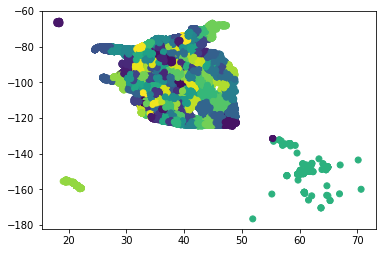

In [9]:
print(len(clusters), df1_us['latitude'].count())
for i in range(len(clusters)):
    df1_us.at[i, 'cluster'] = clusters[i]
print(len(clusters), df1_us['latitude'].count())

plt.scatter(df1_us['latitude'], df1_us['longitude '], c=df1_us['cluster']);
plt.show()

In [8]:
df1_us.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,sight_year,report_year,cluster
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,1949.0,2004.0,68.0
2,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,1956.0,2004.0,141.0
3,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,1960.0,2004.0,58.0
4,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889,1961.0,2007.0,129.0
6,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.117500,-73.408333,1965.0,1999.0,112.0


In [8]:
df1_us_sorted = df1_us.sort_values(['cluster', 'datetime'], ascending=[True, True])
df1_us_sorted.head(20)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,sight_year,report_year,cluster
6652,1/10/2002 03:00,fountain hills,az,us,rectangle,15,15 seconds,Triangular UFO seen in Fountain Hills&#44 AZ,1/11/2002,33.611667,-111.716667,2002.0,2002.0,0.0
6695,1/10/2006 04:00,plymouth,mn,us,unknown,900,15 minutes,Possible sighting in Plymouth&#44 MN,2/14/2006,45.010556,-93.455278,2006.0,2006.0,0.0
6747,1/10/2010 14:00,cary,nc,us,changing,900,15 min,Object appears and hovers&#44 strange maneuver...,2/14/2010,35.791389,-78.781389,2010.0,2010.0,0.0
6748,1/10/2010 18:45,tularosa,nm,us,other,300,5 min.,green figure 8 followed by military aircraft,2/14/2010,33.073889,-106.018056,2010.0,2010.0,0.0
6760,1/10/2011 18:35,madison,wi,us,oval,15,15 seconds,hovering object with bright lights in sky- sud...,1/31/2011,43.073056,-89.401111,2011.0,2011.0,0.0
7328,1/11/2001 20:45,pueblo,co,us,fireball,30,30 sec,Blue fireball lights up the skies of colorado ...,2/18/2001,38.254444,-104.608611,2001.0,2001.0,0.0
7582,1/11/2011 21:15,vicksburg,ms,us,fireball,4,4 seconds,Fireball in the sky over Mississippi,1/31/2011,32.352500,-90.877778,2011.0,2011.0,0.0
13205,1/15/2004 22:10,barstow,ca,us,unknown,3,3 seconds,Massive light illumination,1/22/2004,34.898611,-117.021944,2004.0,2004.0,0.0
14118,1/18/1995 19:30,deer lodge,mt,us,unknown,3600,1 hour,Anonymous call regarding alleged multiple UFO ...,11/2/1999,46.395833,-112.729167,1995.0,1999.0,0.0
14329,1/18/2009 07:30,los angeles,ca,us,disk,3600,1 hour,Glowing disk like object moving abot Los Angeles,3/19/2009,34.052222,-118.242778,2009.0,2009.0,0.0


In [36]:
df2 = df1[df1["city"]== "houston"]

comments_grouped = []
for i, row in df2[df2["sight_year"]== 2008].sort_values(by="date posted").iterrows():
    comments_grouped.append(row["comments"])

['Three triangular forms move quickly and in sync before disappearing&#44 planes seemingly chasing it&#33',
 'Bright&#44 light is stationery in the sky&#44 then rapidly falls toward horizon',
 'Fireball plummets to Earth?',
 'one bright light noticed - three light travel together then split to for a perfect triangle.',
 'Saw four circular lights flying quickly in formation and then change formation&#44 there was no sound&#44 helipcopters circled around shortly',
 'Two star-like objects were seen high in the sky both moving in one direction',
 'black slow moving  V shape object over houston s george bush airport',
 'Extremely Bright White object&#44 Just like we saw at the beginning of the year&#44 in Houston&#44 when thousands saw it&#33',
 'Witnessed white floating object hovering and spinning slowly in the sky in Houston&#44 Texas.',
 'I saw a spherical object hovering in the daytime sky that was pinkish in color.',
 'three changing color groups of lights hovering over rooftops',
 'I

In [54]:
for comment in comments_grouped:
    doc = nlp(comment)
    for token in doc:
        if token.tag_ in ["JJ","JJR","JJS"]:
            print(token.text)

triangular
bright
light
perfect
circular
like
high
black
slow
Bright
Witnessed
white
spherical
daytime
pinkish
long
little
apparent
Bright
nighttime
fast&#44
Advanced
random
southeastern
sudden
tall
white
humanoid
several
possible
agenda&#44
bovine
bdellium
